# Check R15107 files

In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

In [15]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio
from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.io.dst_io import load_dsts

from tqdm import tqdm

In [5]:
folder_path = 'data/15107/sophronia/trigger2/ldc1/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
print(file_names)

['run_15107_0012_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0013_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0010_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0015_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0005_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0011_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0009_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0003_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0008_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0002_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0001_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0007_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0016_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0006_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_

In [18]:
# load in

full_dst = load_dsts([folder_path + x for x in file_names], 'RECO', 'Events')
display(full_dst)
print(f'Number of events: {full_dst.event.nunique()}')

event          time  npeak       Xpeak       Ypeak  nsipm        X  \
0        8570  1.742935e+09     30 -151.630826   18.373069      1  104.275   
1        8570  1.742935e+09     30 -151.630826   18.373069      1  -81.325   
2        8570  1.742935e+09     30 -151.630826   18.373069      1  -19.125   
3        8570  1.742935e+09     30 -151.630826   18.373069      1 -297.025   
4        8570  1.742935e+09     30 -151.630826   18.373069      1 -343.675   
...       ...           ...    ...         ...         ...    ...      ...   
120523    674  1.742935e+09     25   38.743186  131.437557      1   10.975   
120524    674  1.742935e+09     25   38.743186  131.437557      1  -50.225   
120525    674  1.742935e+09     25   38.743186  131.437557      1   57.625   
120526    674  1.742935e+09     25   38.743186  131.437557      1 -126.975   
120527    674  1.742935e+09     25   38.743186  131.437557      1  196.575   

              Y  Xrms  Yrms           Z         Q           E   Qc        Ec  \
0      -155.375   0.0   0.0  527.063000  5.068394   -7.550122 -1.0 -0.000021   
1       122.525   0.0   0.0  529.394500  6.378646  111.951553 -1.0  0.000305   
2       322.675   0.0   0.0  529.394500  5.152550   90.432353 -1.0  0.000256   
3       153.125   0.0   0.0  533.179125  7.022198  150.685082 -1.0  0.000427   
4       292.075   0.0   0.0  533.179125  5.748483  123.353204 -1.0  0.000402   
...         ...   ...   ...         ...       ...         ...  ...       ...   
120523  414.975   0.0   0.0  970.261500  5.621337    3.056281 -1.0  0.000010   
120524 -247.675   0.0   0.0  972.601500  5.139459    3.968747 -1.0  0.000012   
120525 -464.375   0.0   0.0  972.601500  5.033332    3.886794 -1.0  0.000014   
120526  260.475   0.0   0.0  976.143875  5.499087   -1.678771 -1.0 -0.000005   
120527 -247.675   0.0   0.0  978.607250  6.473441   -6.741126 -1.0 -0.000020   

        track_id   Ep  
0             -1 -1.0  
1             -1 -1.0  
2             -1 -1.0  
3             -1 -1.0  
4             -1 -1.0  
...          ...  ...  
120523        -1 -1.0  
120524        -1 -1.0  
120525        -1 -1.0  
120526        -1 -1.0  
120527        -1 -1.0  

[120528 rows x 17 columns]

Number of events: 87


# lets plot a bunch

In [16]:
q_cut = 8
drop_dist       = [16, 16]
cut_sensors       = beerfun.cut_over_Q   (q_cut, ['E', 'Ec'])
drop_sensors      = beerfun.drop_isolated(drop_dist, ['E', 'Ec'])


  0%|          | 0/87 [00:00<?, ?it/s]

Time spent in cut_over_Q: 0.009938716888427734 s
Time spent in drop_isolated: 0.030908584594726562 s


  2%|▏         | 2/87 [00:00<00:14,  5.69it/s]

Time spent in cut_over_Q: 0.009060382843017578 s
Time spent in drop_isolated: 0.008970022201538086 s
Time spent in cut_over_Q: 0.016538381576538086 s
Time spent in drop_isolated: 0.01598381996154785 s


  5%|▍         | 4/87 [00:00<00:12,  6.84it/s]

Time spent in cut_over_Q: 0.011570930480957031 s
Time spent in drop_isolated: 0.00830221176147461 s
Time spent in cut_over_Q: 0.00921487808227539 s
Time spent in drop_isolated: 0.03968191146850586 s


  7%|▋         | 6/87 [00:00<00:12,  6.65it/s]

Time spent in cut_over_Q: 0.009815216064453125 s
Time spent in drop_isolated: 0.0077135562896728516 s
Time spent in cut_over_Q: 0.01018977165222168 s
Time spent in drop_isolated: 0.013737201690673828 s


  9%|▉         | 8/87 [00:01<00:11,  6.73it/s]

Time spent in cut_over_Q: 0.008765697479248047 s
Time spent in drop_isolated: 0.0060291290283203125 s
Time spent in cut_over_Q: 0.016436100006103516 s
Time spent in drop_isolated: 0.015565156936645508 s


 11%|█▏        | 10/87 [00:01<00:12,  6.25it/s]

Time spent in cut_over_Q: 0.02818608283996582 s
Time spent in drop_isolated: 0.025730609893798828 s
Time spent in cut_over_Q: 0.012442588806152344 s
Time spent in drop_isolated: 0.03122401237487793 s


 14%|█▍        | 12/87 [00:02<00:25,  2.91it/s]

Time spent in cut_over_Q: 0.025798797607421875 s
Time spent in drop_isolated: 0.01743173599243164 s
Time spent in cut_over_Q: 0.016983985900878906 s
Time spent in drop_isolated: 0.01672959327697754 s


 16%|█▌        | 14/87 [00:03<00:18,  3.90it/s]

Time spent in cut_over_Q: 0.009011030197143555 s
Time spent in drop_isolated: 0.012180089950561523 s
Time spent in cut_over_Q: 0.010890483856201172 s
Time spent in drop_isolated: 0.010413885116577148 s


 18%|█▊        | 16/87 [00:03<00:14,  4.75it/s]

Time spent in cut_over_Q: 0.017045974731445312 s
Time spent in drop_isolated: 0.018979310989379883 s
Time spent in cut_over_Q: 0.015607833862304688 s
Time spent in drop_isolated: 0.016477346420288086 s


 21%|██        | 18/87 [00:03<00:14,  4.72it/s]

Time spent in cut_over_Q: 0.0279233455657959 s
Time spent in drop_isolated: 0.02088761329650879 s
Time spent in cut_over_Q: 0.03105616569519043 s


 22%|██▏       | 19/87 [00:04<00:14,  4.69it/s]

Time spent in drop_isolated: 0.024414539337158203 s
Time spent in cut_over_Q: 0.011670827865600586 s
Time spent in drop_isolated: 0.022153615951538086 s


 23%|██▎       | 20/87 [00:04<00:12,  5.19it/s]/tmp/ipykernel_15906/1437429957.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(18, 6))
 24%|██▍       | 21/87 [00:04<00:12,  5.37it/s]

Time spent in cut_over_Q: 0.019423961639404297 s
Time spent in drop_isolated: 0.016931533813476562 s
Time spent in cut_over_Q: 0.03515911102294922 s


 25%|██▌       | 22/87 [00:04<00:12,  5.04it/s]

Time spent in drop_isolated: 0.030025482177734375 s
Time spent in cut_over_Q: 0.012056827545166016 s
Time spent in drop_isolated: 0.033176422119140625 s


 28%|██▊       | 24/87 [00:05<00:11,  5.29it/s]

Time spent in cut_over_Q: 0.0076177120208740234 s
Time spent in drop_isolated: 0.014480829238891602 s
Time spent in cut_over_Q: 0.04537010192871094 s
Time spent in drop_isolated: 0.07689762115478516 s


 30%|██▉       | 26/87 [00:05<00:16,  3.67it/s]

Time spent in cut_over_Q: 0.015744447708129883 s
Time spent in drop_isolated: 0.021045923233032227 s


 31%|███       | 27/87 [00:05<00:15,  3.99it/s]

Time spent in cut_over_Q: 0.034119367599487305 s
Time spent in drop_isolated: 0.030111074447631836 s
Time spent in cut_over_Q: 0.0316004753112793 s


 32%|███▏      | 28/87 [00:06<00:13,  4.25it/s]

Time spent in drop_isolated: 0.02596139907836914 s
Time spent in cut_over_Q: 0.01923394203186035 s
Time spent in drop_isolated: 0.015178203582763672 s


 34%|███▍      | 30/87 [00:06<00:12,  4.71it/s]

Time spent in cut_over_Q: 0.011036157608032227 s
Time spent in drop_isolated: 0.01276087760925293 s
Time spent in cut_over_Q: 0.010313749313354492 s
Time spent in drop_isolated: 0.01183176040649414 s


 37%|███▋      | 32/87 [00:06<00:11,  4.91it/s]

Time spent in cut_over_Q: 0.03233480453491211 s
Time spent in drop_isolated: 0.0283052921295166 s
Time spent in cut_over_Q: 0.011605978012084961 s
Time spent in drop_isolated: 0.018735885620117188 s


 39%|███▉      | 34/87 [00:07<00:11,  4.78it/s]

Time spent in cut_over_Q: 0.014249563217163086 s
Time spent in drop_isolated: 0.032570600509643555 s
Time spent in cut_over_Q: 0.01753067970275879 s
Time spent in drop_isolated: 0.03319406509399414 s


 40%|████      | 35/87 [00:07<00:11,  4.59it/s]

Time spent in cut_over_Q: 0.01483154296875 s
Time spent in drop_isolated: 0.01766204833984375 s


 43%|████▎     | 37/87 [00:08<00:10,  4.82it/s]

Time spent in cut_over_Q: 0.00975656509399414 s
Time spent in drop_isolated: 0.007087230682373047 s
Time spent in cut_over_Q: 0.01782679557800293 s


 44%|████▎     | 38/87 [00:08<00:10,  4.68it/s]

Time spent in drop_isolated: 0.04064321517944336 s
Time spent in cut_over_Q: 0.021831750869750977 s


 45%|████▍     | 39/87 [00:08<00:11,  4.27it/s]

Time spent in drop_isolated: 0.07299494743347168 s


 46%|████▌     | 40/87 [00:08<00:10,  4.49it/s]

Time spent in cut_over_Q: 0.029131650924682617 s
Time spent in drop_isolated: 0.02158355712890625 s
Time spent in cut_over_Q: 0.009994745254516602 s
Time spent in drop_isolated: 0.00969839096069336 s


 47%|████▋     | 41/87 [00:08<00:09,  5.02it/s]

Time spent in cut_over_Q: 0.014623403549194336 s
Time spent in drop_isolated: 0.016281843185424805 s


 49%|████▉     | 43/87 [00:09<00:11,  3.70it/s]

Time spent in cut_over_Q: 0.0074999332427978516 s
Time spent in drop_isolated: 0.010634183883666992 s
Time spent in cut_over_Q: 0.013308048248291016 s
Time spent in drop_isolated: 0.014265298843383789 s


 52%|█████▏    | 45/87 [00:10<00:09,  4.22it/s]

Time spent in cut_over_Q: 0.022189617156982422 s
Time spent in drop_isolated: 0.022518396377563477 s
Time spent in cut_over_Q: 0.018445253372192383 s


 53%|█████▎    | 46/87 [00:10<00:09,  4.39it/s]

Time spent in drop_isolated: 0.04875636100769043 s
Time spent in cut_over_Q: 0.025538206100463867 s
Time spent in drop_isolated: 0.038573503494262695 s


 55%|█████▌    | 48/87 [00:10<00:08,  4.83it/s]

Time spent in cut_over_Q: 0.010708093643188477 s
Time spent in drop_isolated: 0.011875152587890625 s
Time spent in cut_over_Q: 0.014487743377685547 s
Time spent in drop_isolated: 0.012990236282348633 s


 57%|█████▋    | 50/87 [00:10<00:07,  5.04it/s]

Time spent in cut_over_Q: 0.009760379791259766 s
Time spent in drop_isolated: 0.01658916473388672 s


 59%|█████▊    | 51/87 [00:11<00:07,  4.87it/s]

Time spent in cut_over_Q: 0.02917313575744629 s
Time spent in drop_isolated: 0.025118112564086914 s
Time spent in cut_over_Q: 0.020669937133789062 s
Time spent in drop_isolated: 0.022335529327392578 s


 60%|█████▉    | 52/87 [00:11<00:07,  4.38it/s]

Time spent in cut_over_Q: 0.07697033882141113 s
Time spent in drop_isolated: 0.08467340469360352 s


 62%|██████▏   | 54/87 [00:12<00:08,  3.76it/s]

Time spent in cut_over_Q: 0.012245655059814453 s
Time spent in drop_isolated: 0.024365901947021484 s
Time spent in cut_over_Q: 0.03796553611755371 s
Time spent in drop_isolated: 0.03456926345825195 s


 63%|██████▎   | 55/87 [00:12<00:08,  3.74it/s]

Time spent in cut_over_Q: 0.024724245071411133 s
Time spent in drop_isolated: 0.05979752540588379 s


 64%|██████▍   | 56/87 [00:12<00:08,  3.68it/s]

Time spent in cut_over_Q: 0.028600215911865234 s
Time spent in drop_isolated: 0.03063201904296875 s


 66%|██████▌   | 57/87 [00:12<00:08,  3.73it/s]

Time spent in cut_over_Q: 0.009947776794433594 s
Time spent in drop_isolated: 0.012765645980834961 s


 67%|██████▋   | 58/87 [00:13<00:07,  3.94it/s]

Time spent in cut_over_Q: 0.025410175323486328 s
Time spent in drop_isolated: 0.020580768585205078 s


 68%|██████▊   | 59/87 [00:13<00:08,  3.48it/s]

Time spent in cut_over_Q: 0.02067279815673828 s
Time spent in drop_isolated: 0.06303572654724121 s


 69%|██████▉   | 60/87 [00:13<00:08,  3.20it/s]

Time spent in cut_over_Q: 0.040529727935791016 s
Time spent in drop_isolated: 0.1061699390411377 s


 71%|███████▏  | 62/87 [00:14<00:07,  3.35it/s]

Time spent in cut_over_Q: 0.017742156982421875 s
Time spent in drop_isolated: 0.020340442657470703 s
Time spent in cut_over_Q: 0.029397964477539062 s
Time spent in drop_isolated: 0.026842594146728516 s


 74%|███████▎  | 64/87 [00:15<00:07,  2.99it/s]

Time spent in cut_over_Q: 0.0062448978424072266 s
Time spent in drop_isolated: 0.010228157043457031 s
Time spent in cut_over_Q: 0.009955644607543945 s
Time spent in drop_isolated: 0.006085395812988281 s


 75%|███████▍  | 65/87 [00:15<00:06,  3.36it/s]

Time spent in cut_over_Q: 0.03310036659240723 s
Time spent in drop_isolated: 0.04705500602722168 s


 76%|███████▌  | 66/87 [00:15<00:06,  3.21it/s]

Time spent in cut_over_Q: 0.04054403305053711 s
Time spent in drop_isolated: 0.045000553131103516 s


 77%|███████▋  | 67/87 [00:16<00:06,  3.02it/s]

Time spent in cut_over_Q: 0.022784948348999023 s
Time spent in drop_isolated: 0.024910926818847656 s


 78%|███████▊  | 68/87 [00:16<00:06,  3.01it/s]

Time spent in cut_over_Q: 0.026094913482666016 s
Time spent in drop_isolated: 0.02375960350036621 s


 79%|███████▉  | 69/87 [00:16<00:05,  3.19it/s]

Time spent in cut_over_Q: 0.025249481201171875 s
Time spent in drop_isolated: 0.028190135955810547 s


 80%|████████  | 70/87 [00:17<00:05,  3.19it/s]

Time spent in cut_over_Q: 0.04636526107788086 s
Time spent in drop_isolated: 0.054708003997802734 s


 82%|████████▏ | 71/87 [00:17<00:05,  2.90it/s]

Time spent in cut_over_Q: 0.024742841720581055 s
Time spent in drop_isolated: 0.03419756889343262 s


 83%|████████▎ | 72/87 [00:17<00:04,  3.22it/s]

Time spent in cut_over_Q: 0.01756429672241211 s
Time spent in drop_isolated: 0.014172077178955078 s


 84%|████████▍ | 73/87 [00:18<00:04,  3.31it/s]

Time spent in cut_over_Q: 0.044966936111450195 s
Time spent in drop_isolated: 0.06677484512329102 s


 86%|████████▌ | 75/87 [00:18<00:03,  3.58it/s]

Time spent in cut_over_Q: 0.008281946182250977 s
Time spent in drop_isolated: 0.010226249694824219 s
Time spent in cut_over_Q: 0.008980274200439453 s
Time spent in drop_isolated: 0.010549306869506836 s


 89%|████████▊ | 77/87 [00:19<00:02,  3.94it/s]

Time spent in cut_over_Q: 0.03536701202392578 s
Time spent in drop_isolated: 0.05377650260925293 s


 90%|████████▉ | 78/87 [00:19<00:02,  4.14it/s]

Time spent in cut_over_Q: 0.02023029327392578 s
Time spent in drop_isolated: 0.027513742446899414 s
Time spent in cut_over_Q: 0.018648862838745117 s
Time spent in drop_isolated: 0.02766871452331543 s


 91%|█████████ | 79/87 [00:19<00:01,  4.08it/s]

Time spent in cut_over_Q: 0.03079509735107422 s
Time spent in drop_isolated: 0.05920004844665527 s


 92%|█████████▏| 80/87 [00:20<00:02,  3.26it/s]

Time spent in cut_over_Q: 0.019060850143432617 s
Time spent in drop_isolated: 0.10410165786743164 s


 94%|█████████▍| 82/87 [00:20<00:01,  3.61it/s]

Time spent in cut_over_Q: 0.01498556137084961 s
Time spent in drop_isolated: 0.017784833908081055 s
Time spent in cut_over_Q: 0.011754751205444336 s
Time spent in drop_isolated: 0.009476661682128906 s


 95%|█████████▌| 83/87 [00:20<00:00,  4.13it/s]

Time spent in cut_over_Q: 0.022349119186401367 s
Time spent in drop_isolated: 0.022974729537963867 s


 97%|█████████▋| 84/87 [00:20<00:00,  4.08it/s]

Time spent in cut_over_Q: 0.01928544044494629 s
Time spent in drop_isolated: 0.019113779067993164 s


 98%|█████████▊| 85/87 [00:21<00:00,  4.08it/s]

Time spent in cut_over_Q: 0.031386375427246094 s
Time spent in drop_isolated: 0.05419349670410156 s


 99%|█████████▉| 86/87 [00:21<00:00,  3.76it/s]

Time spent in cut_over_Q: 0.01772284507751465 s
Time spent in drop_isolated: 0.027242660522460938 s


100%|██████████| 87/87 [00:21<00:00,  3.99it/s]


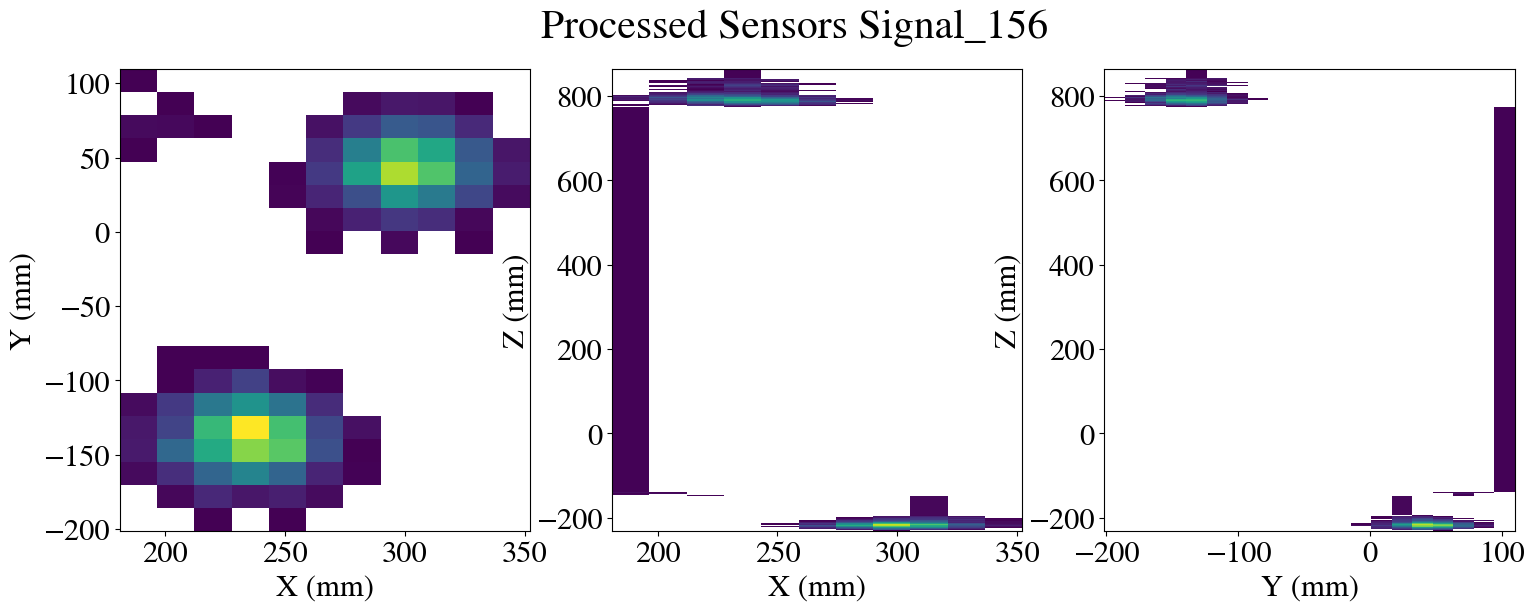

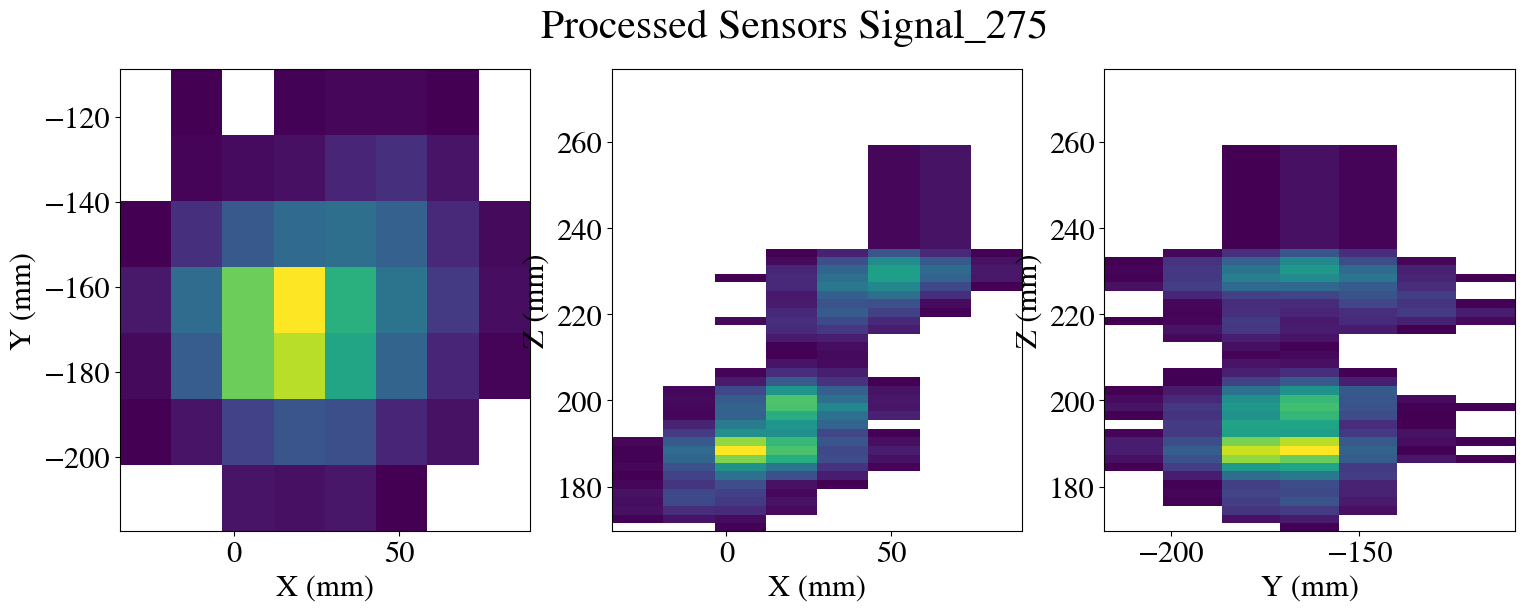

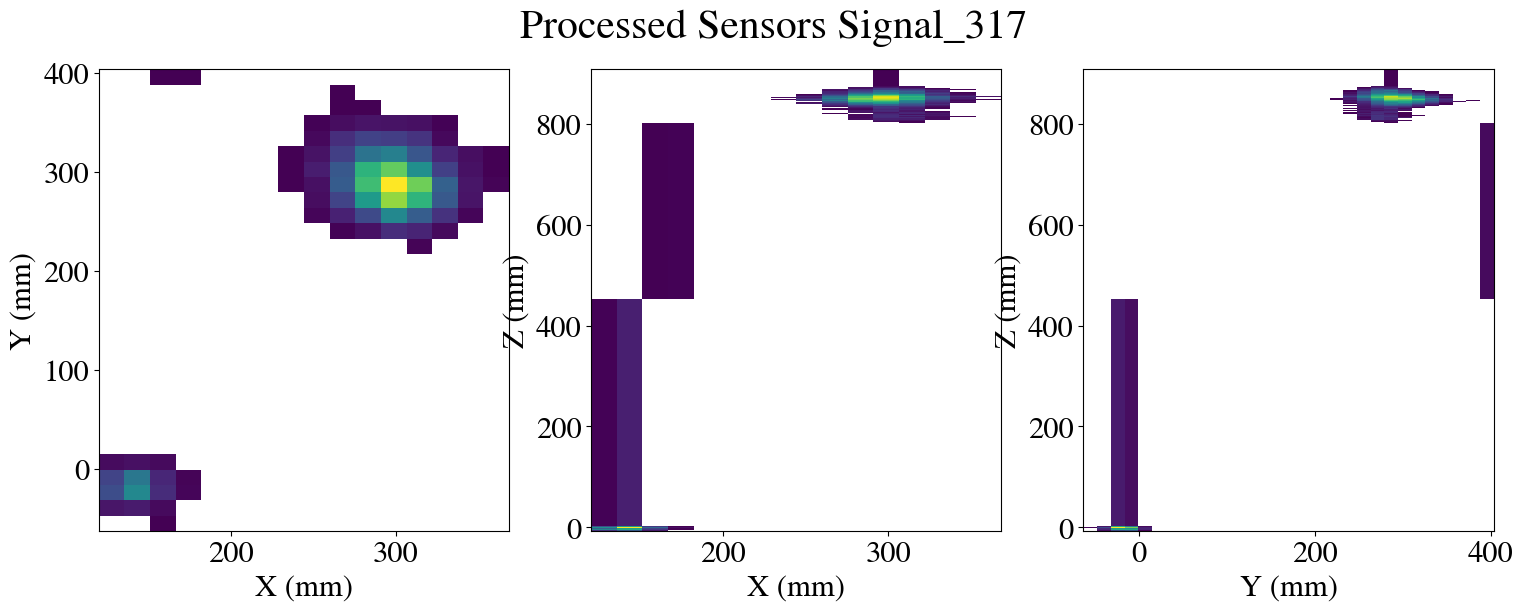

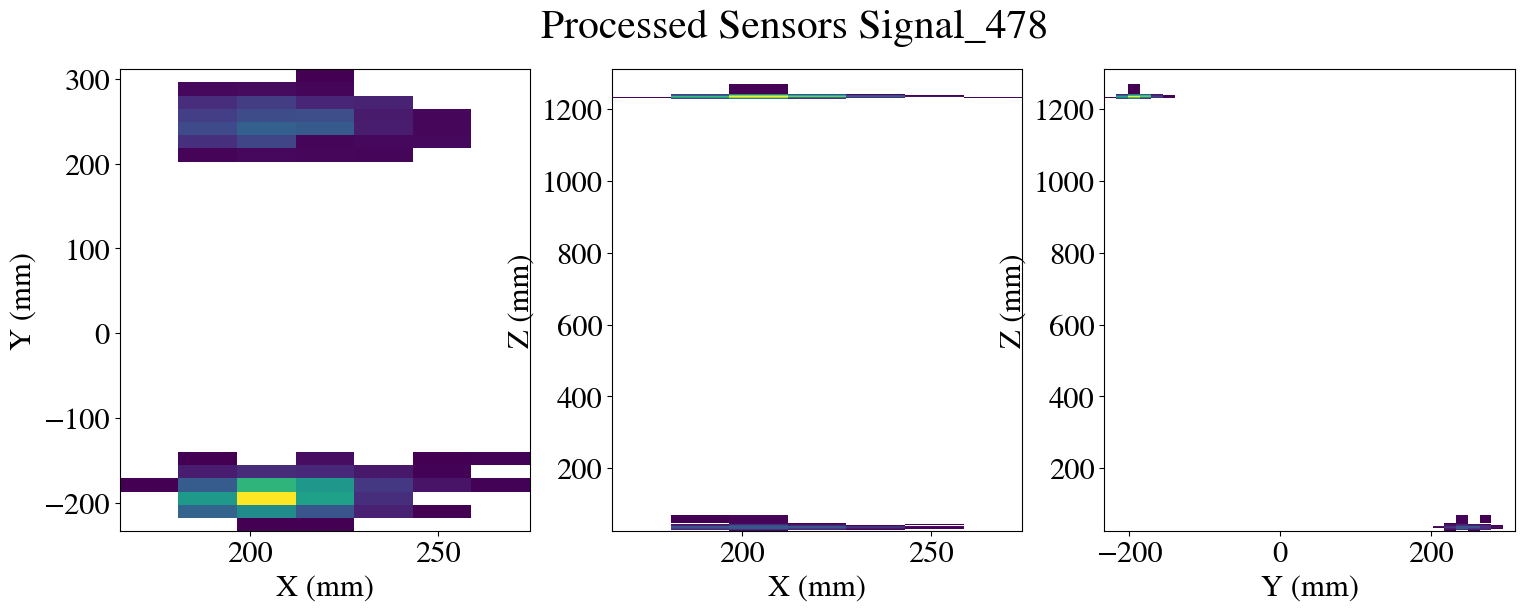

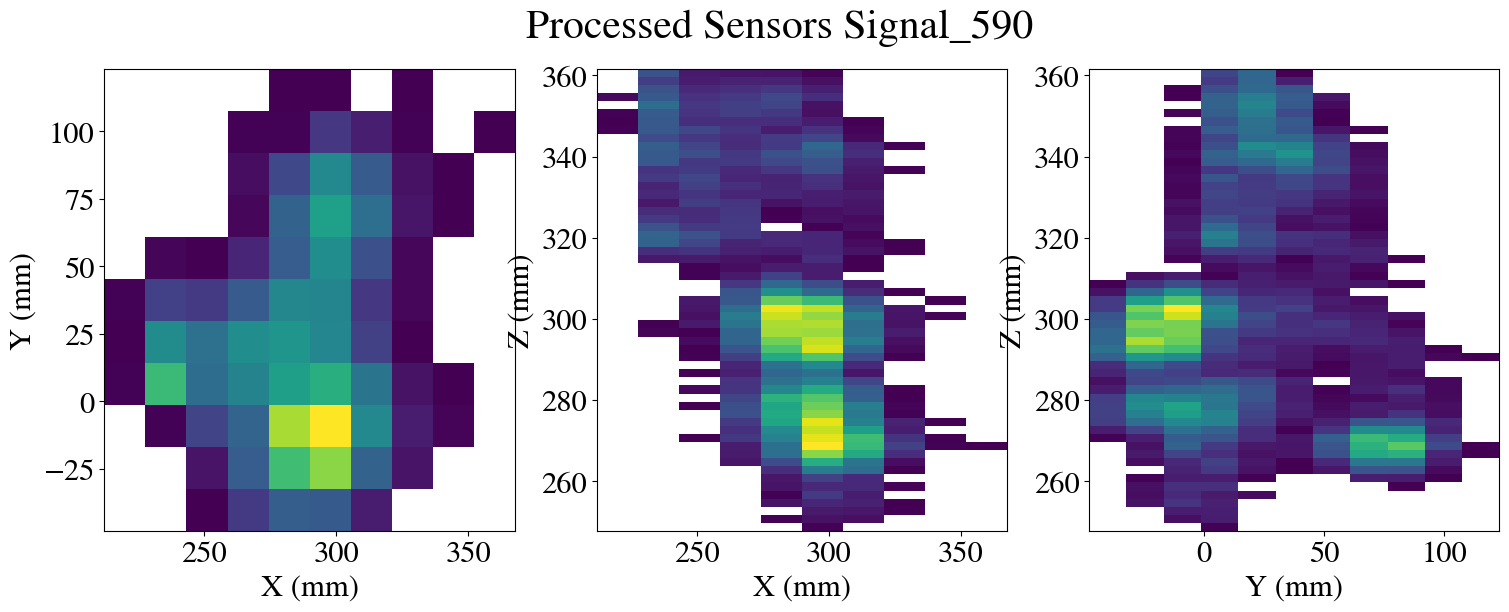

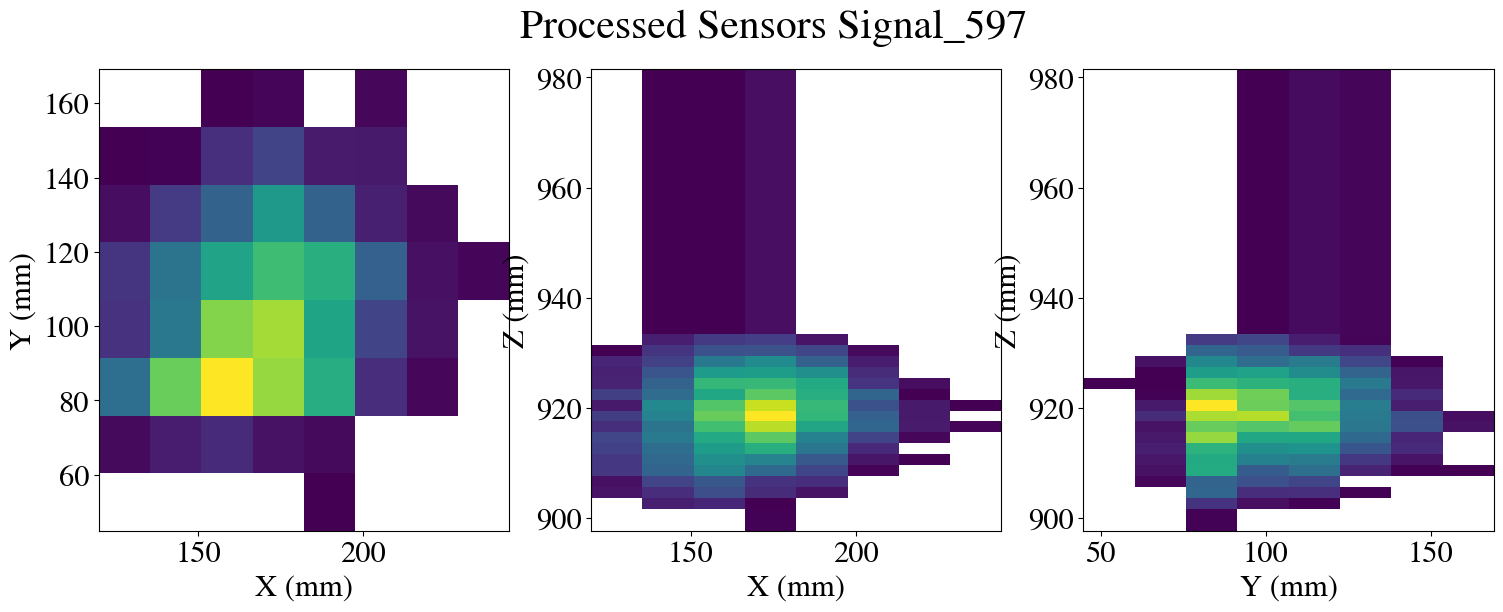

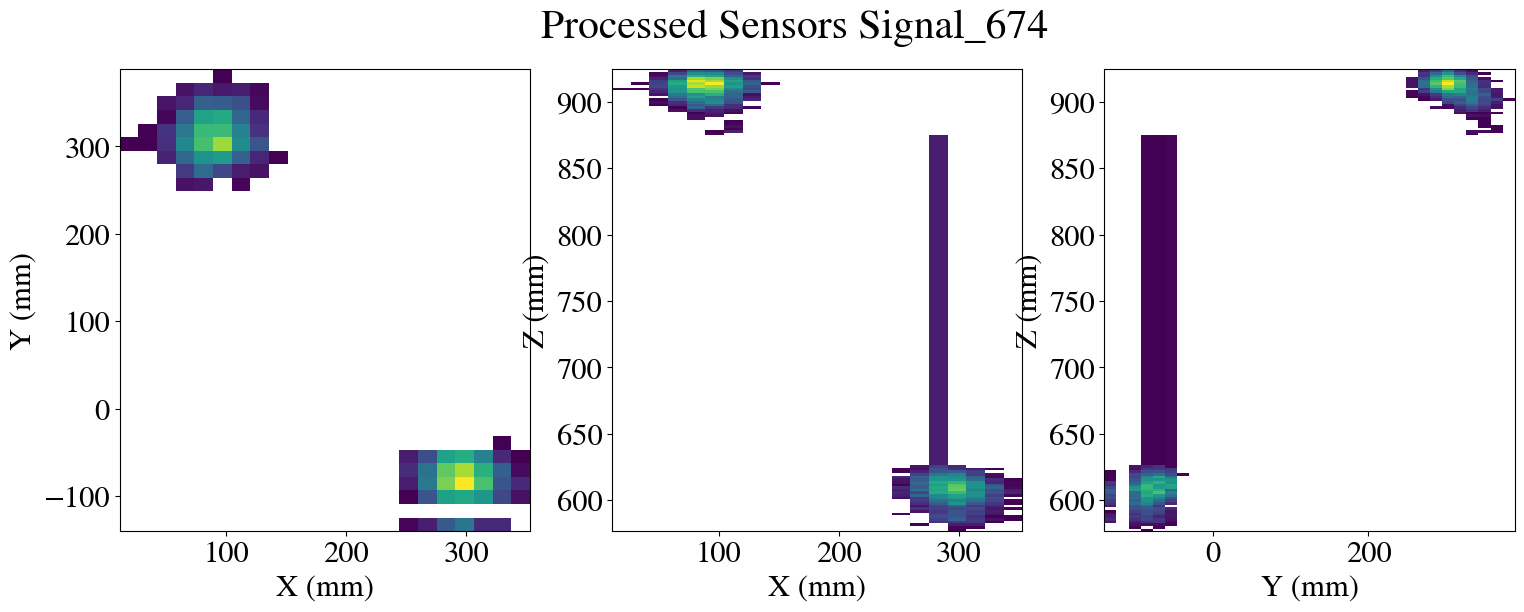

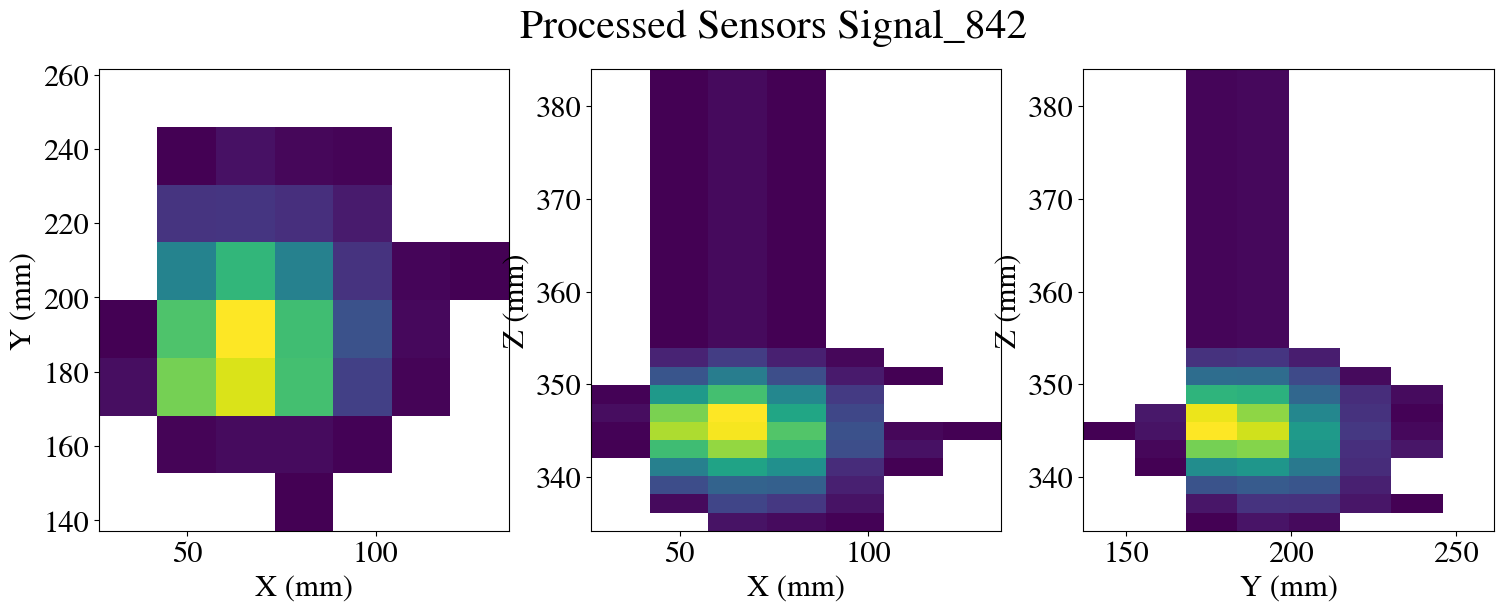

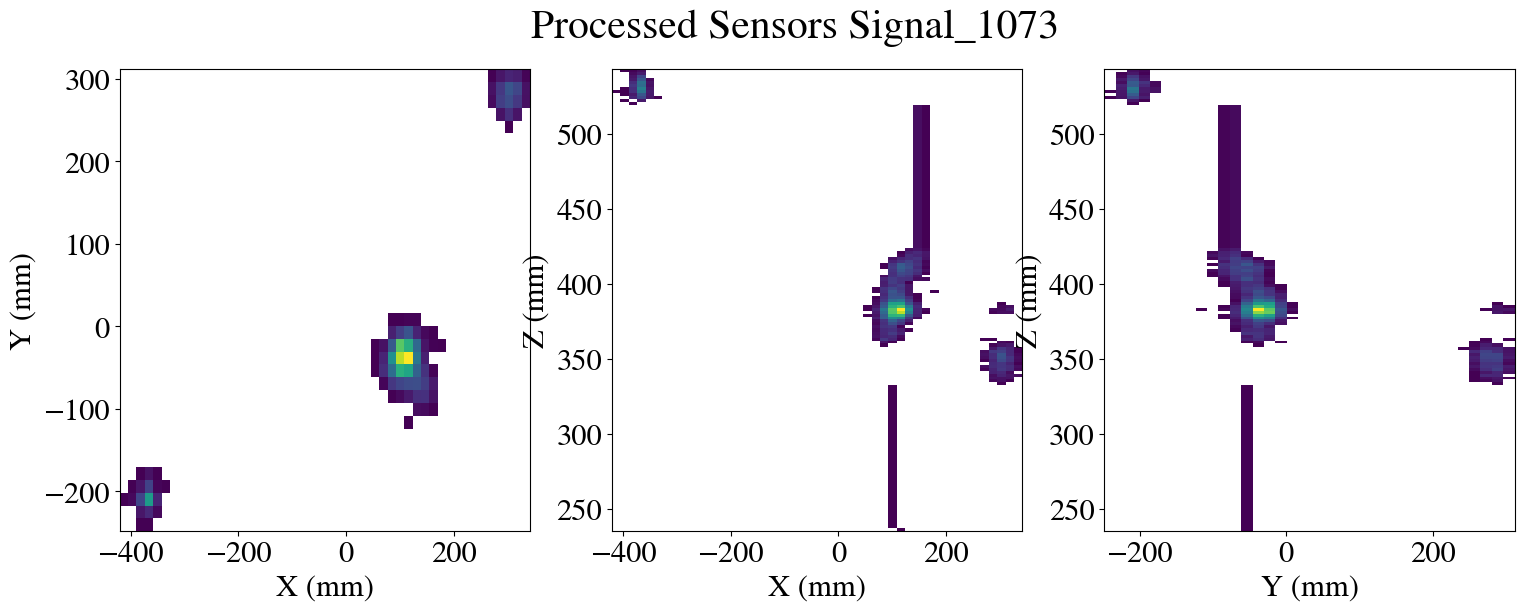

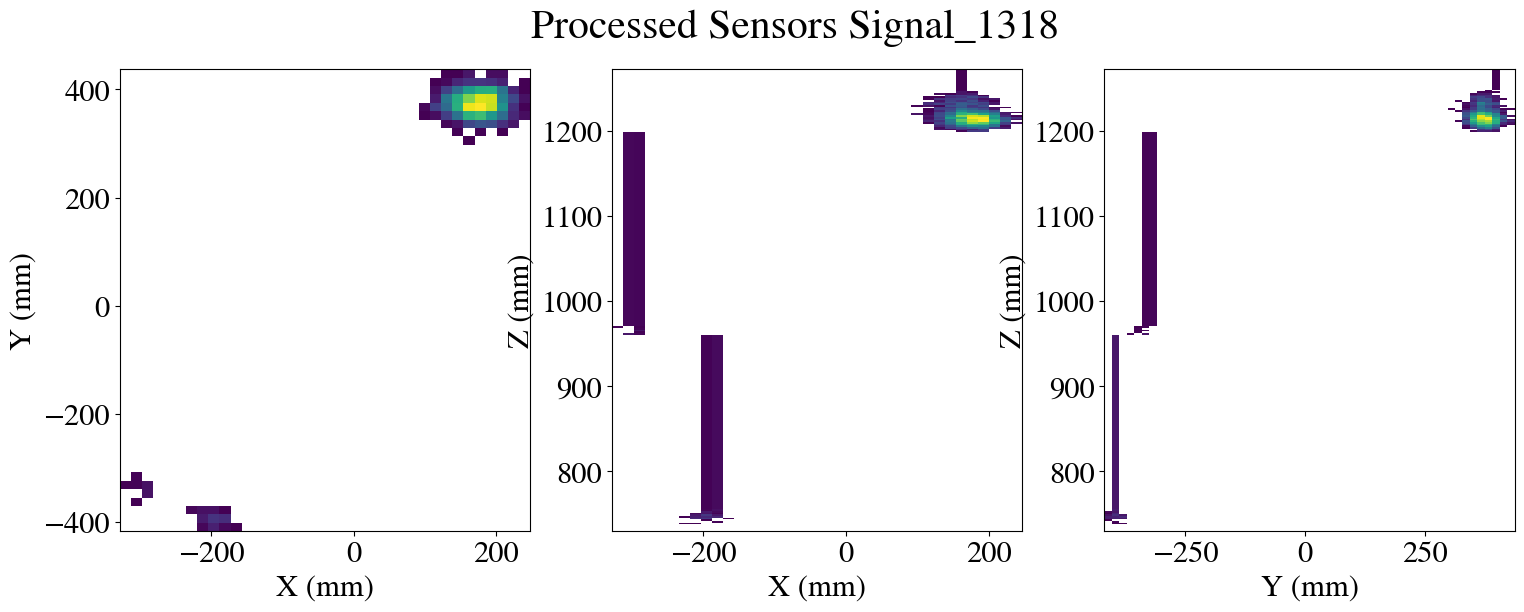

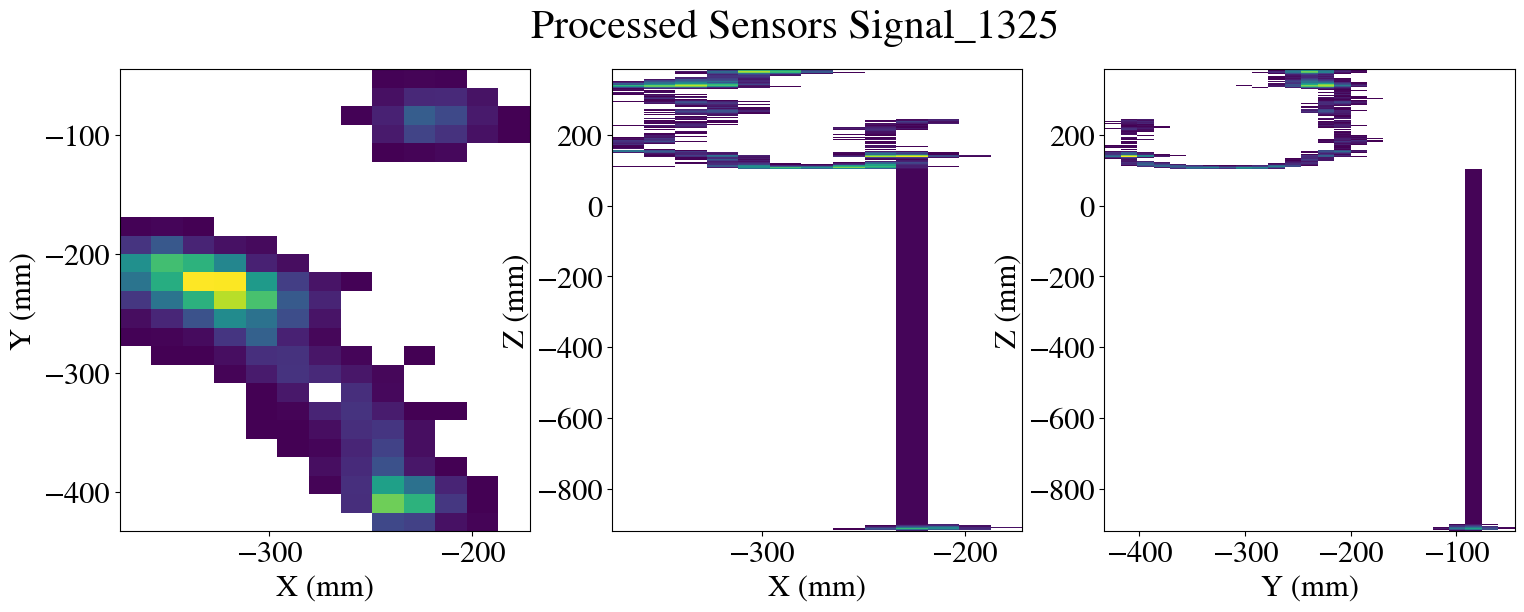

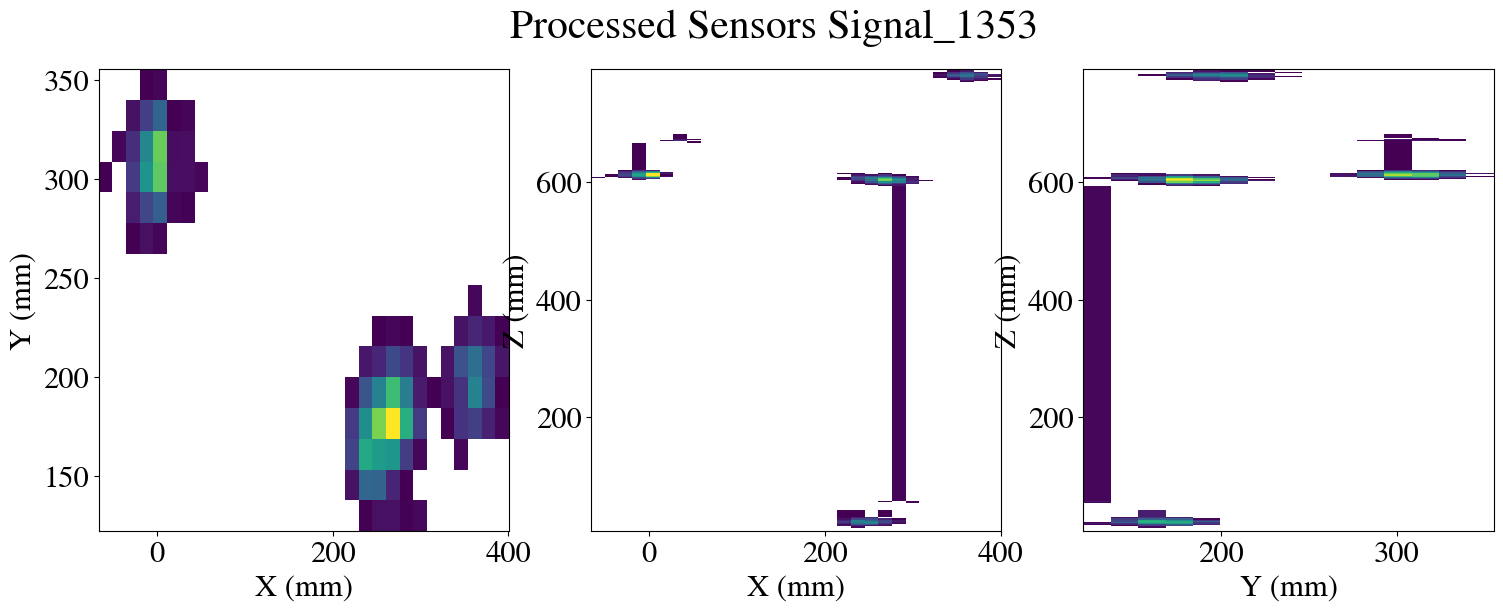

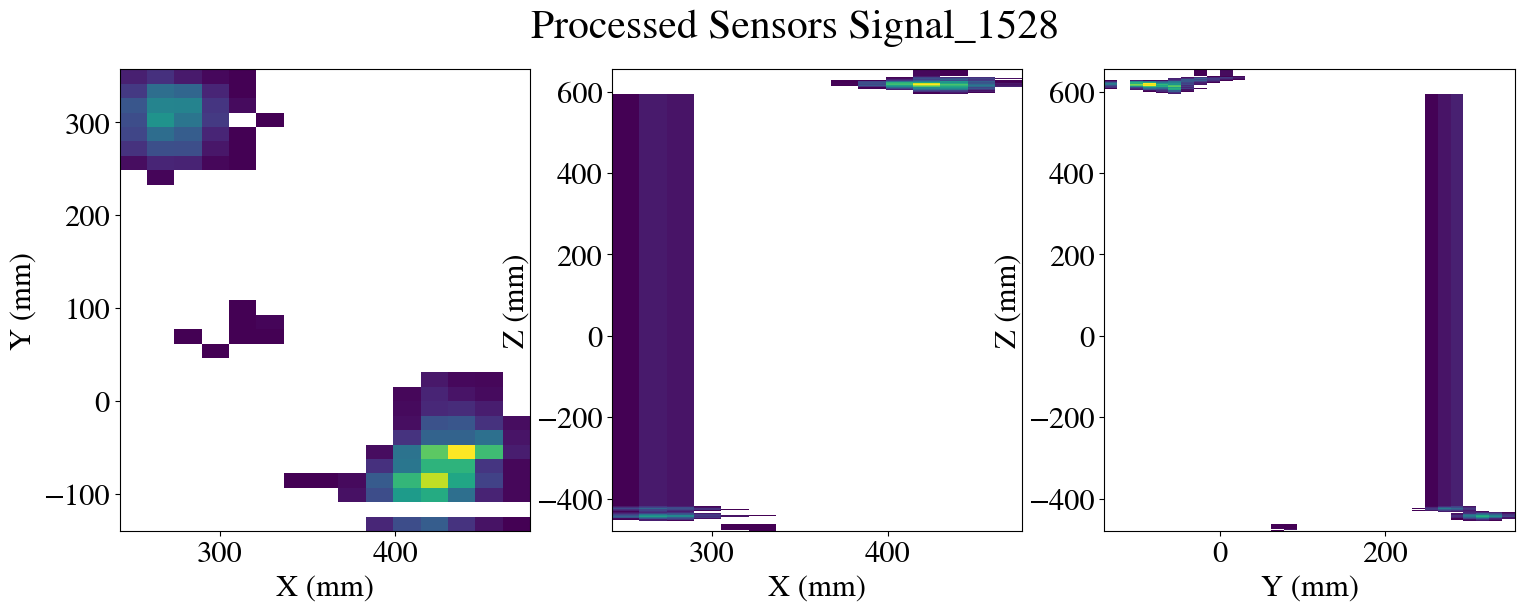

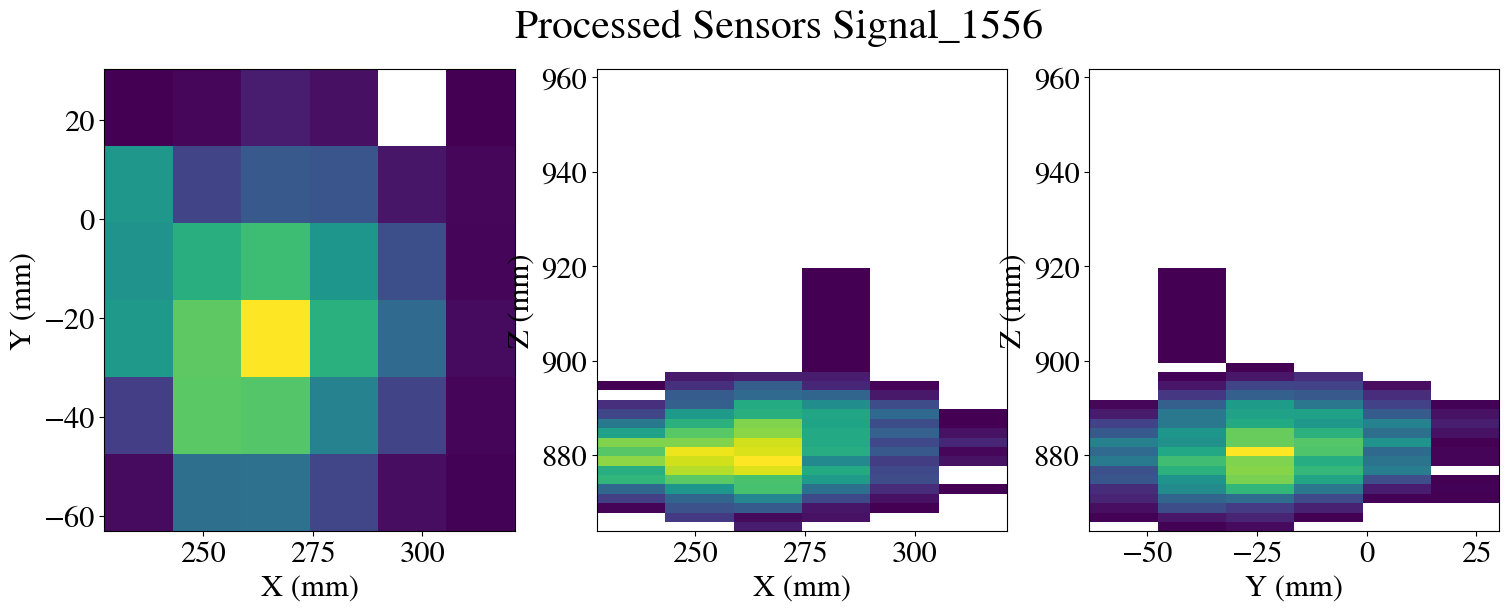

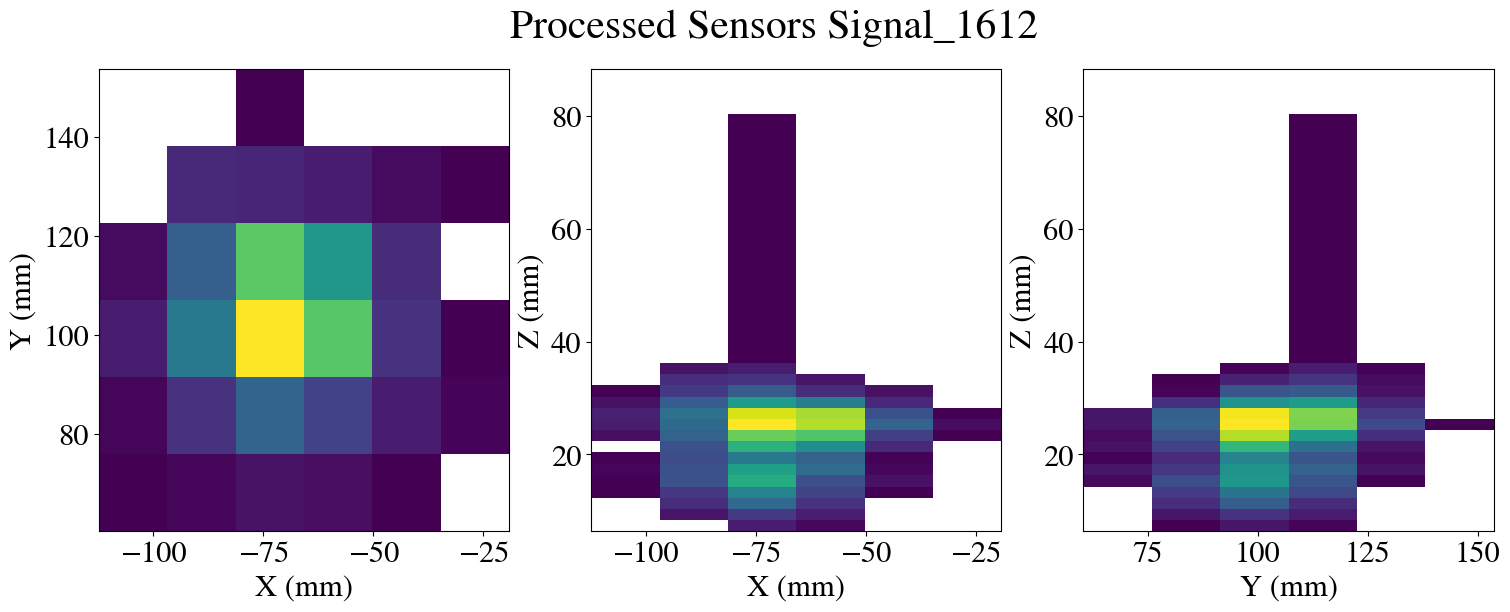

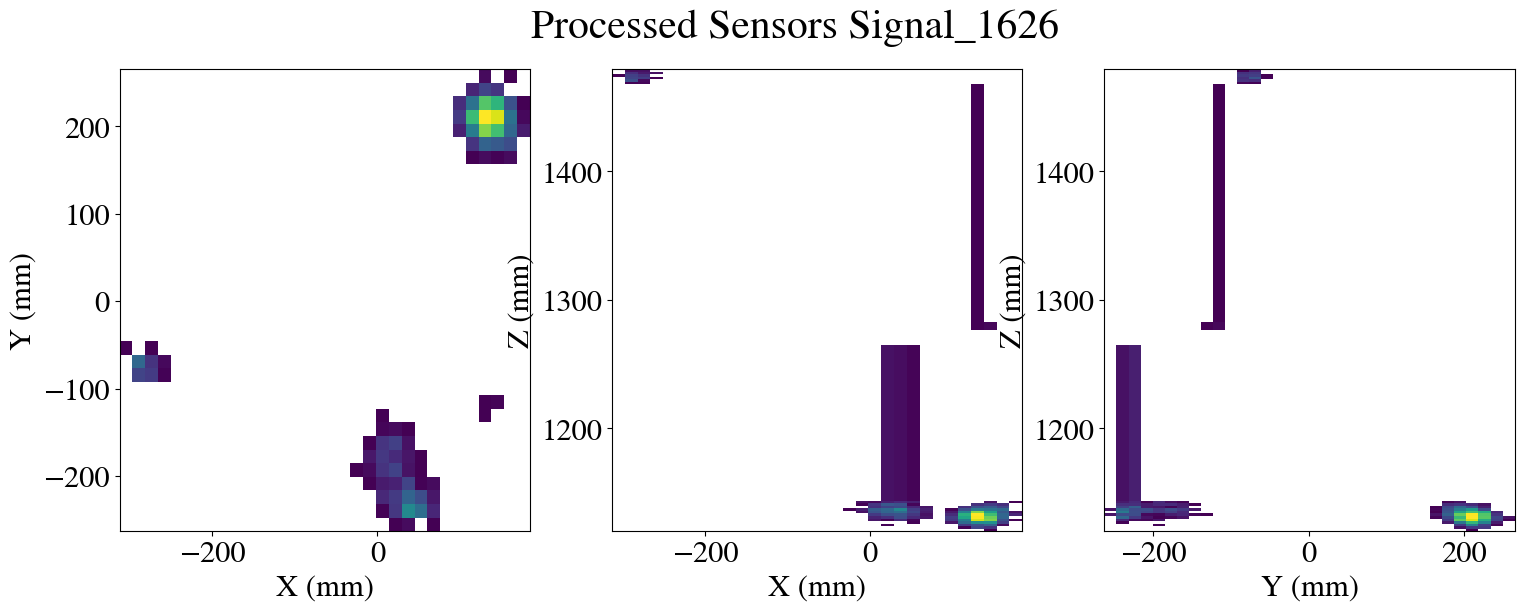

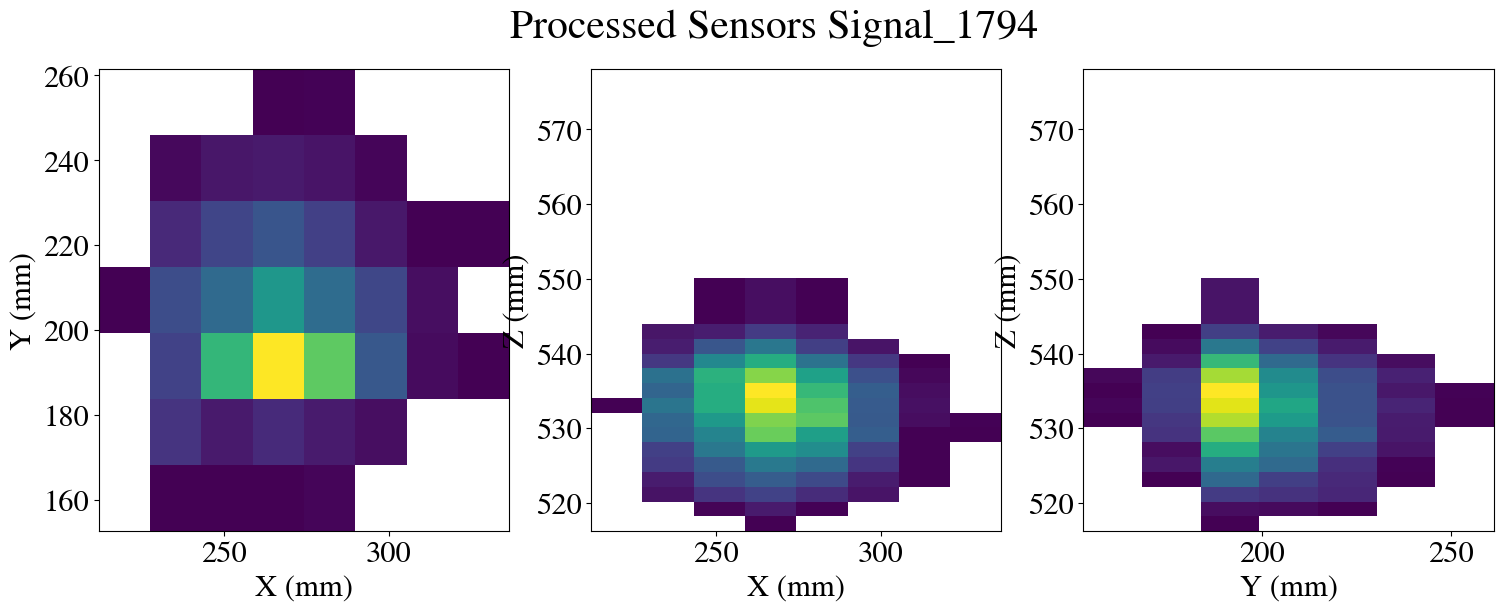

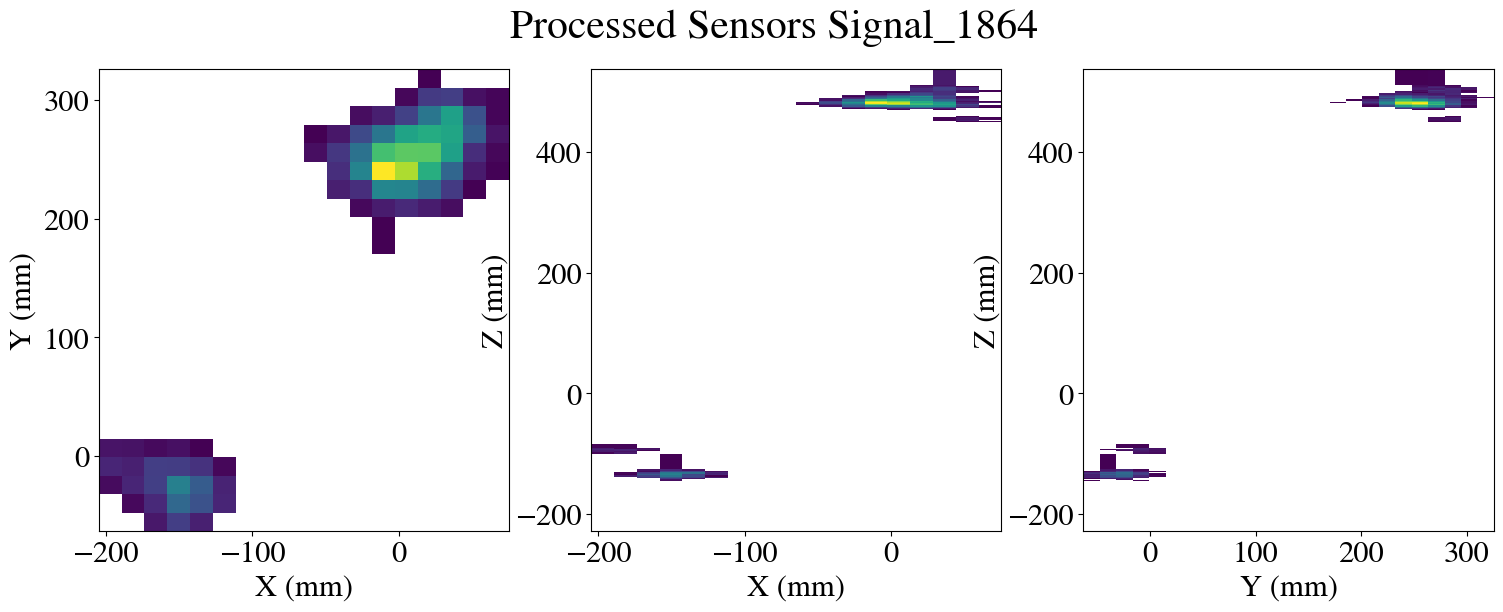

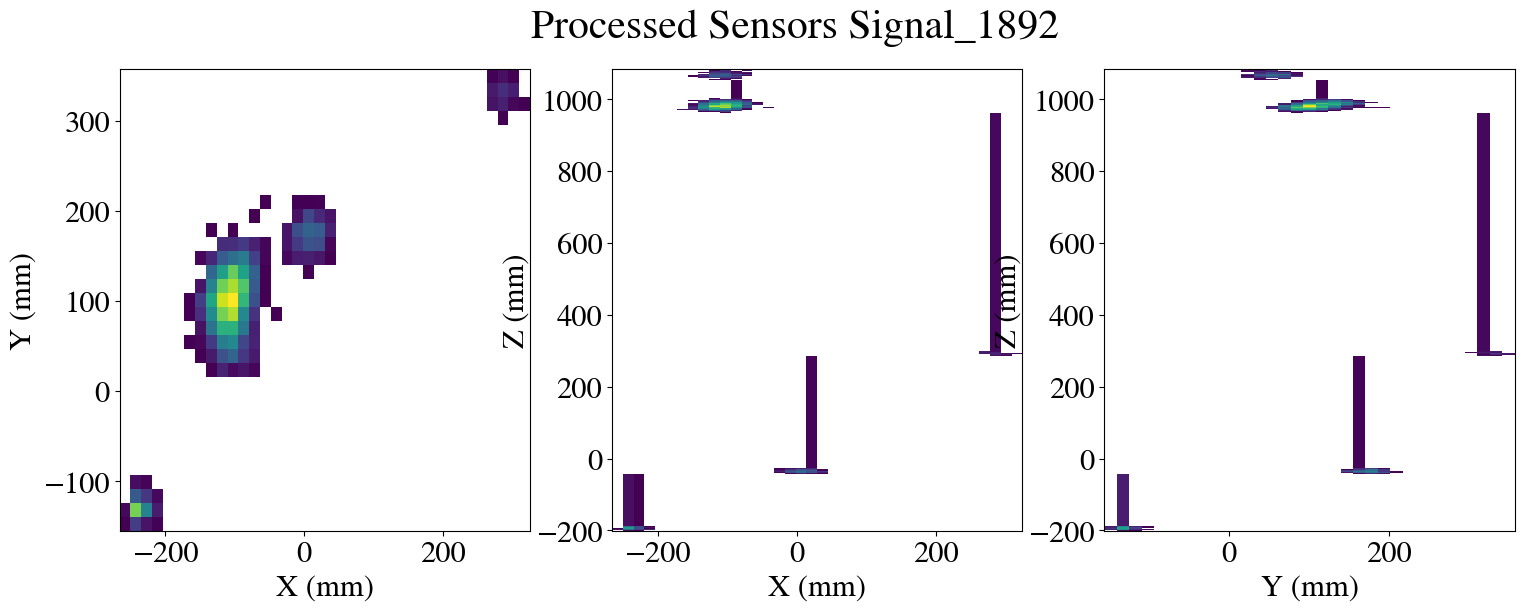

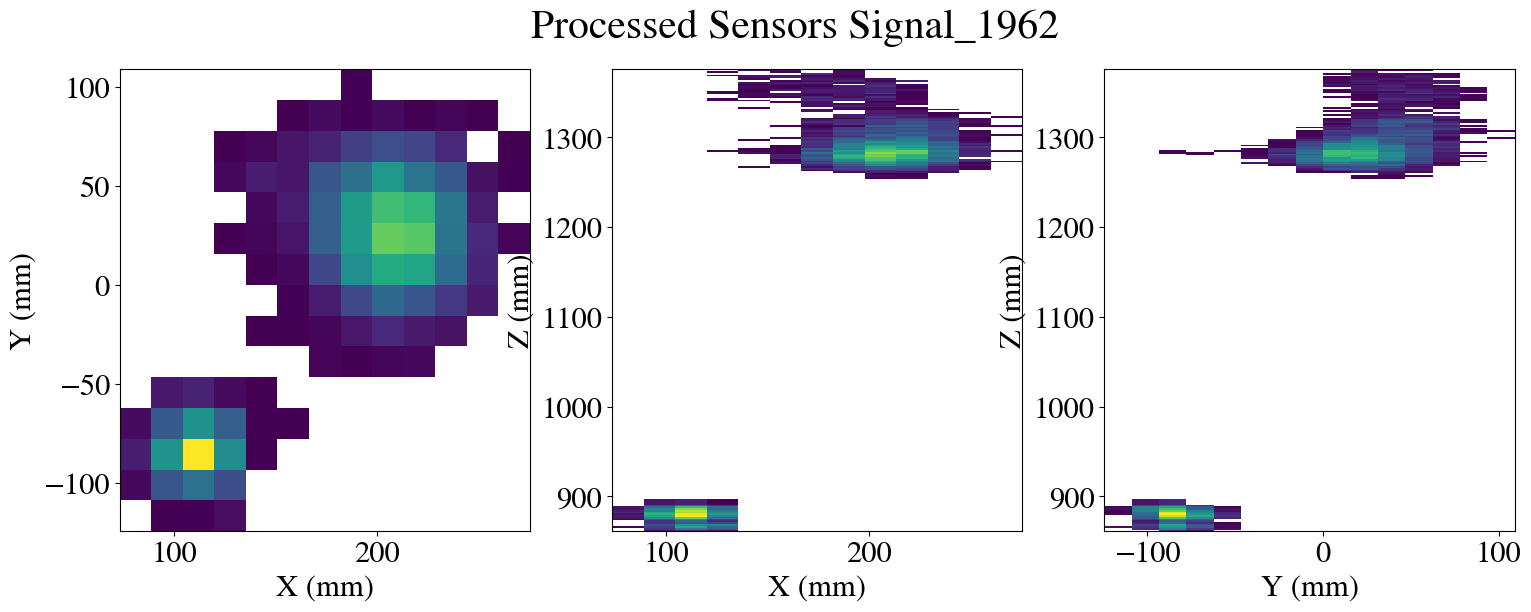

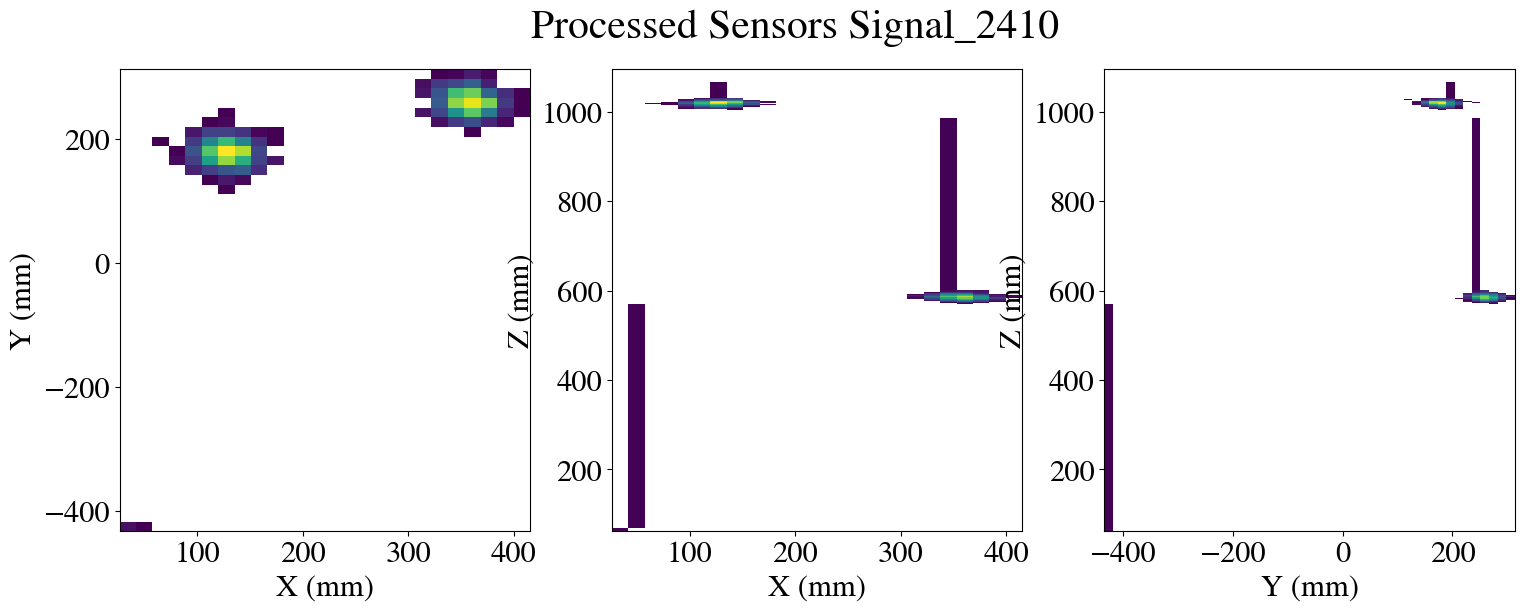

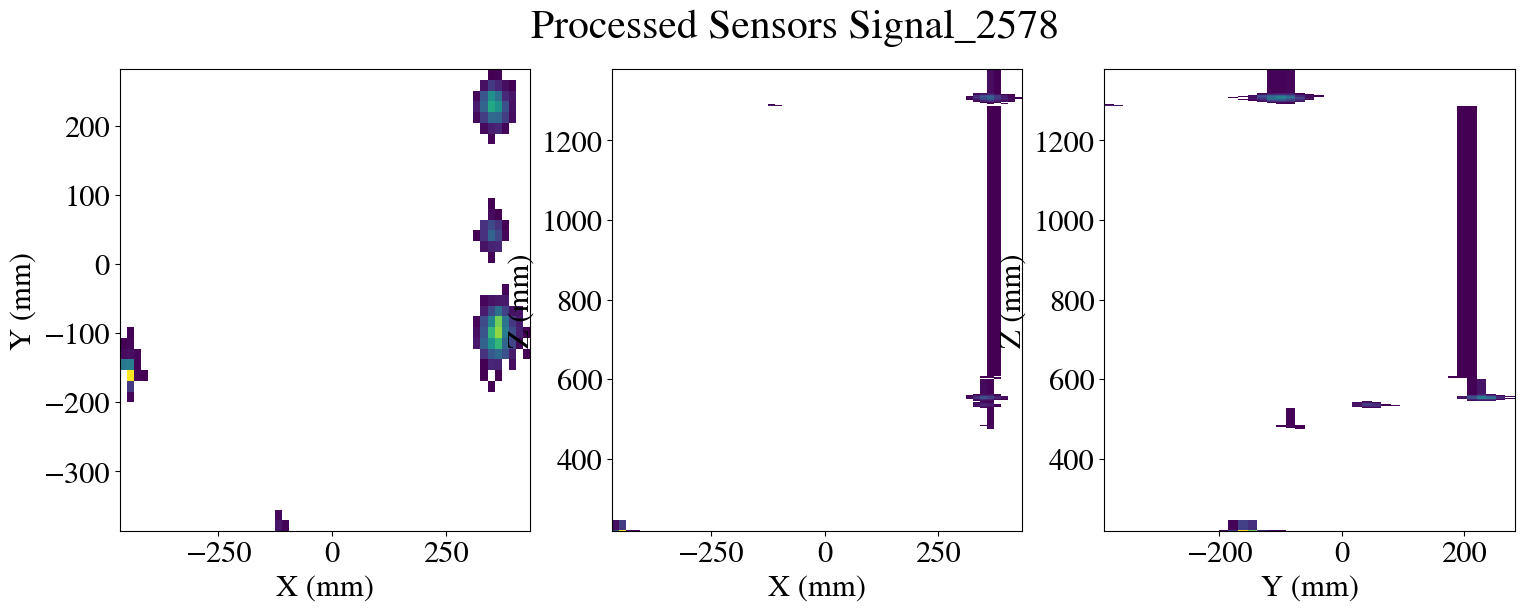

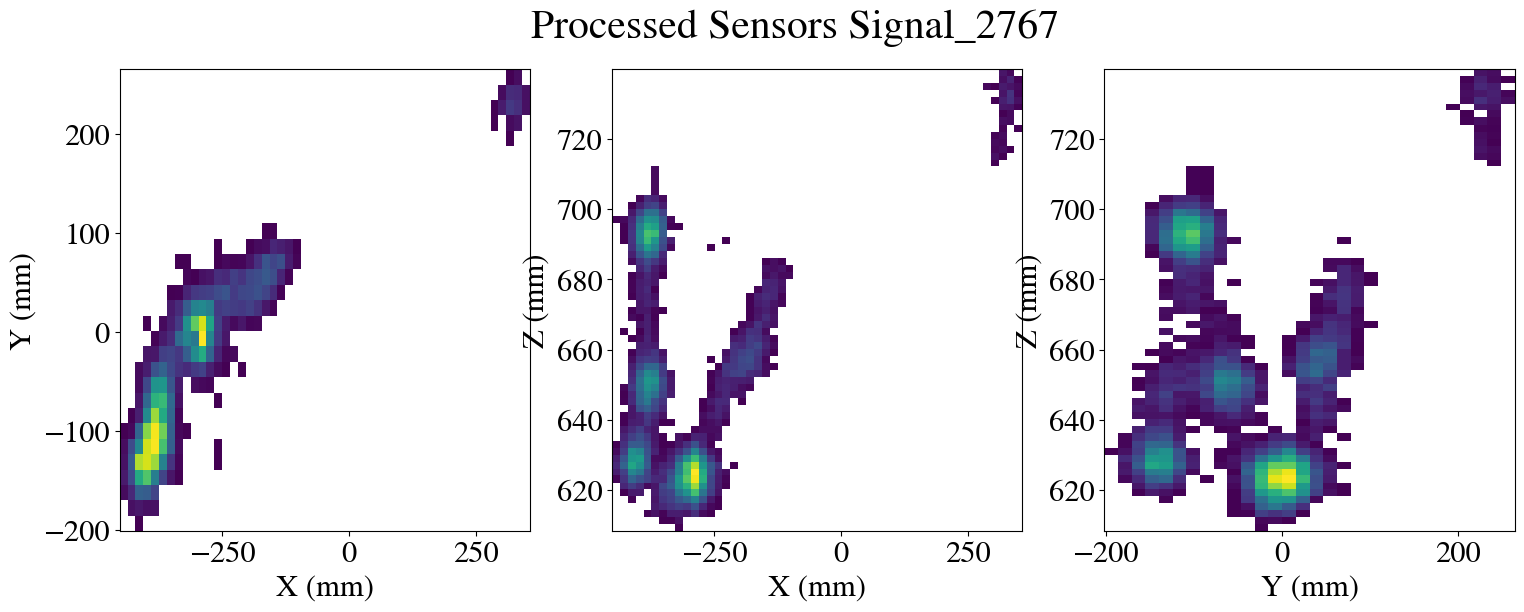

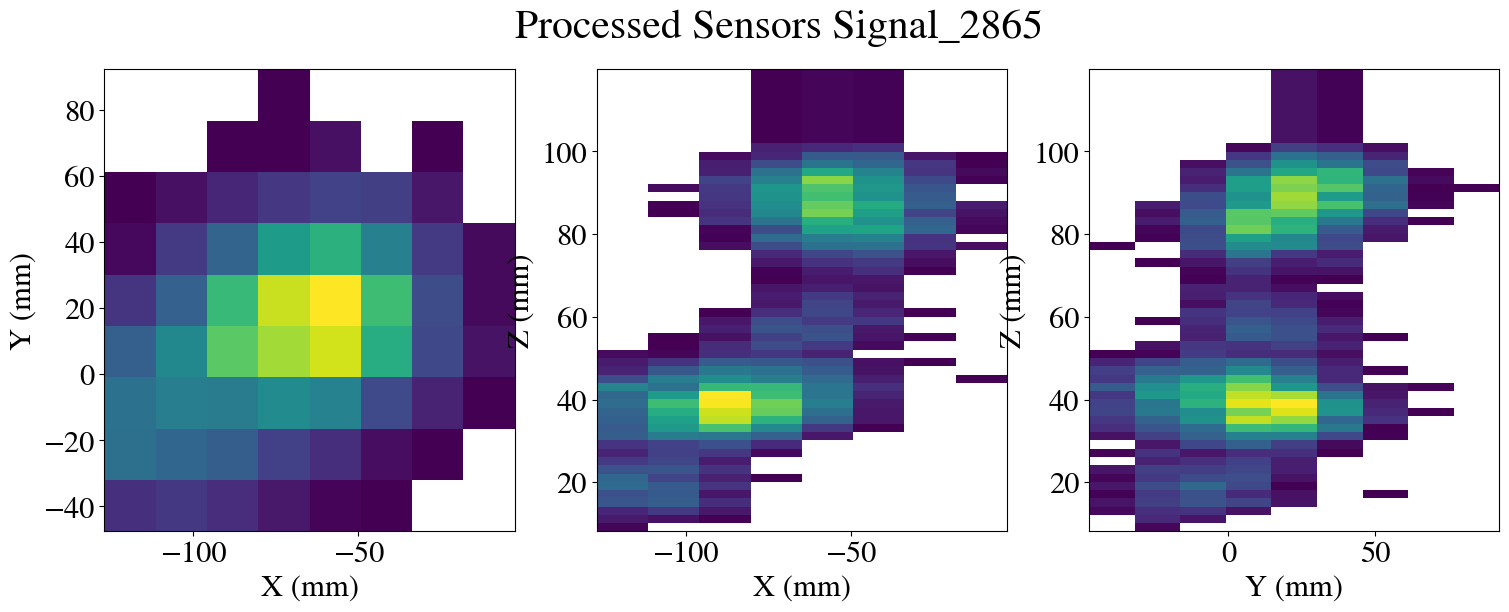

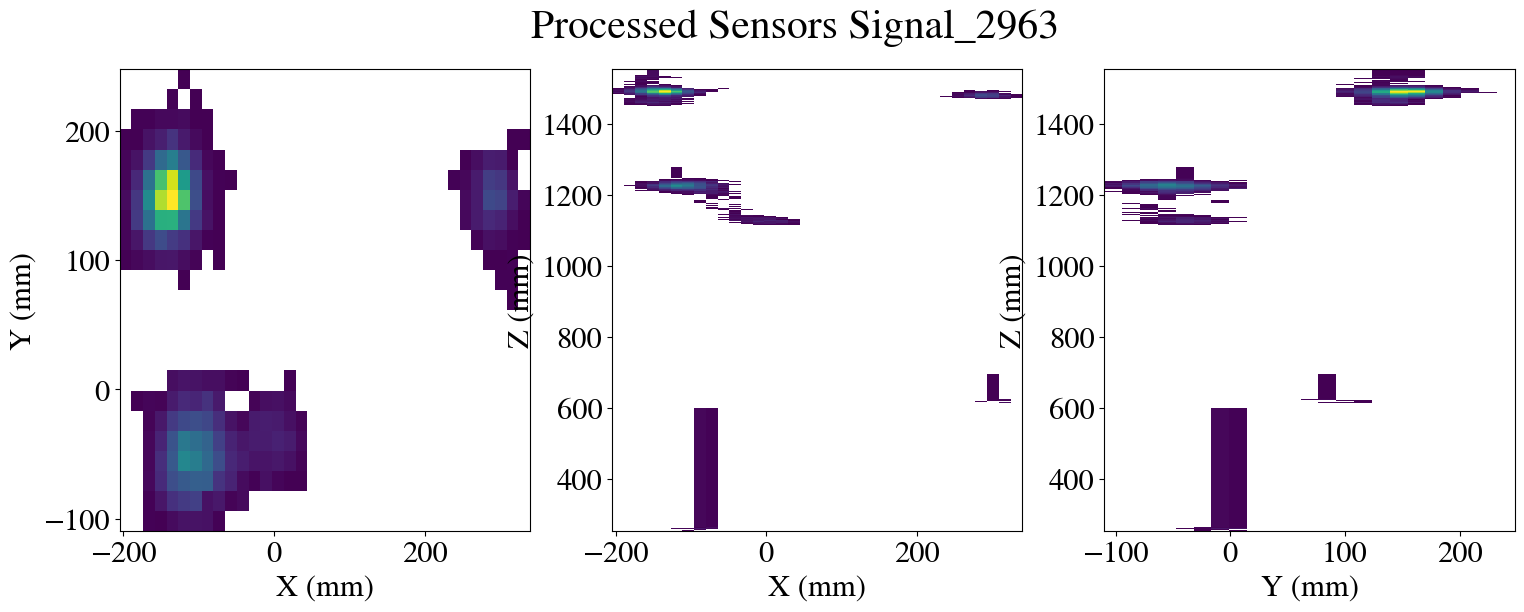

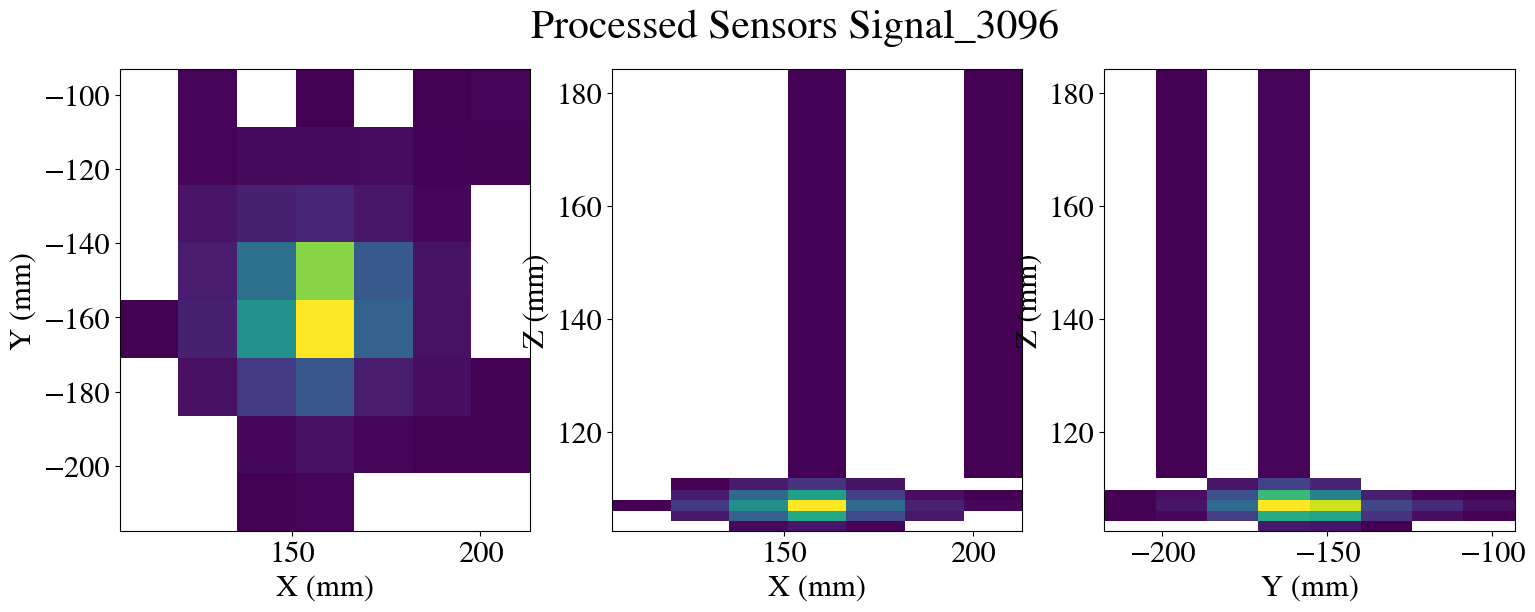

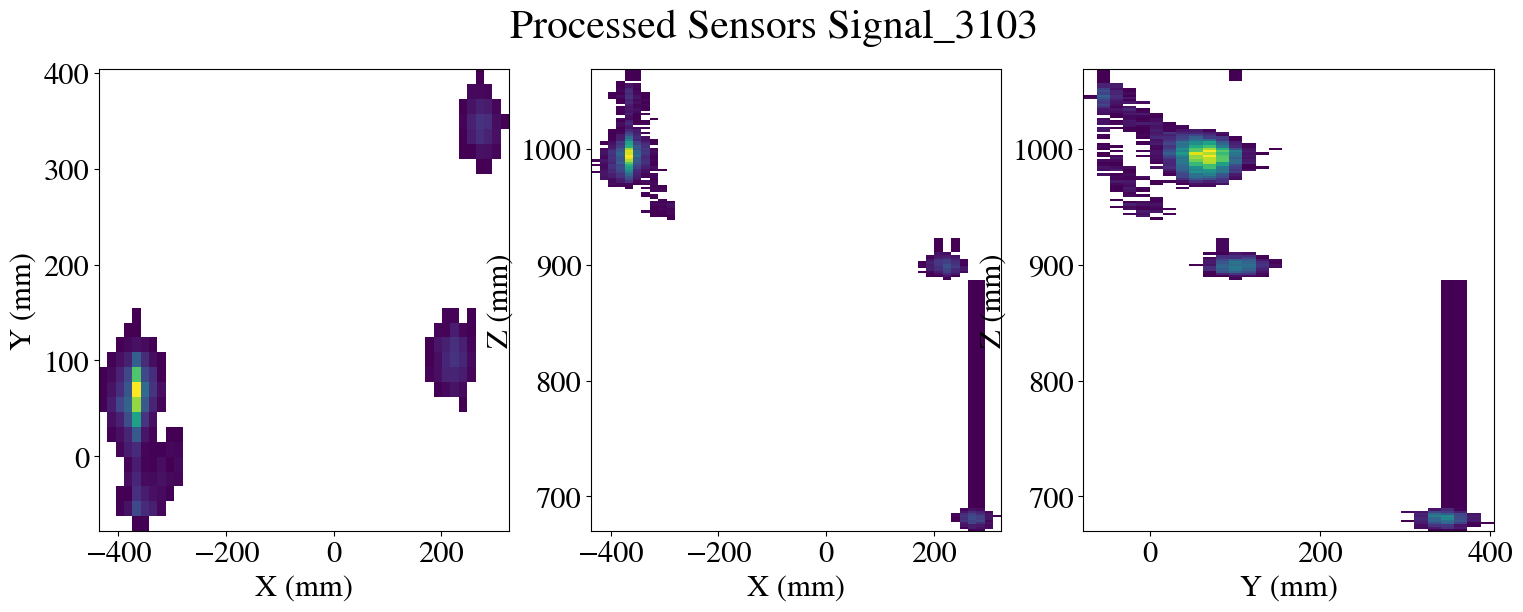

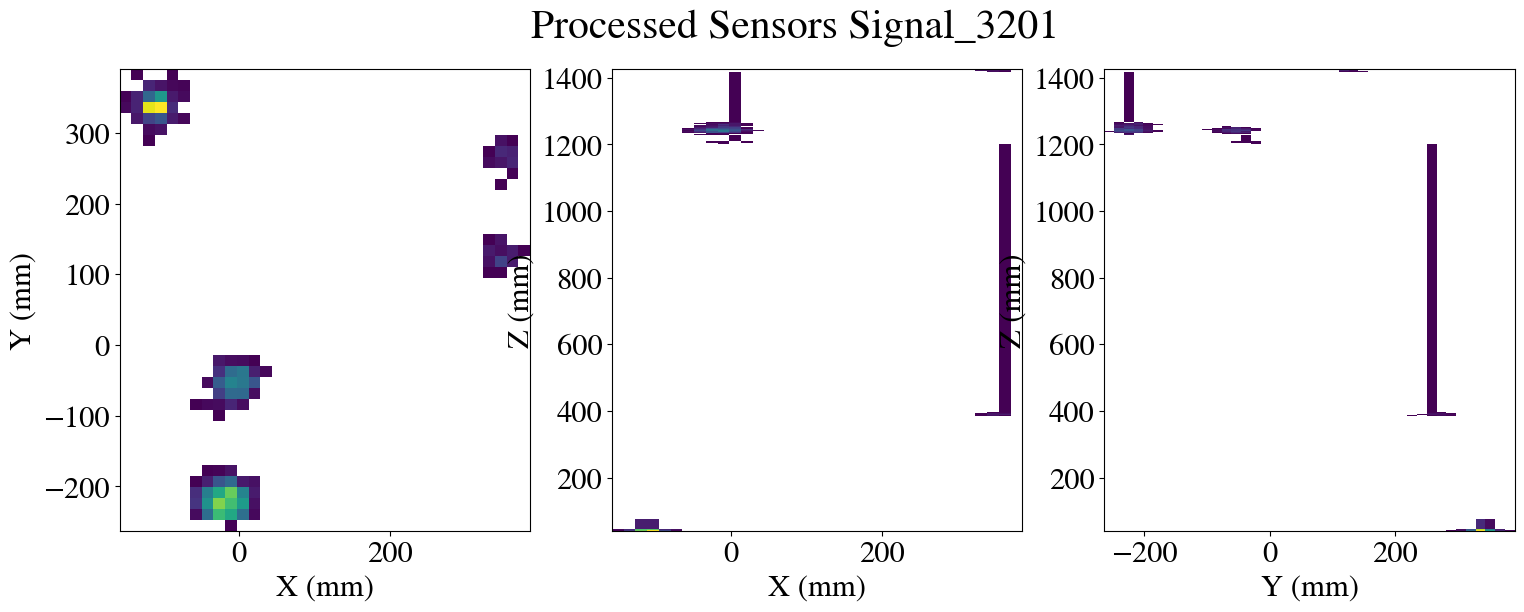

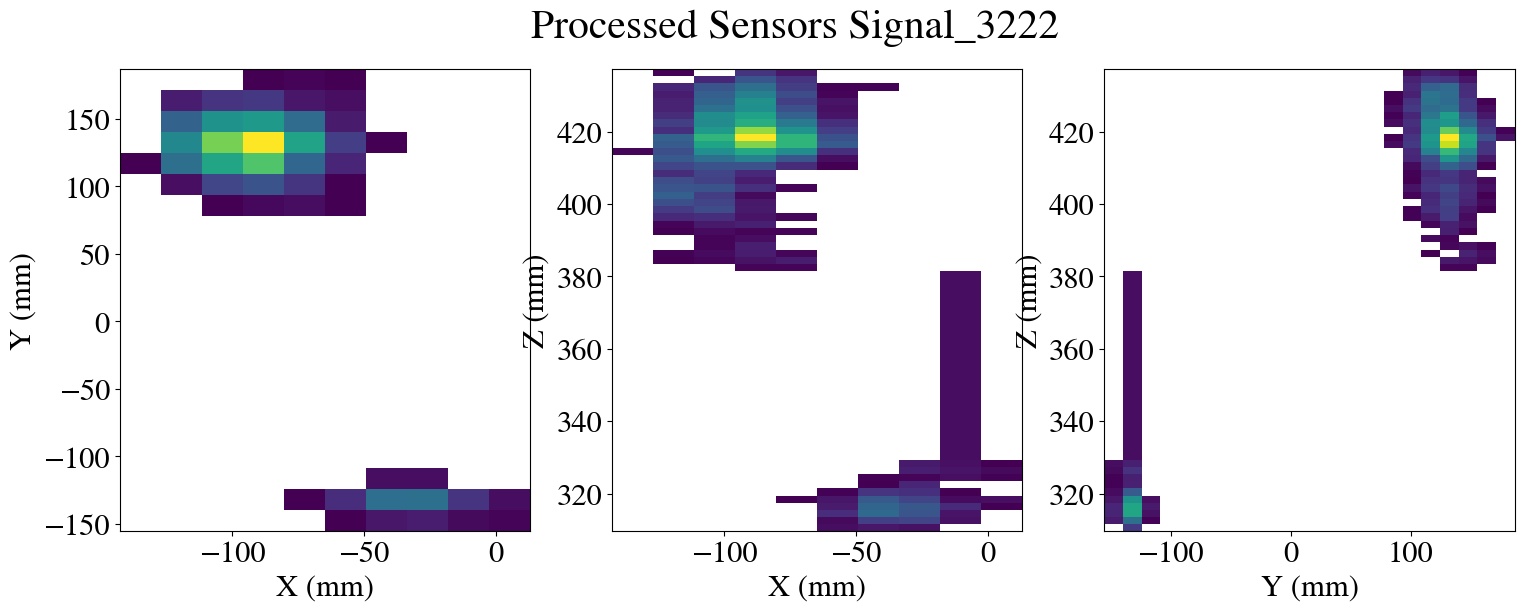

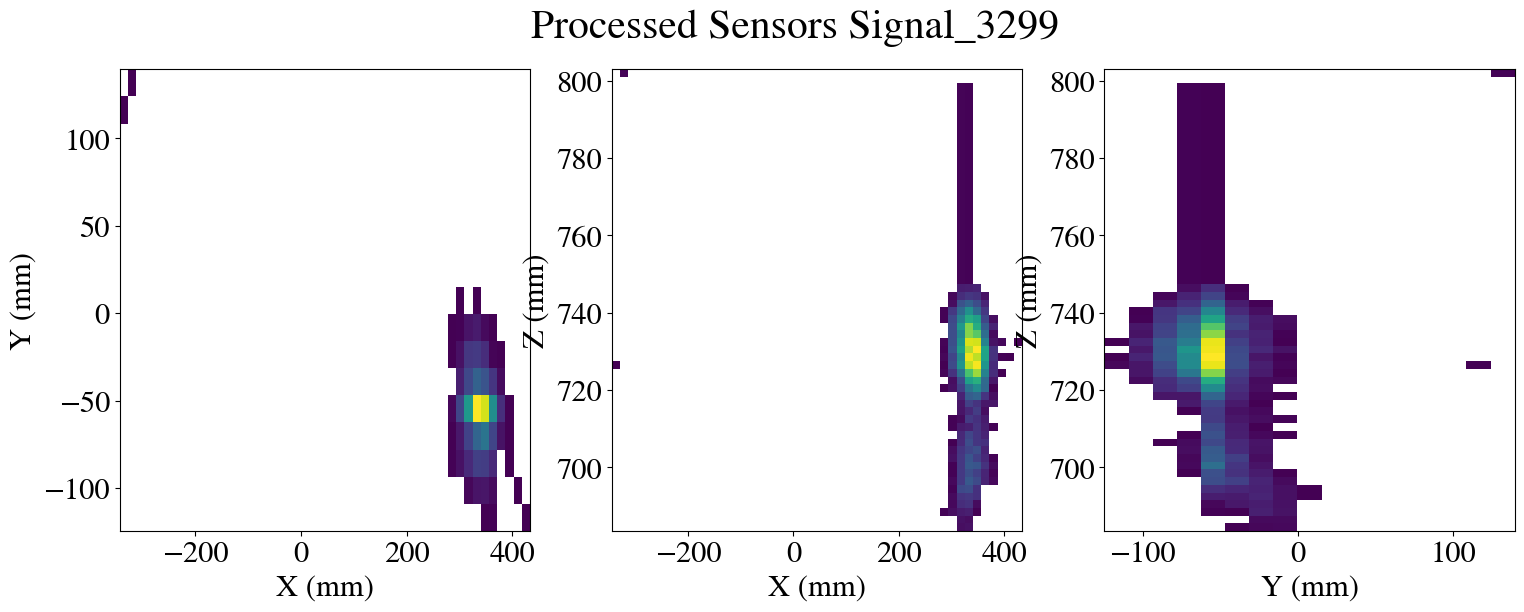

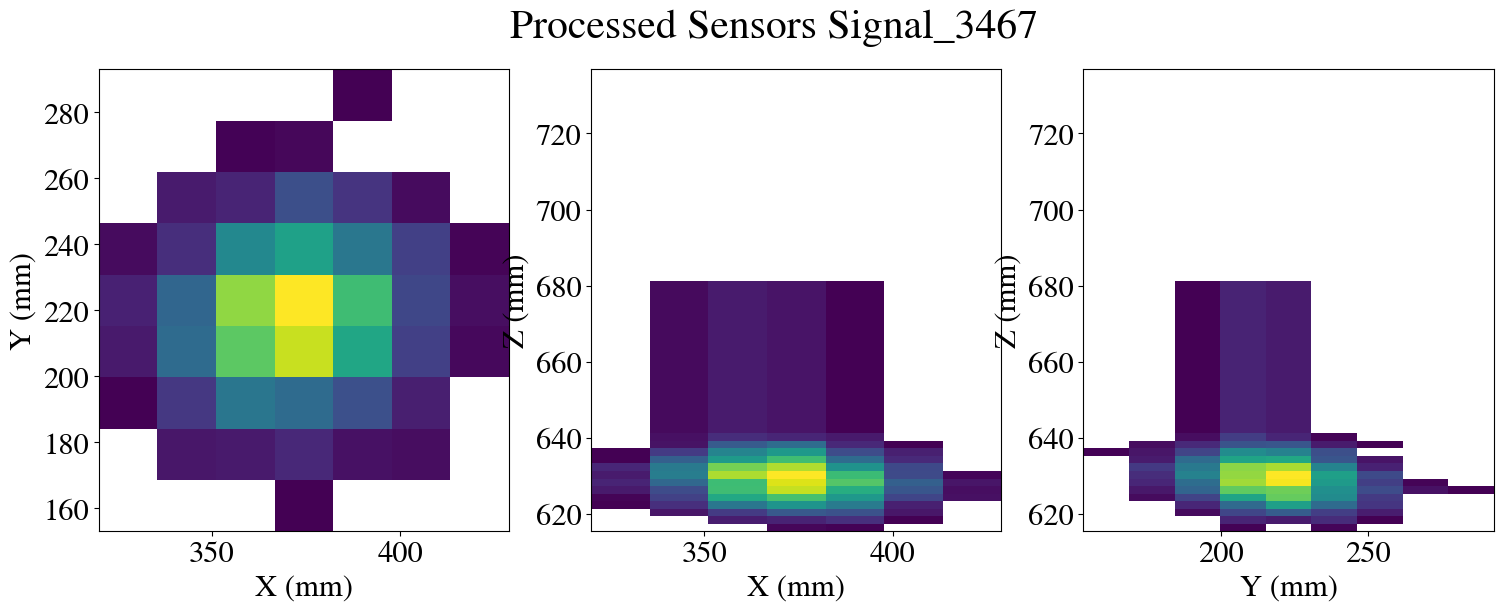

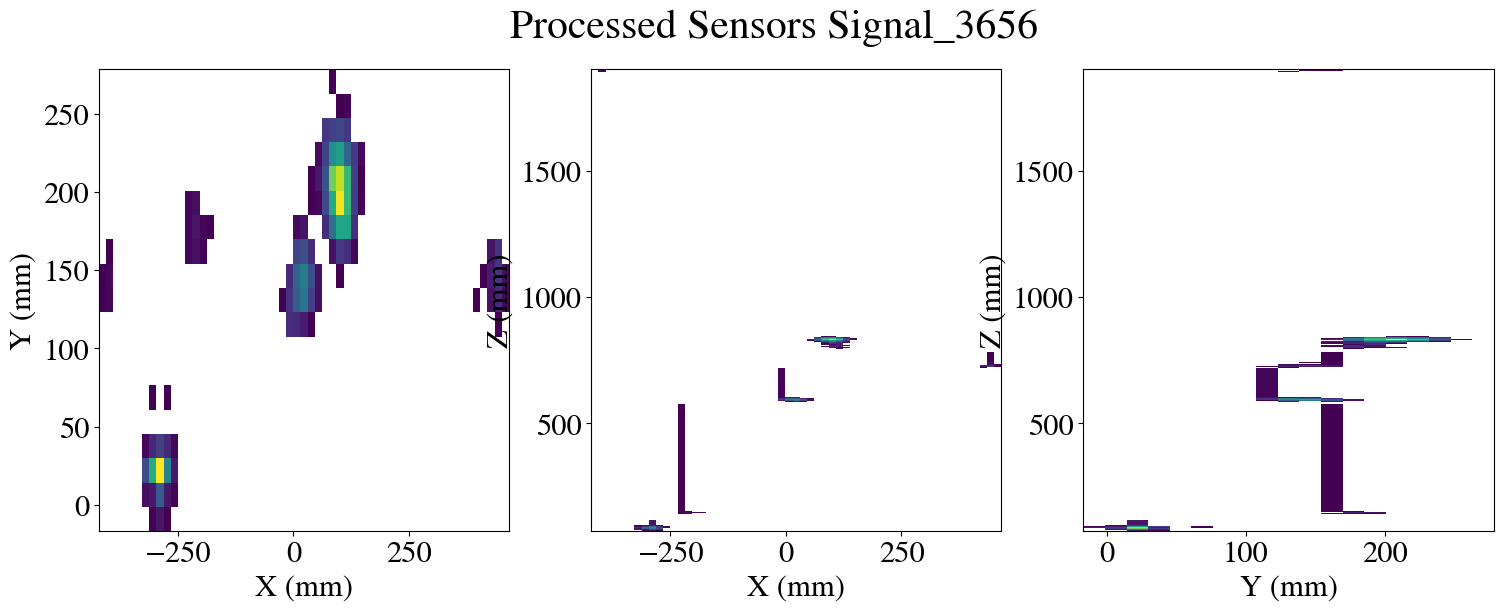

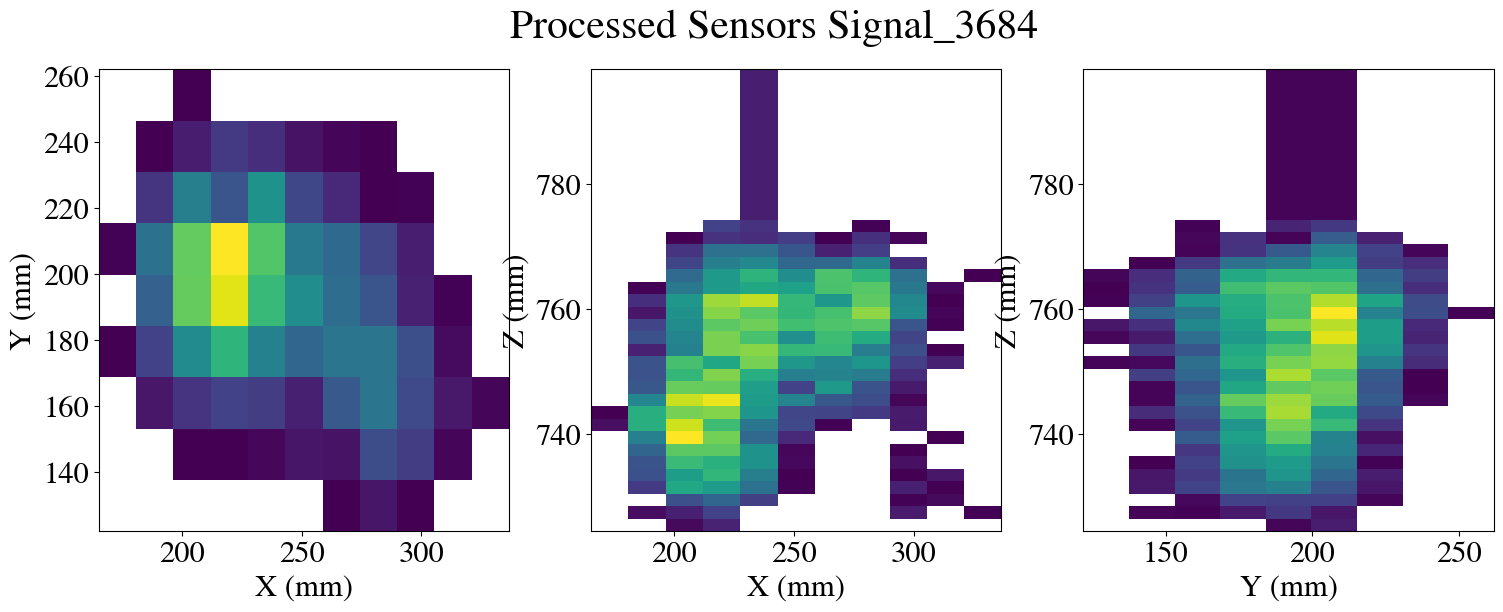

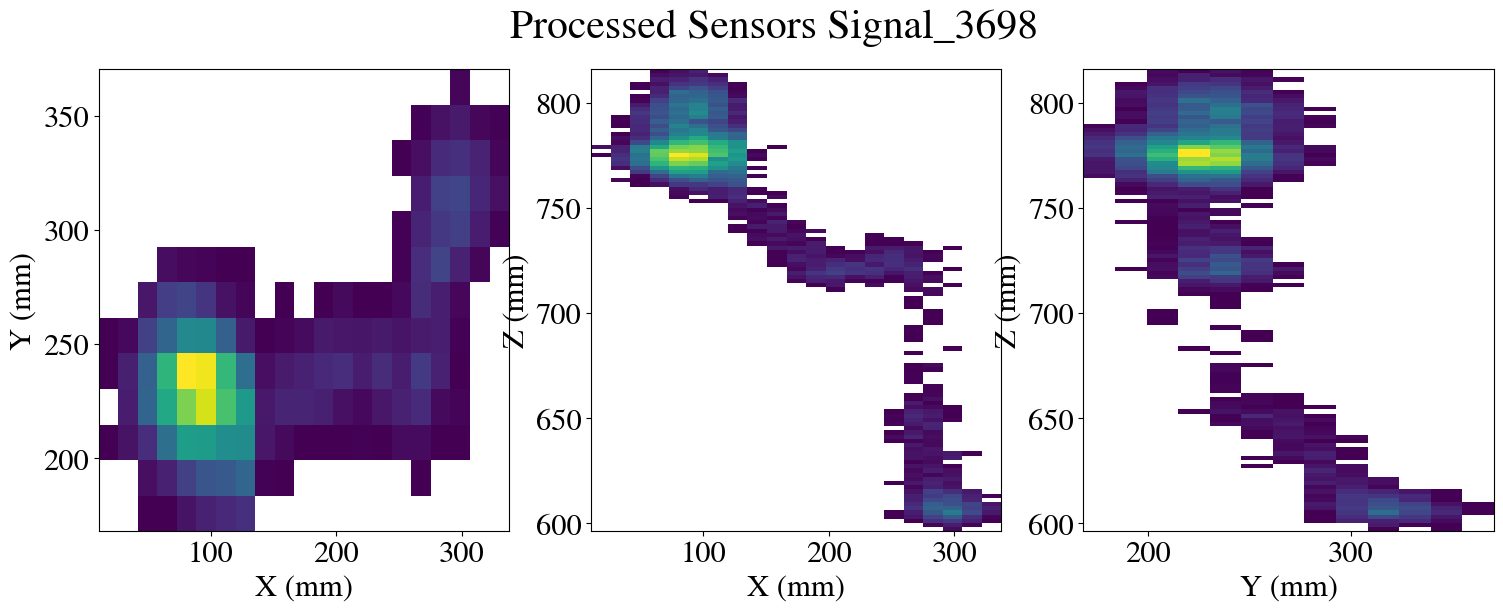

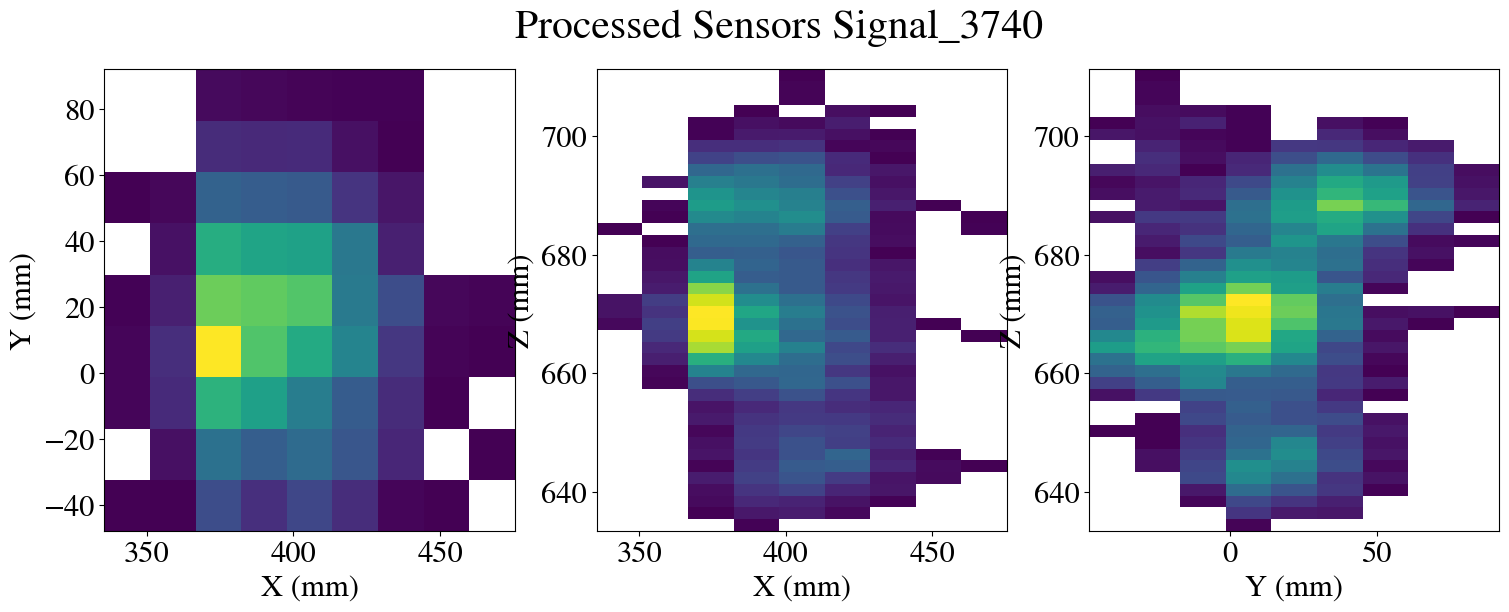

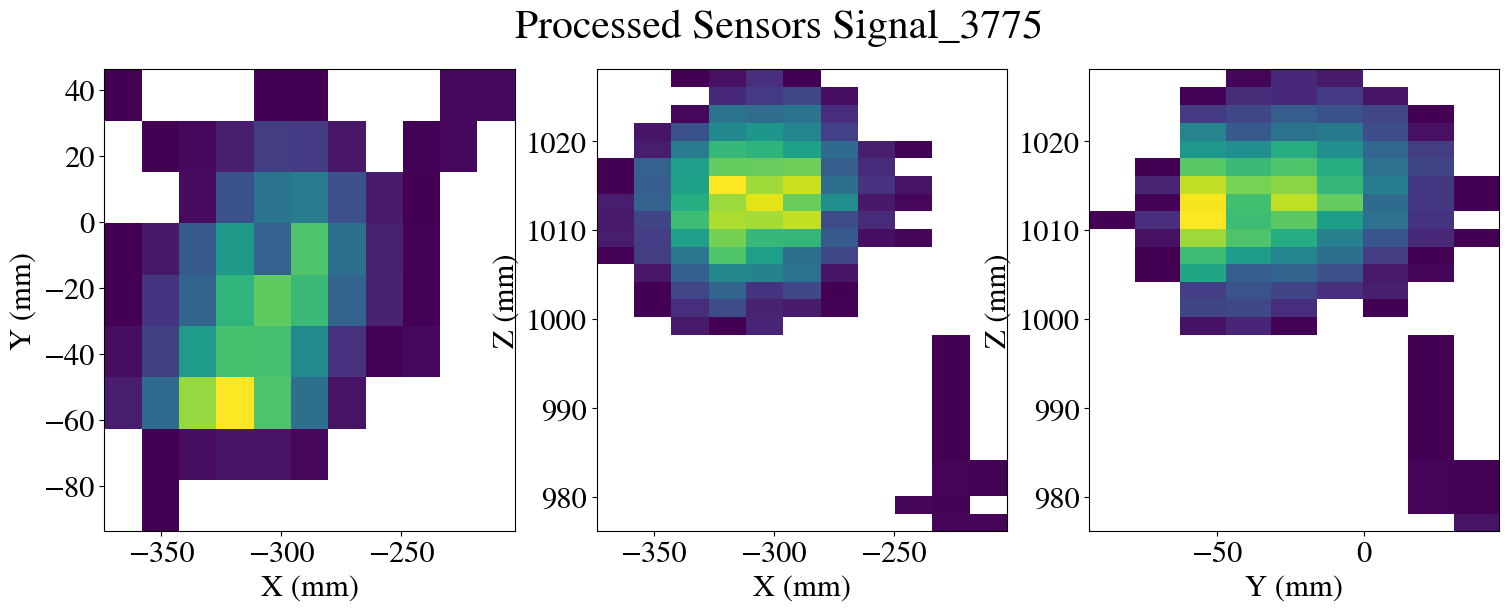

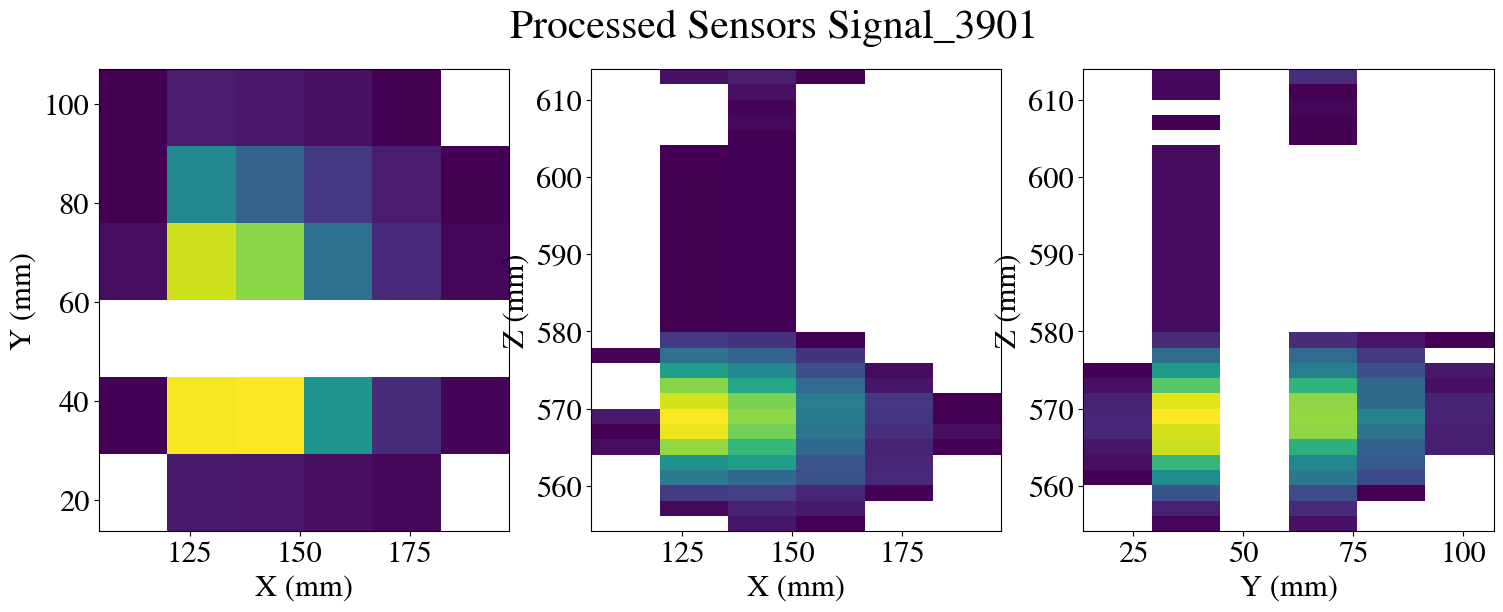

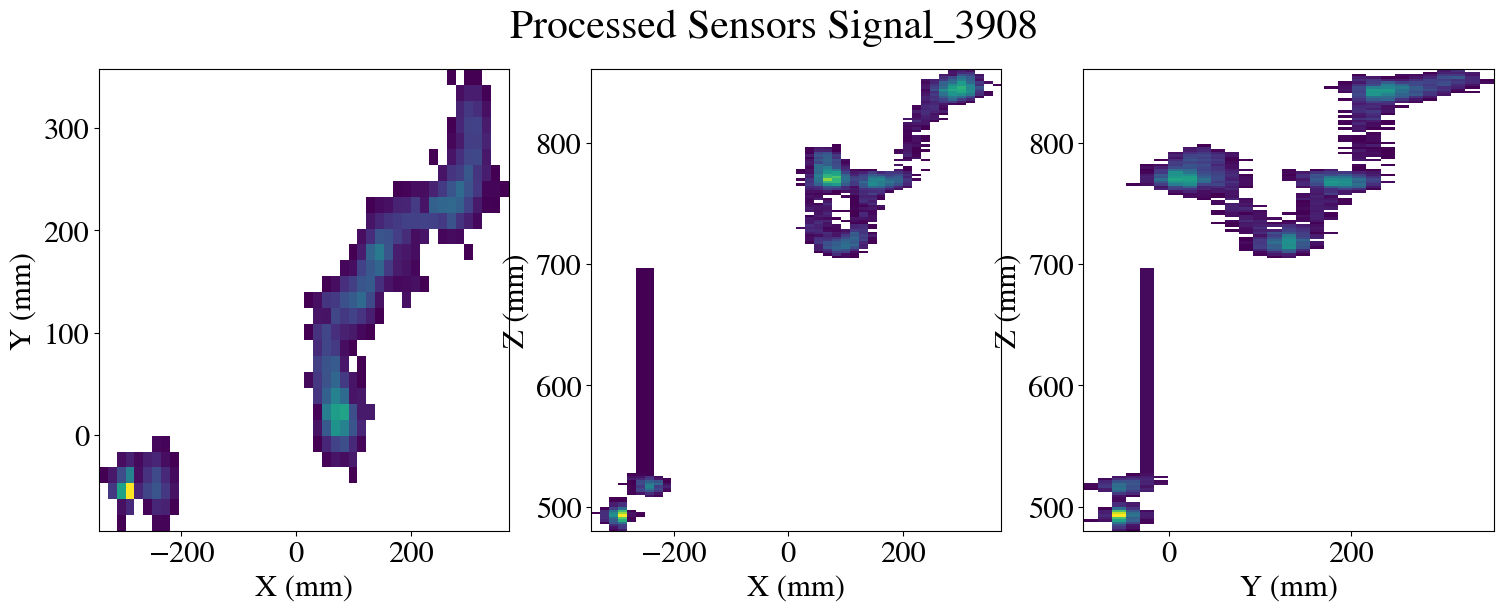

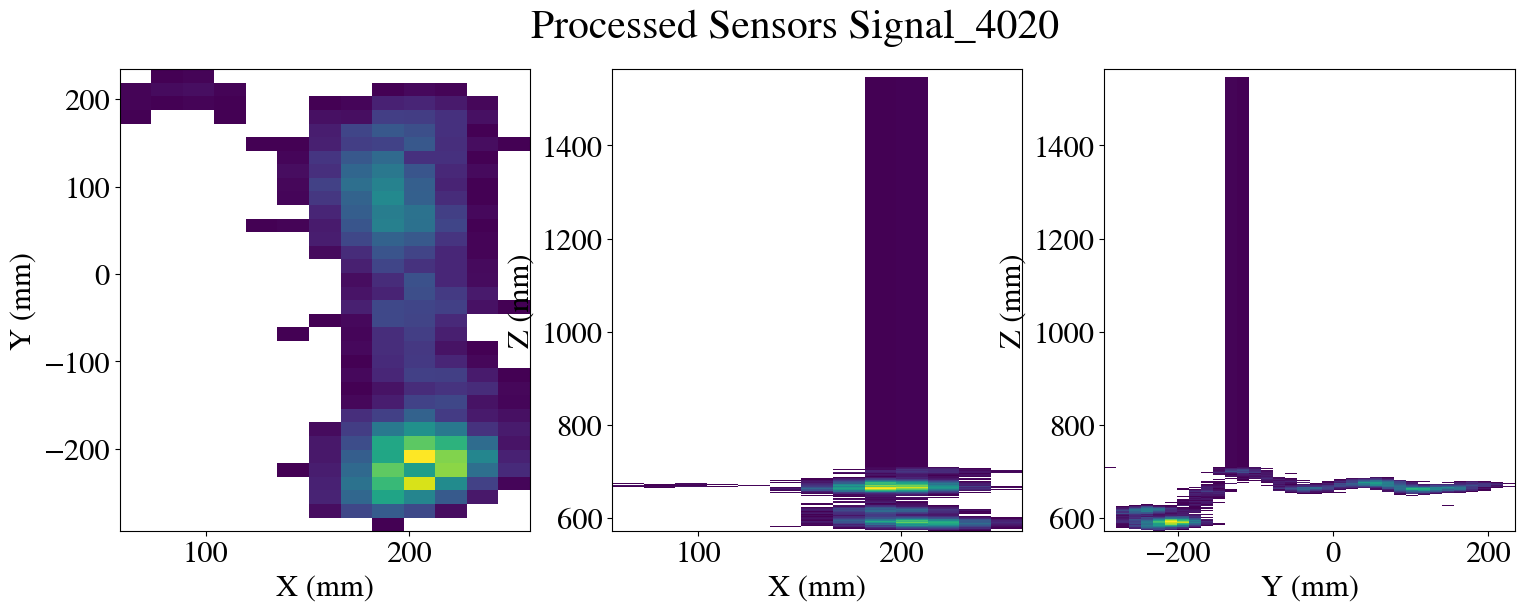

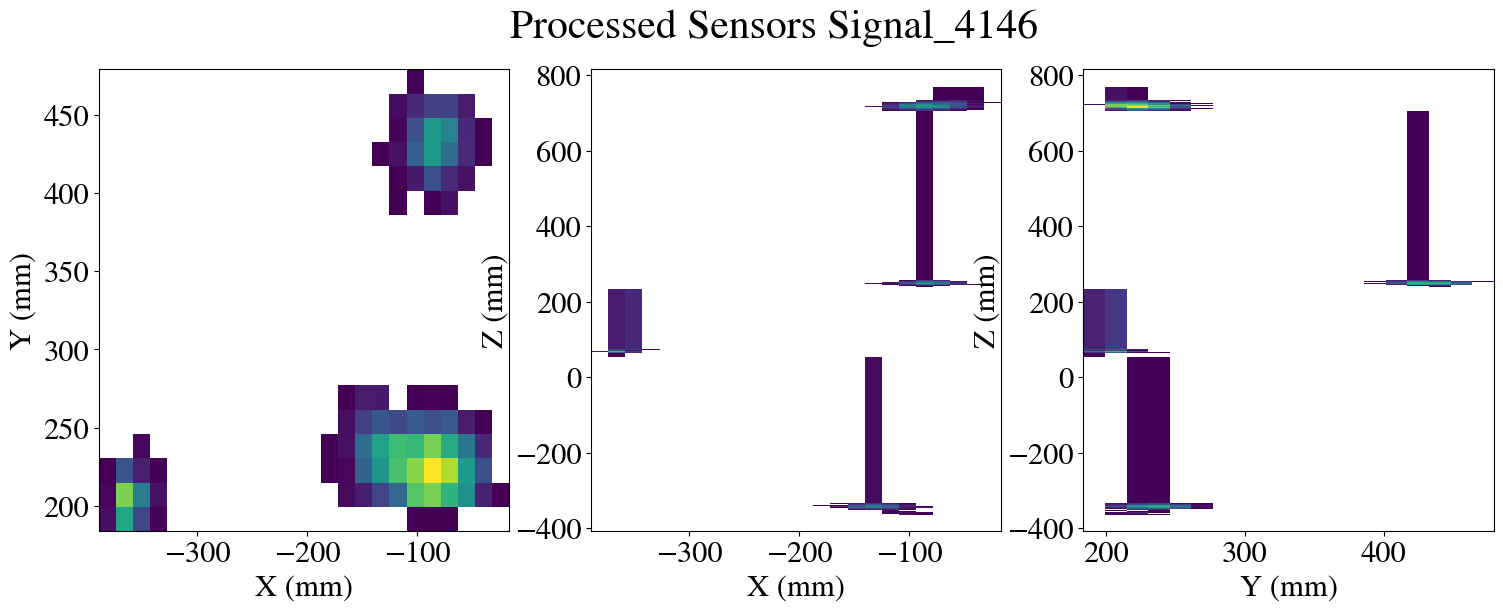

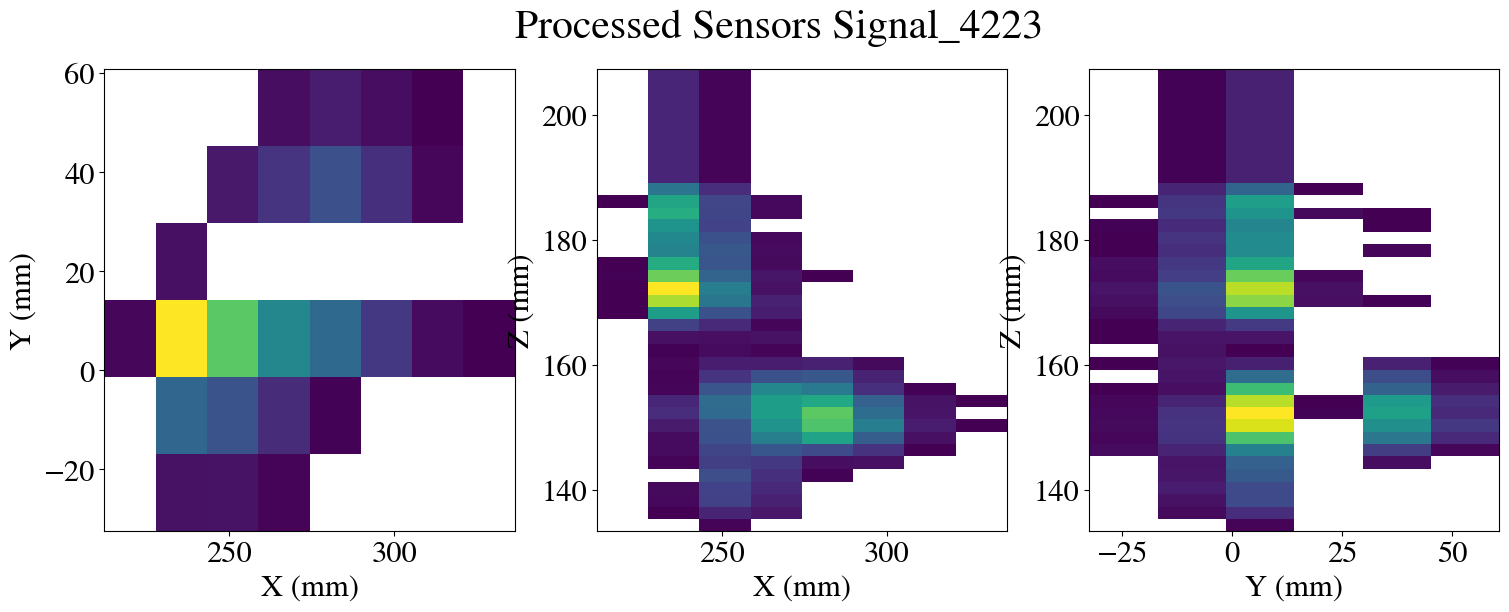

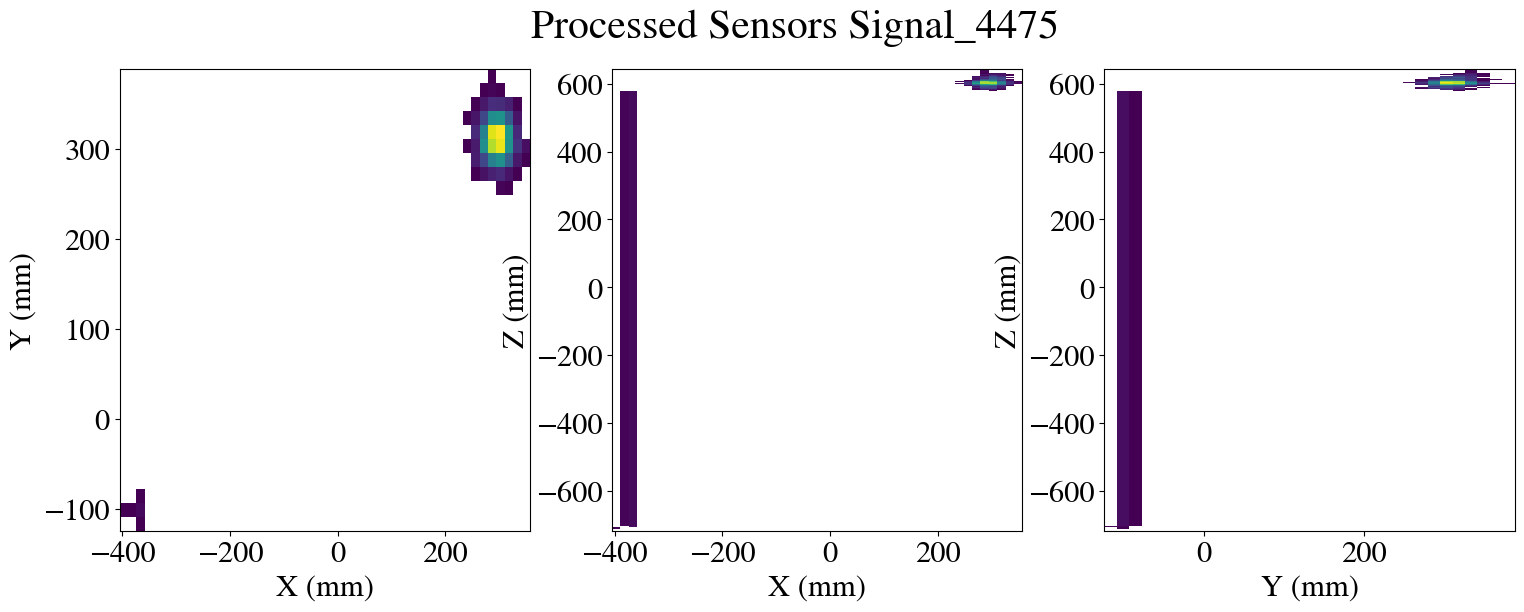

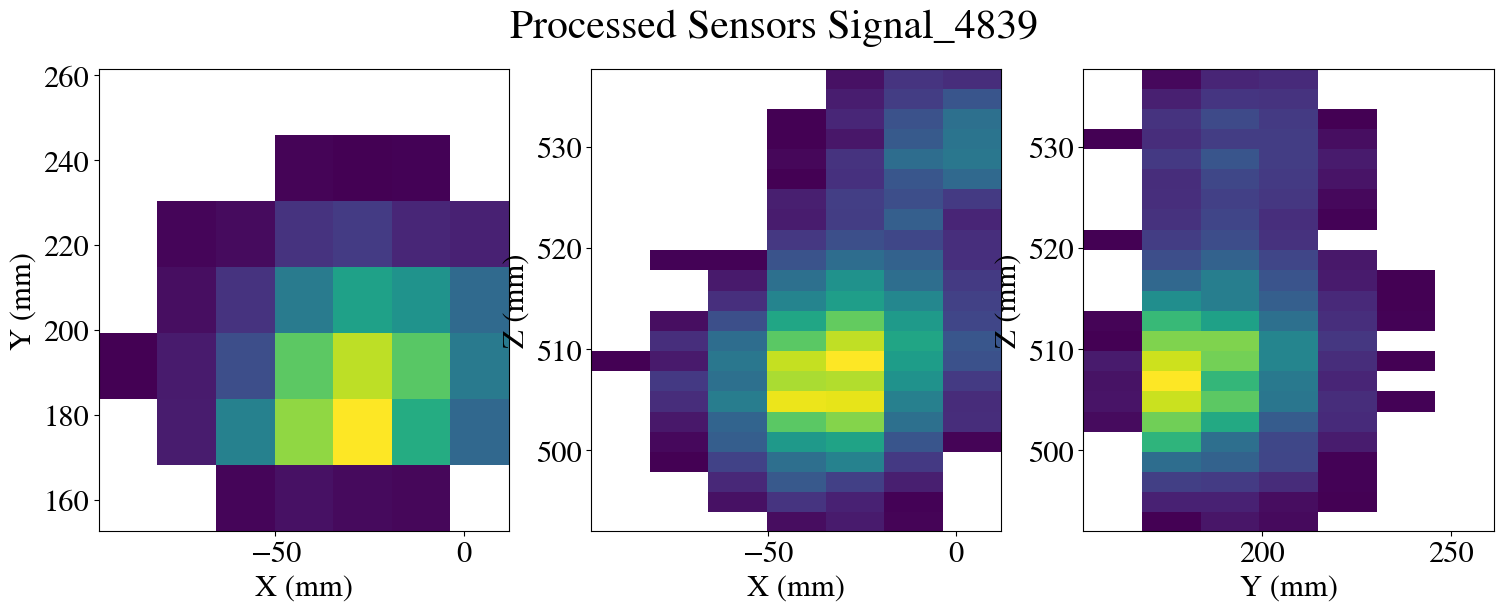

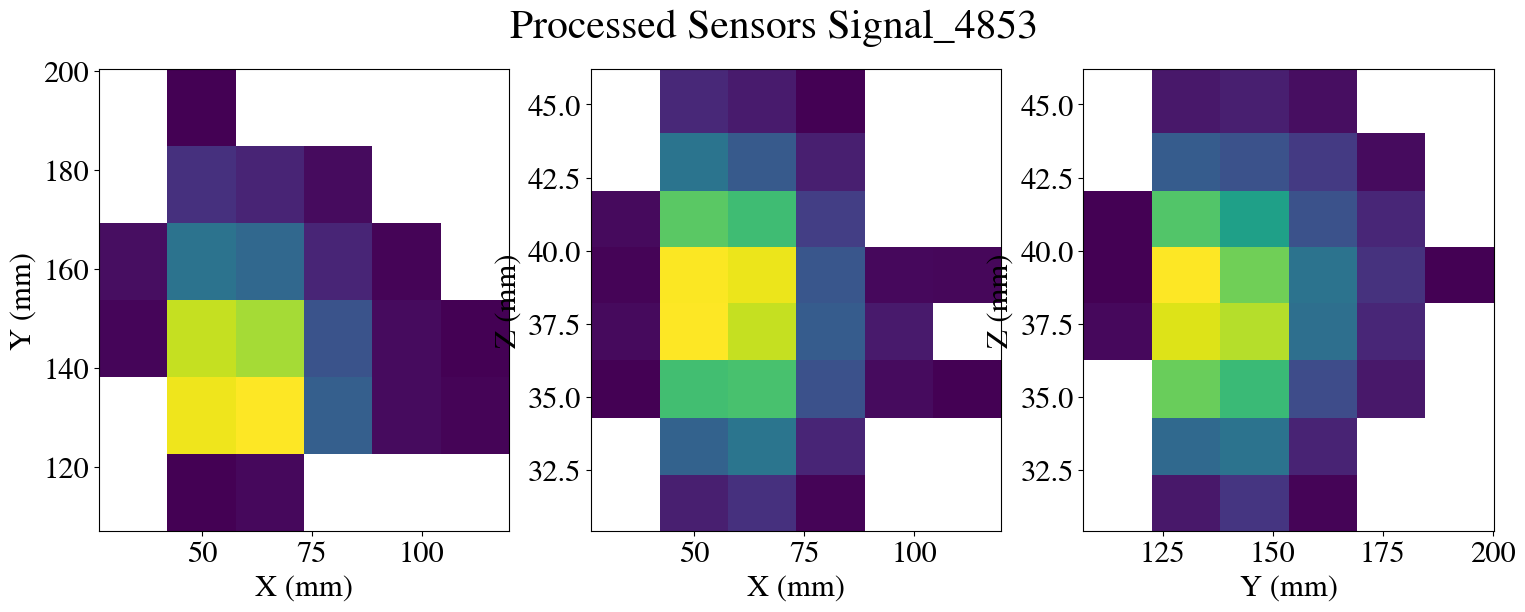

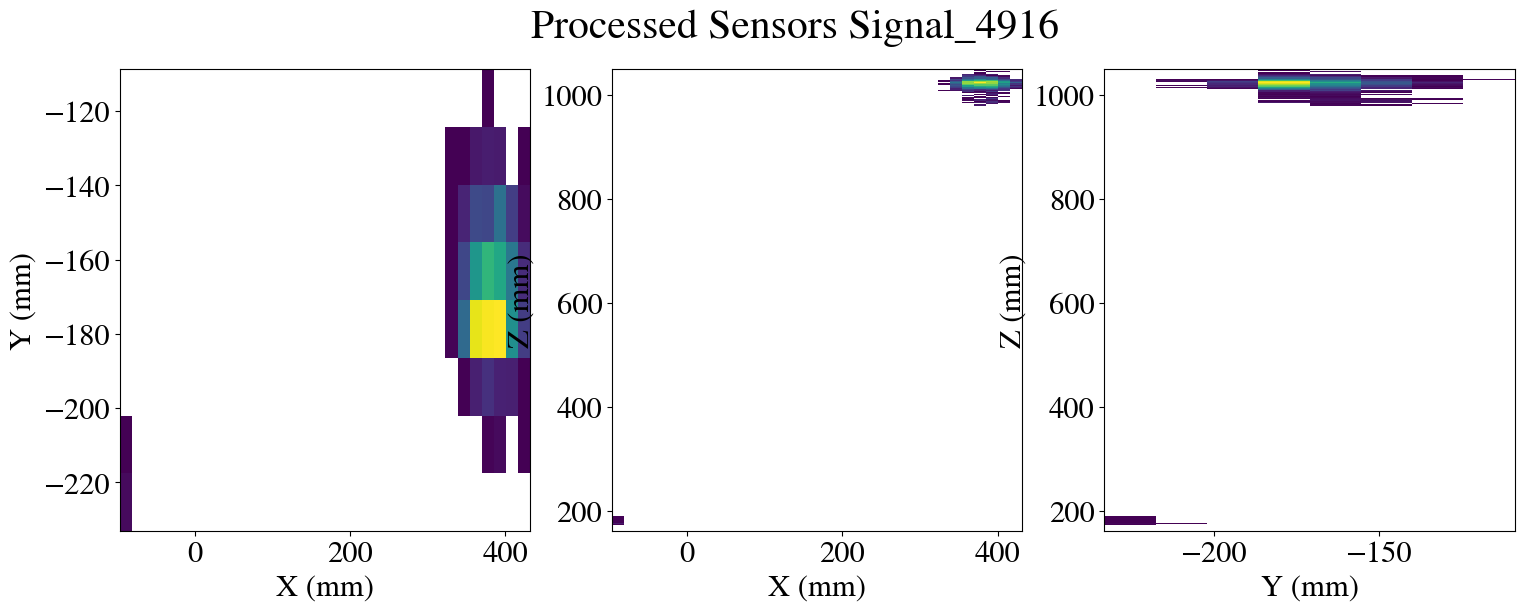

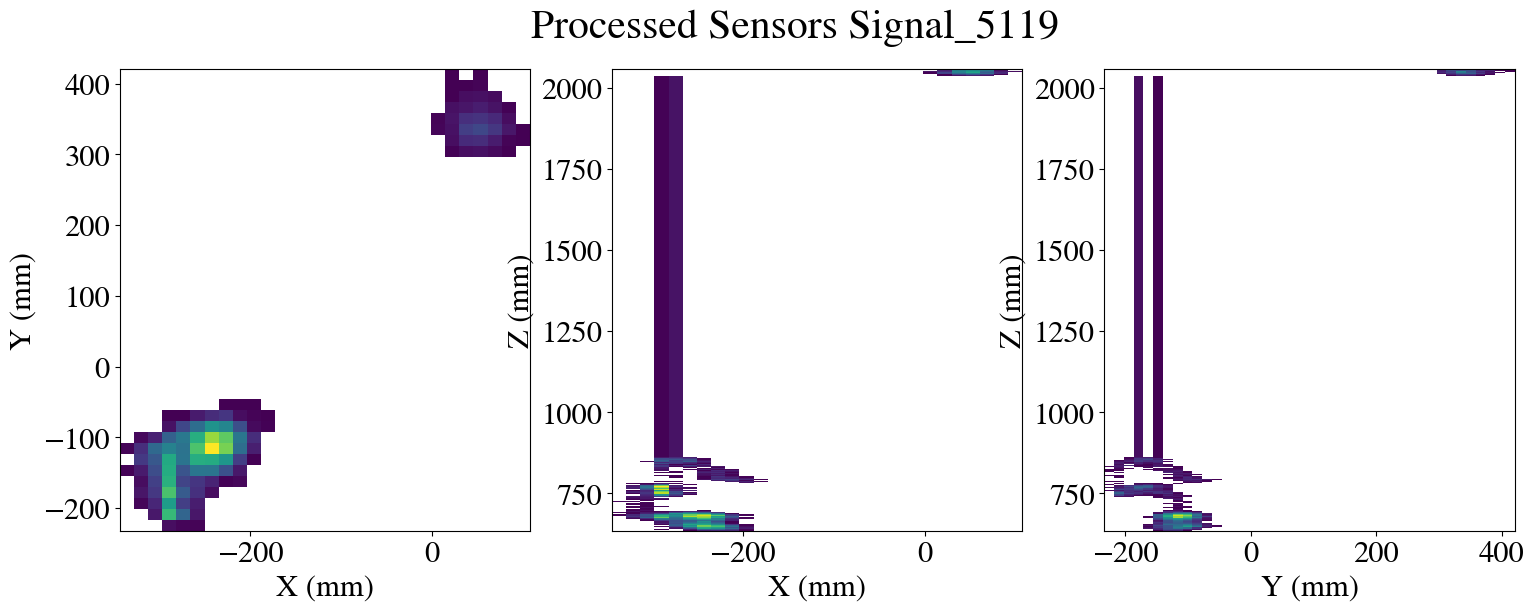

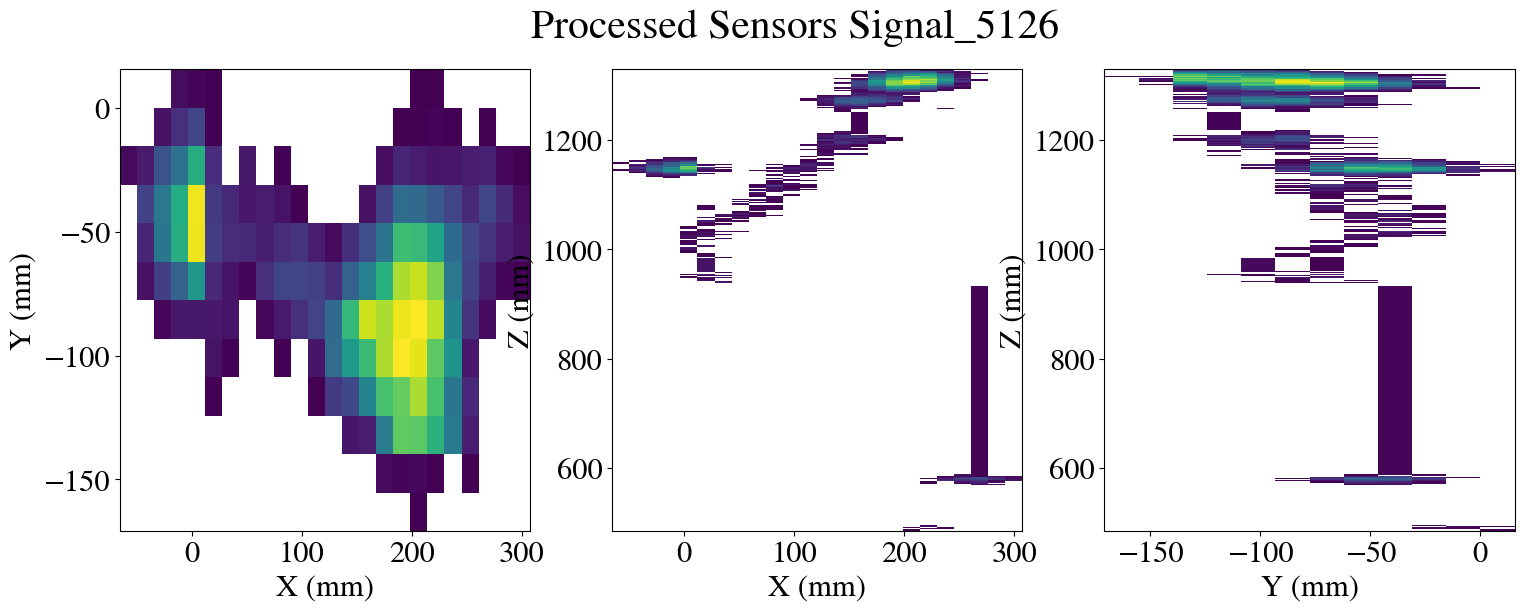

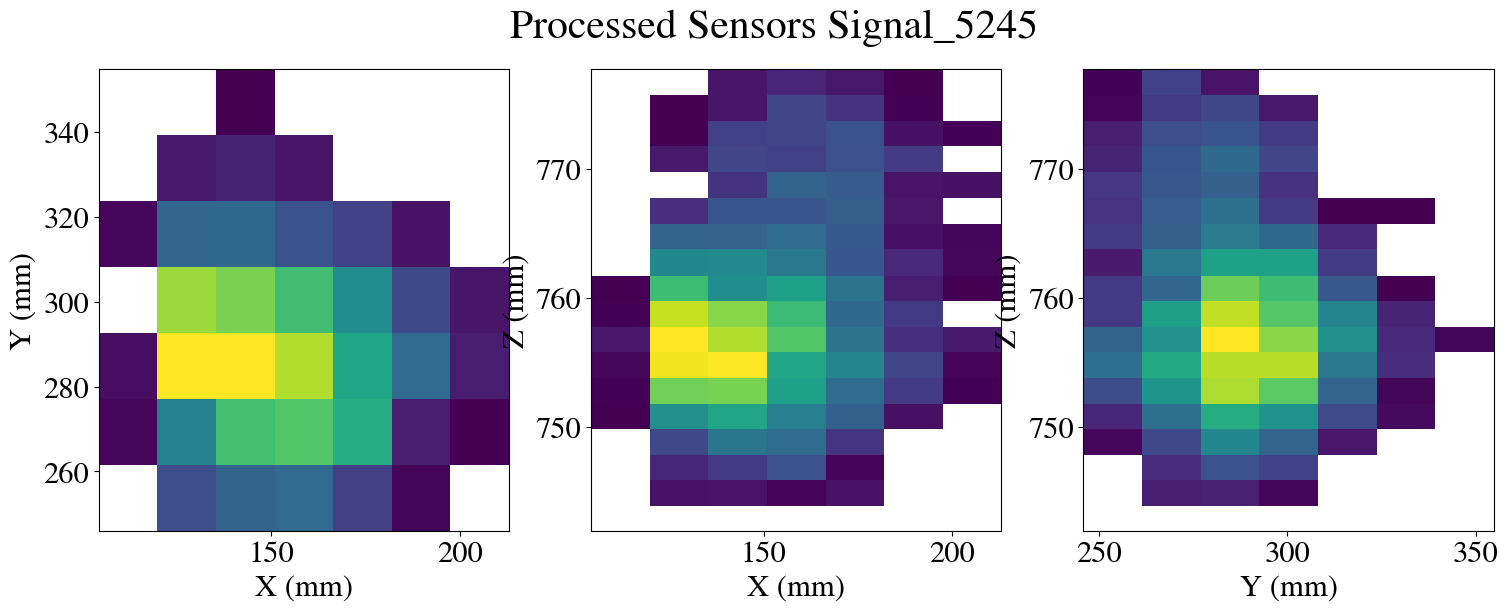

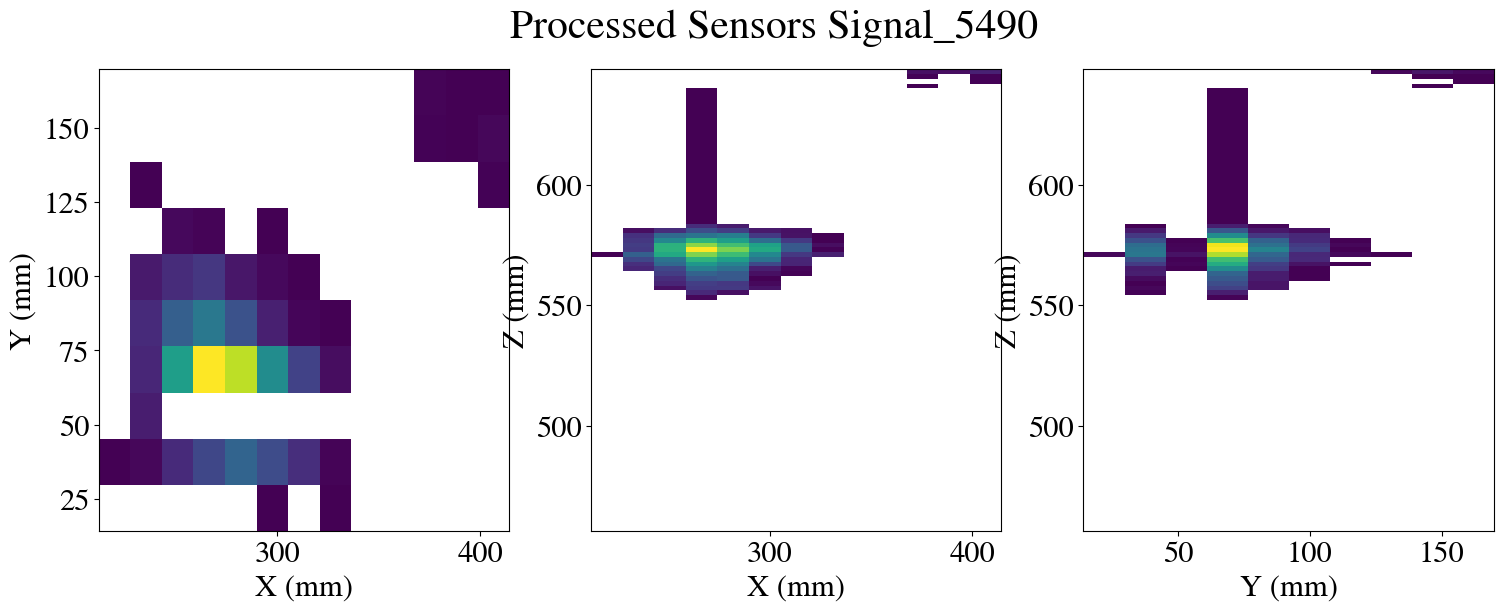

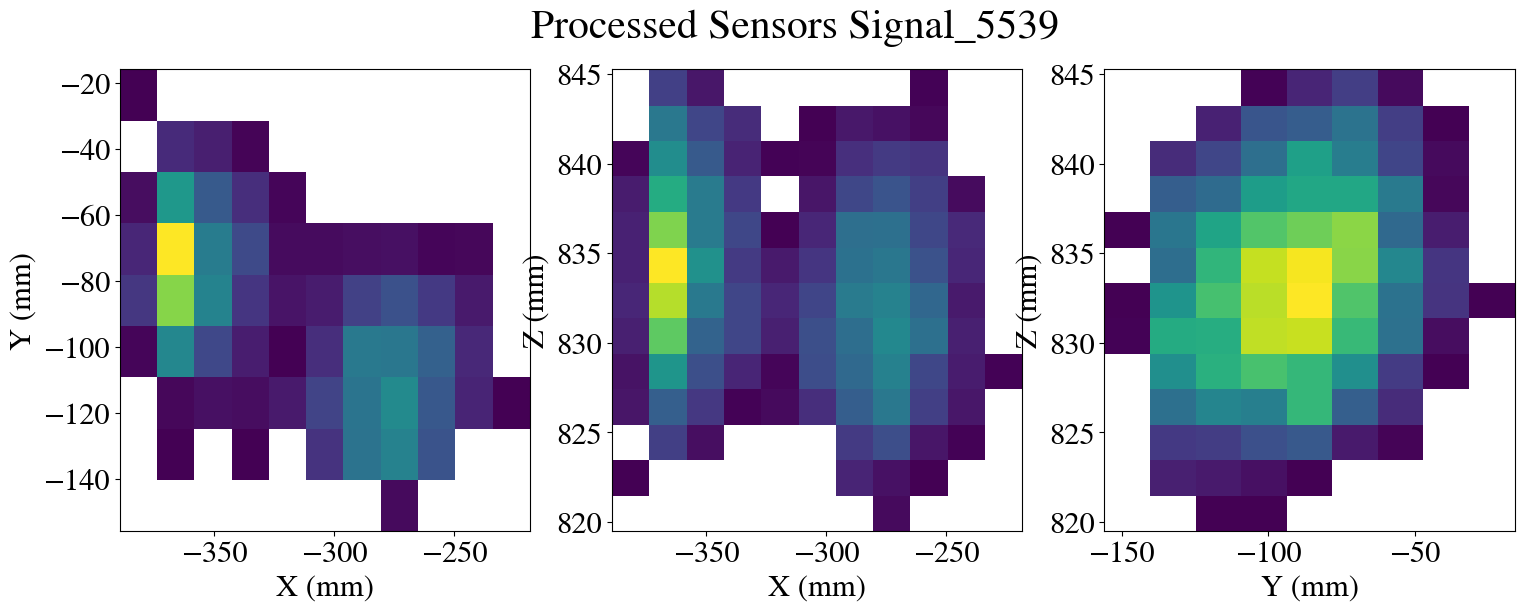

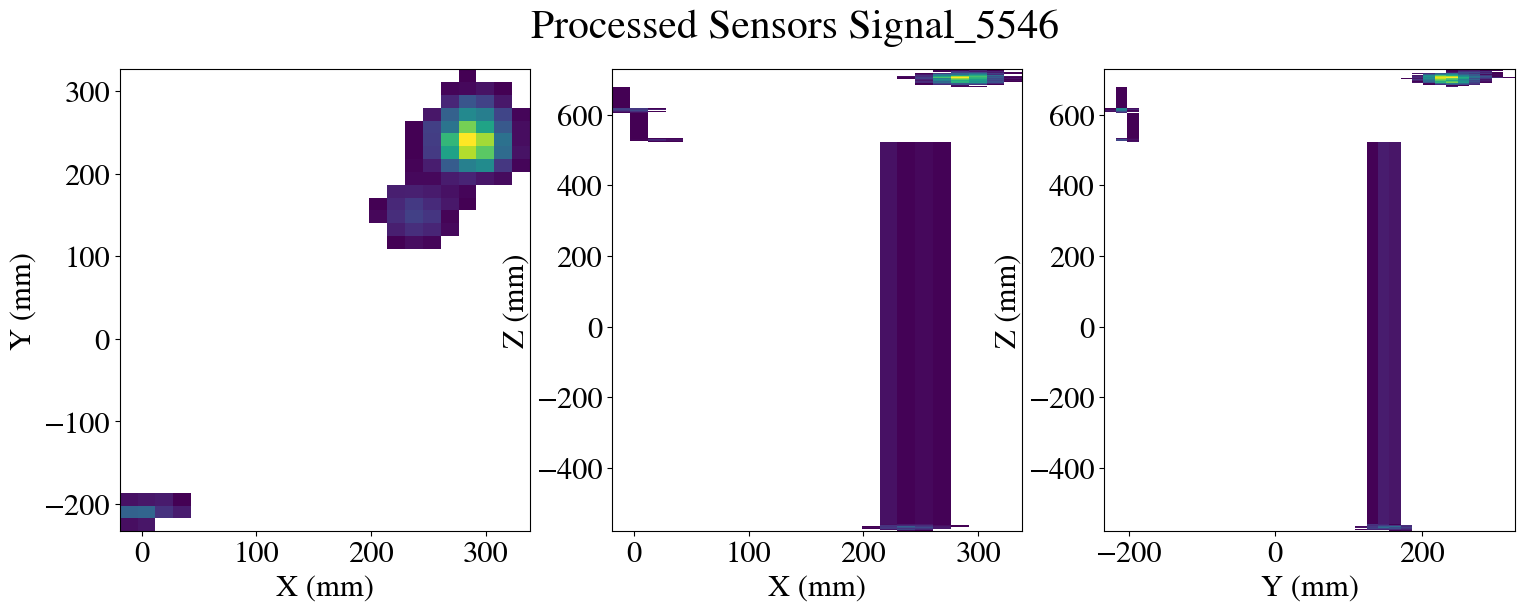

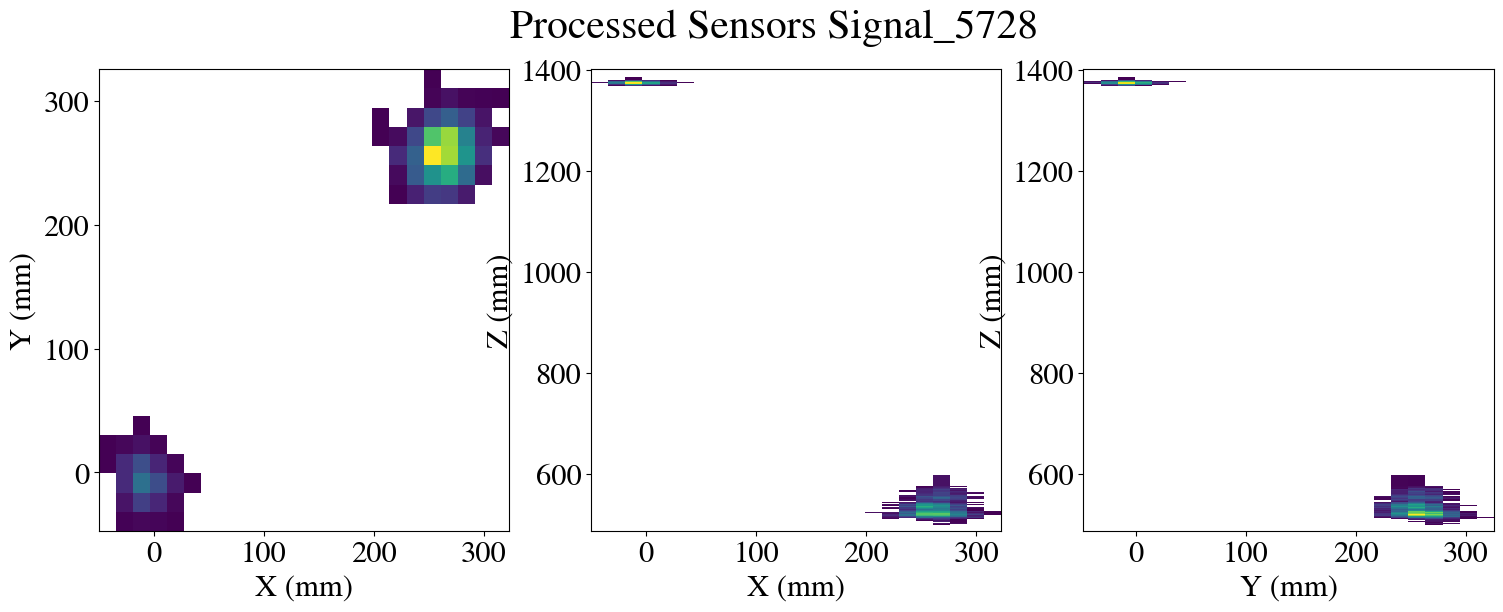

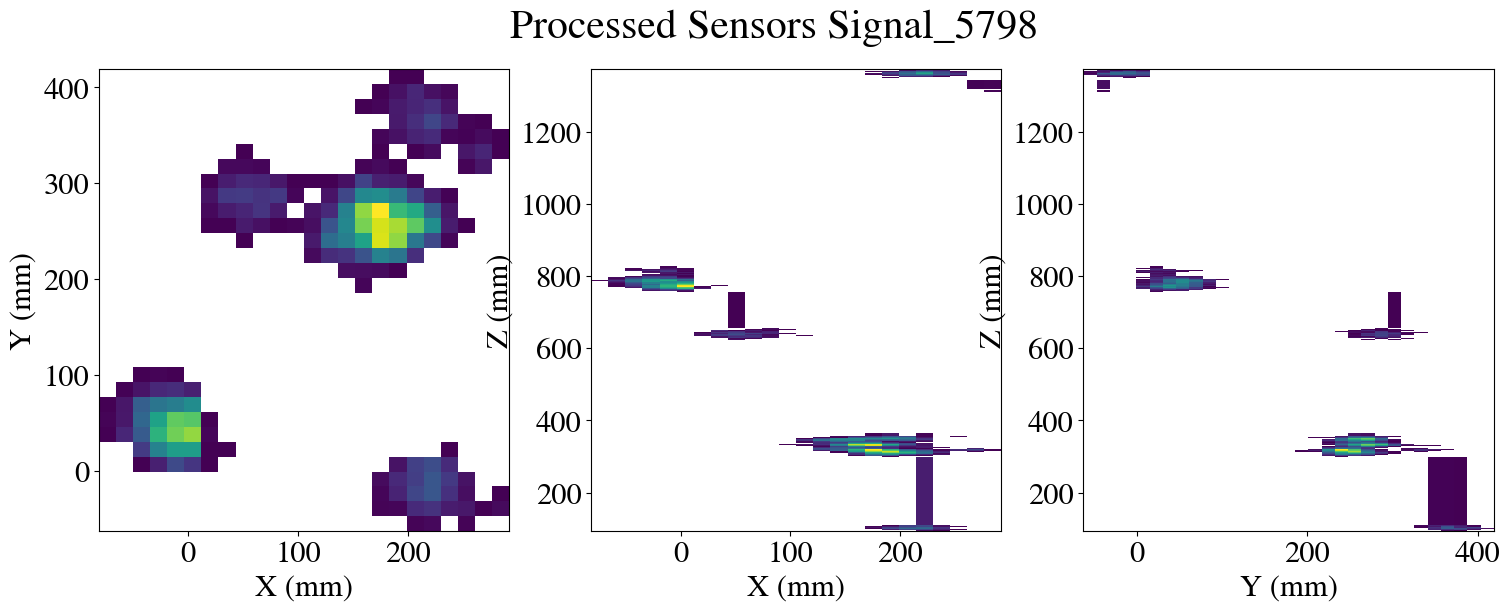

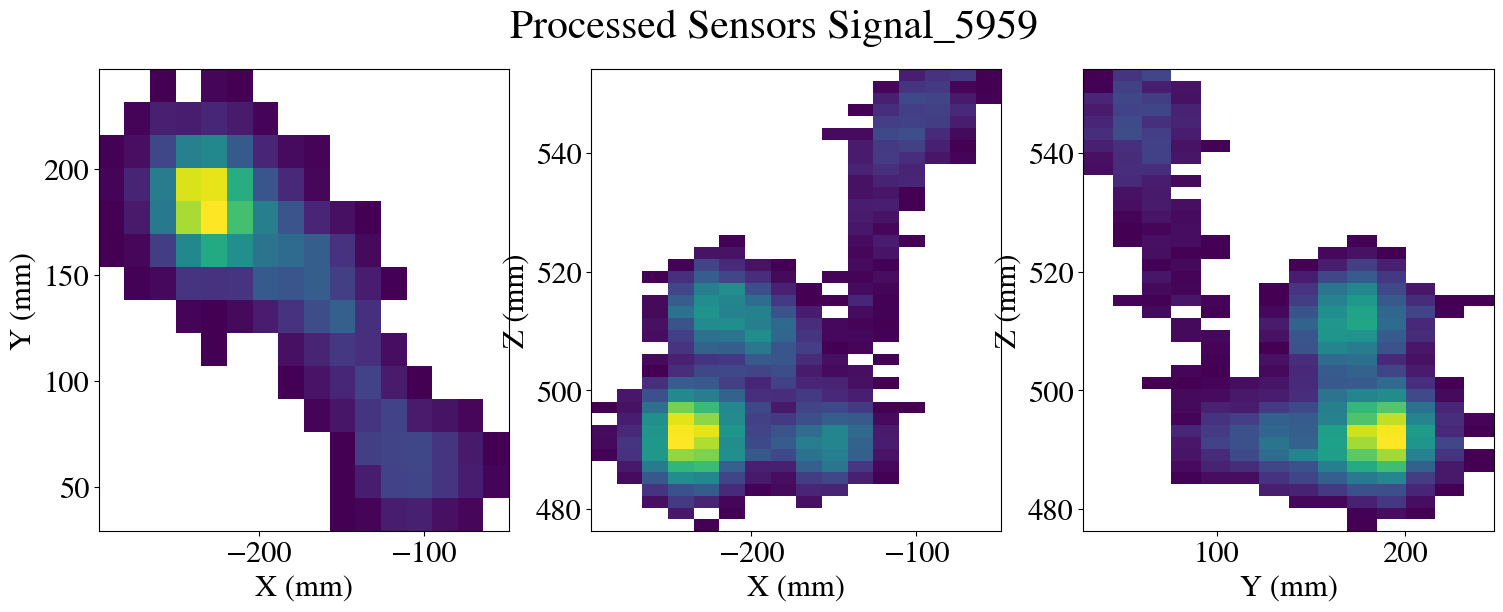

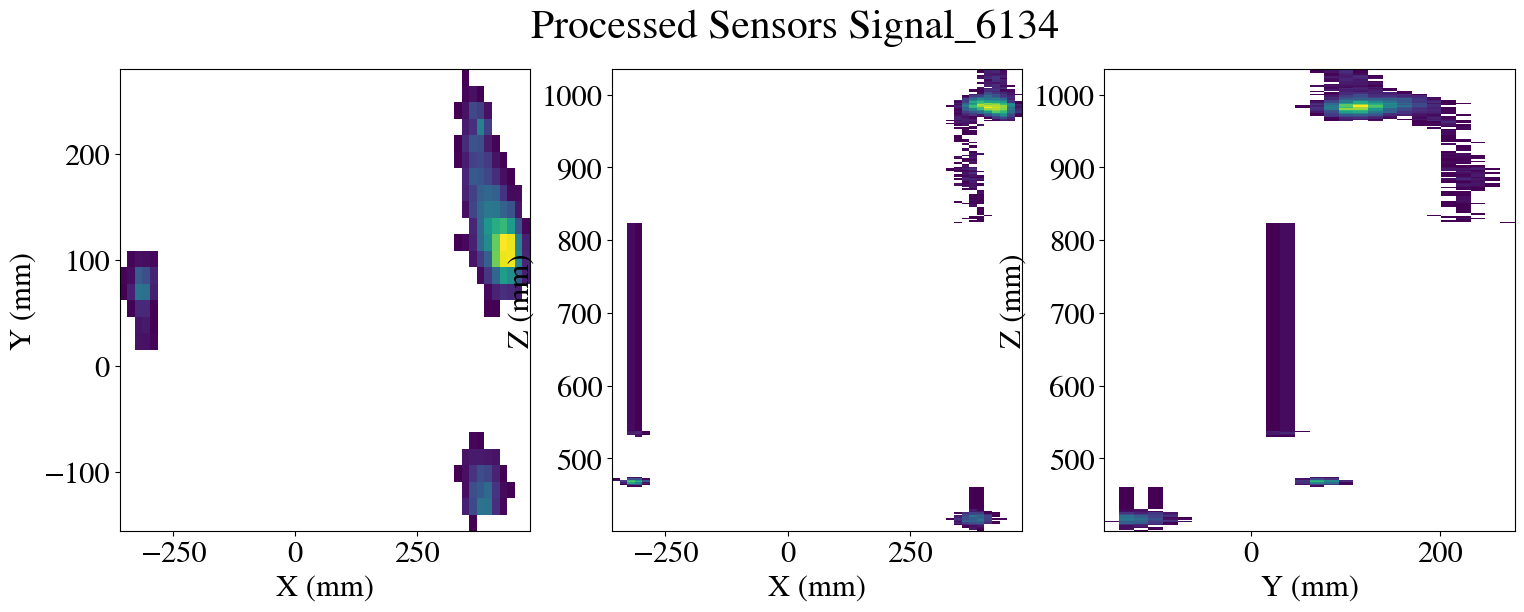

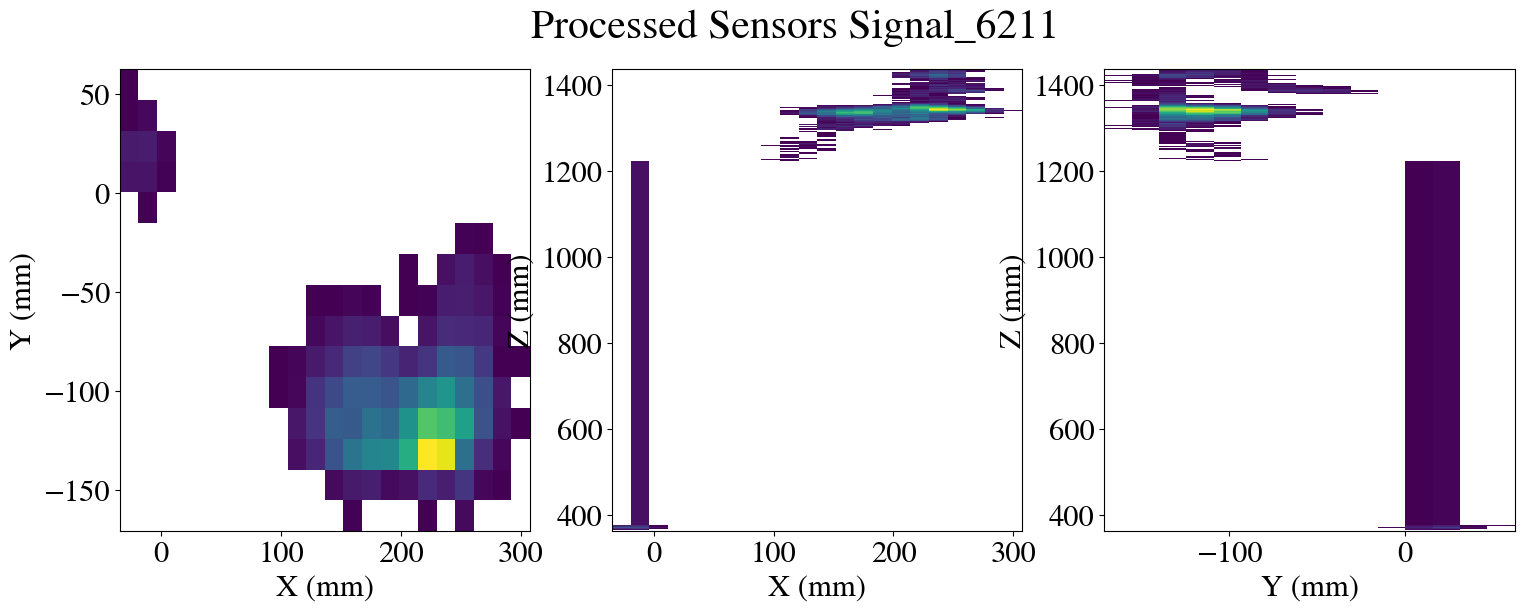

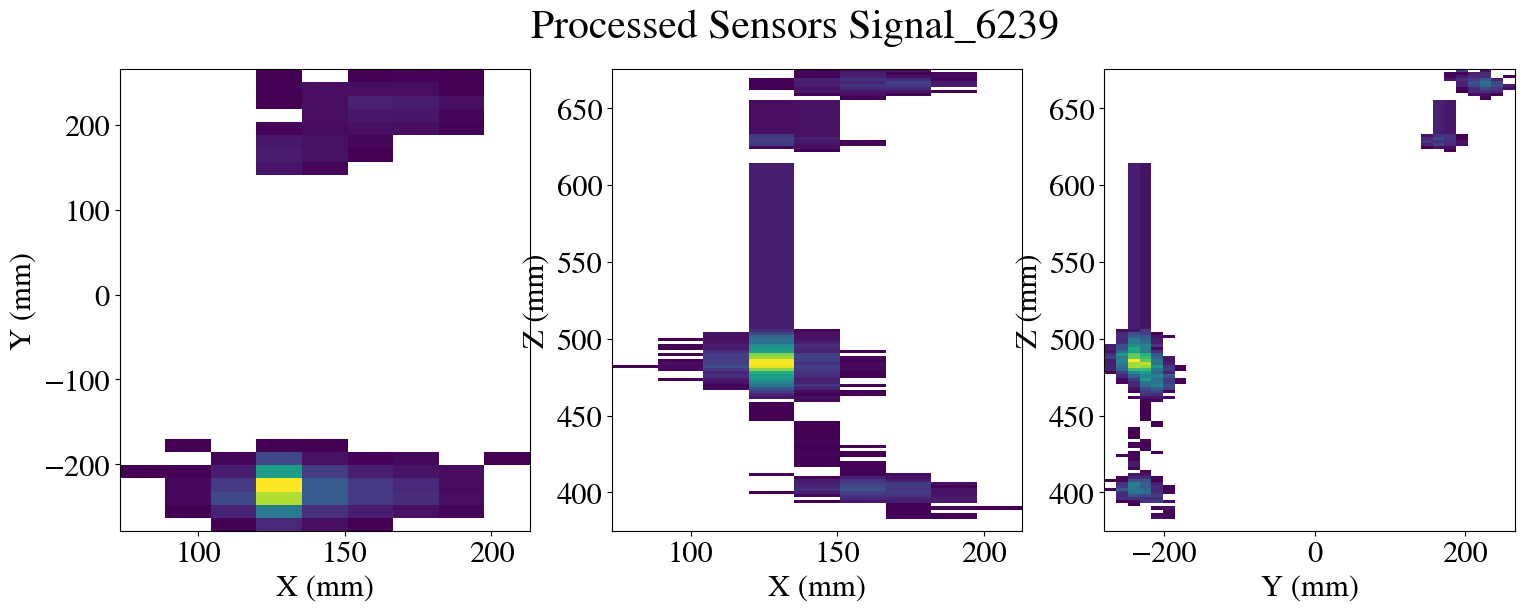

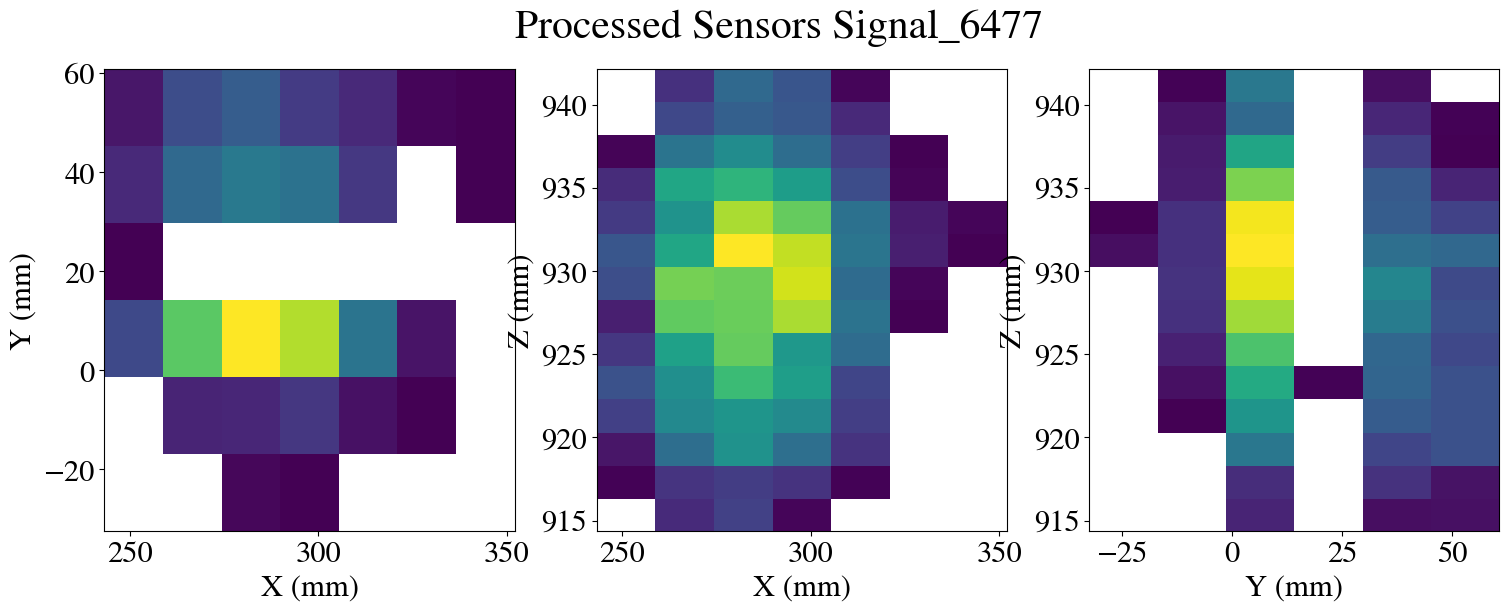

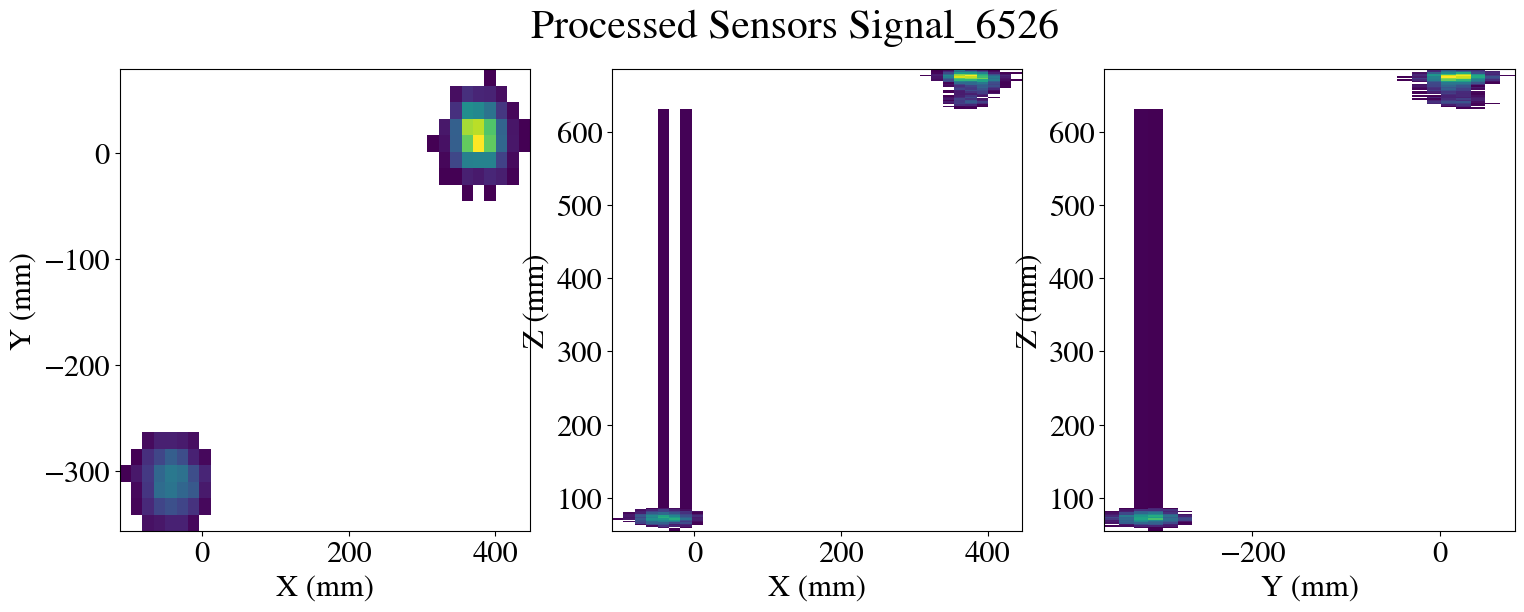

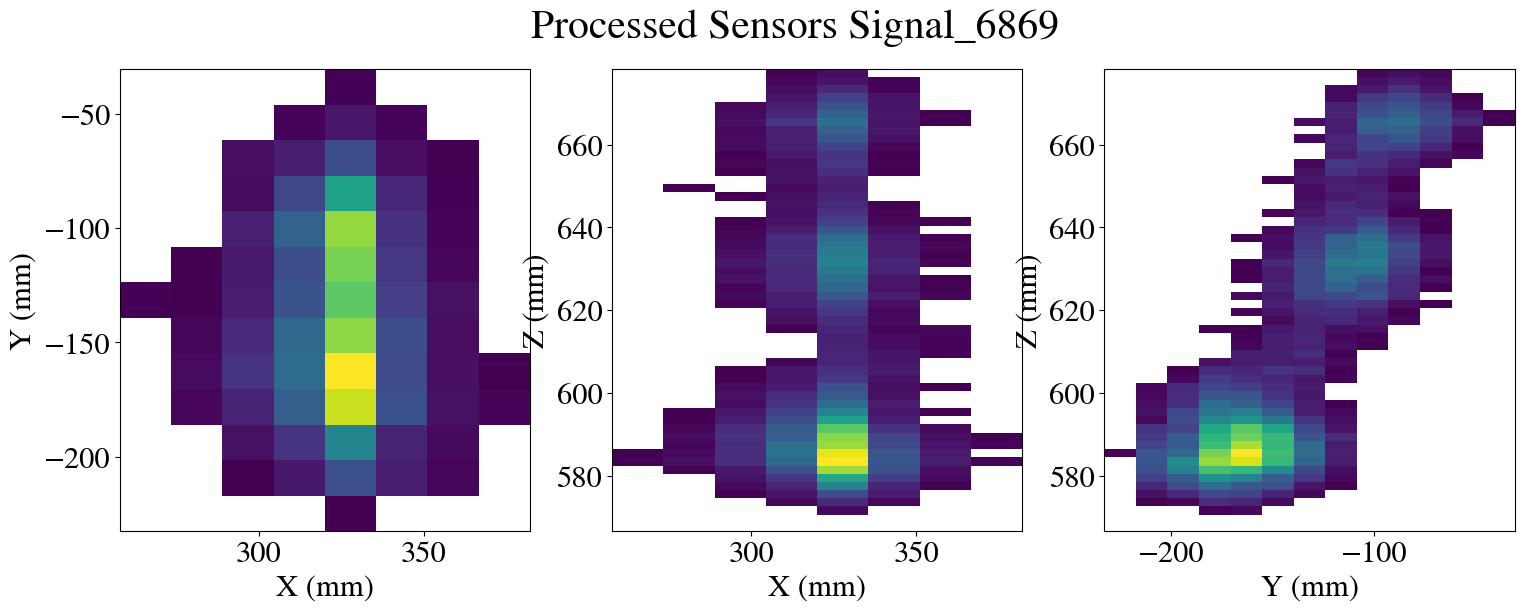

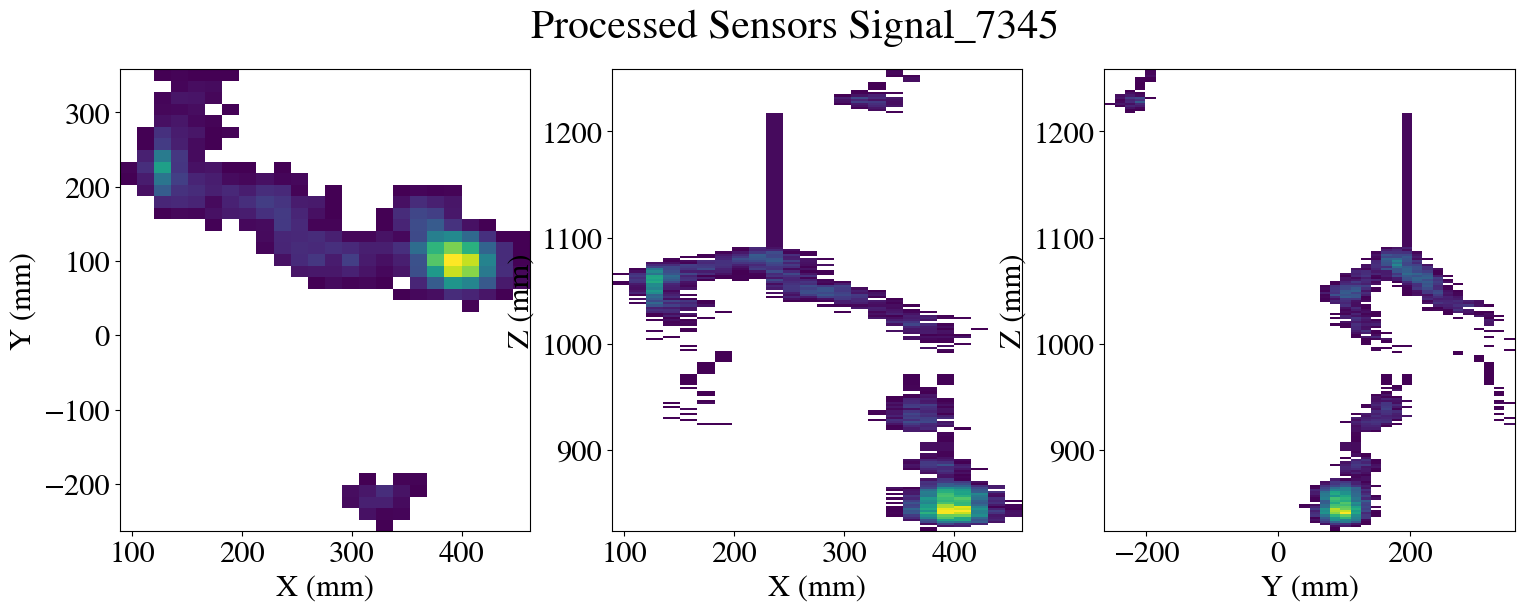

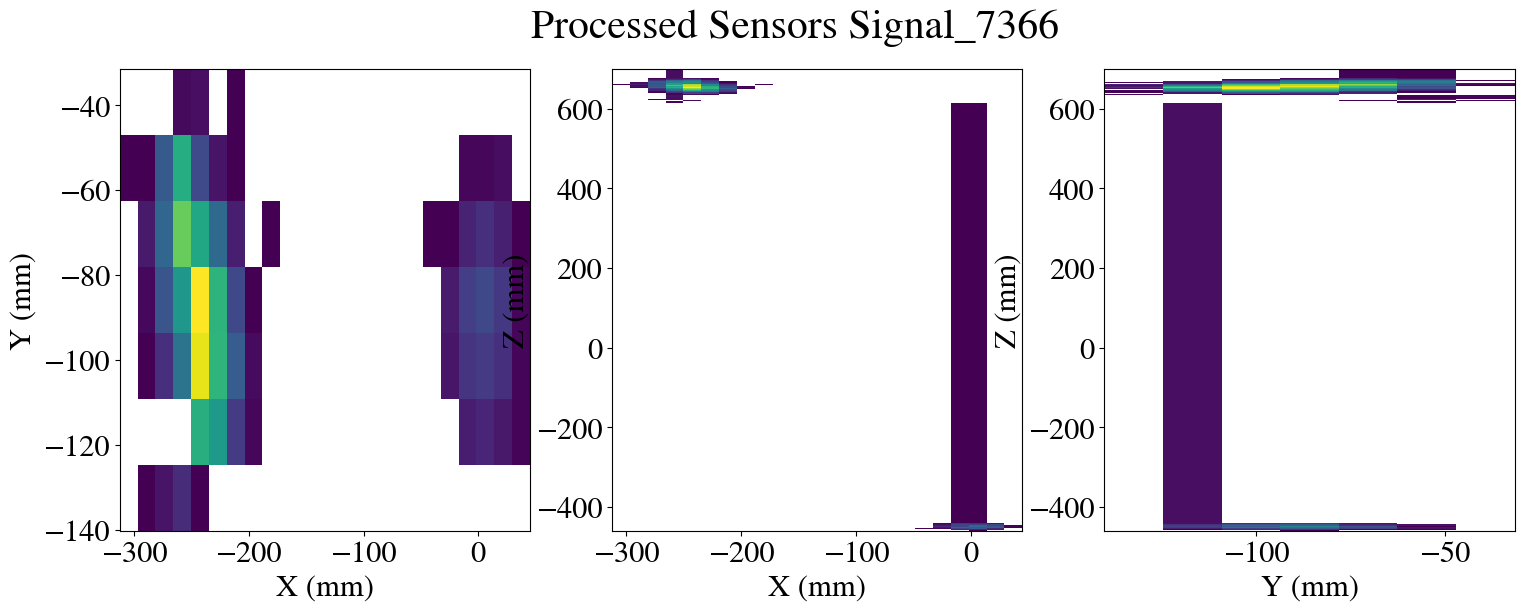

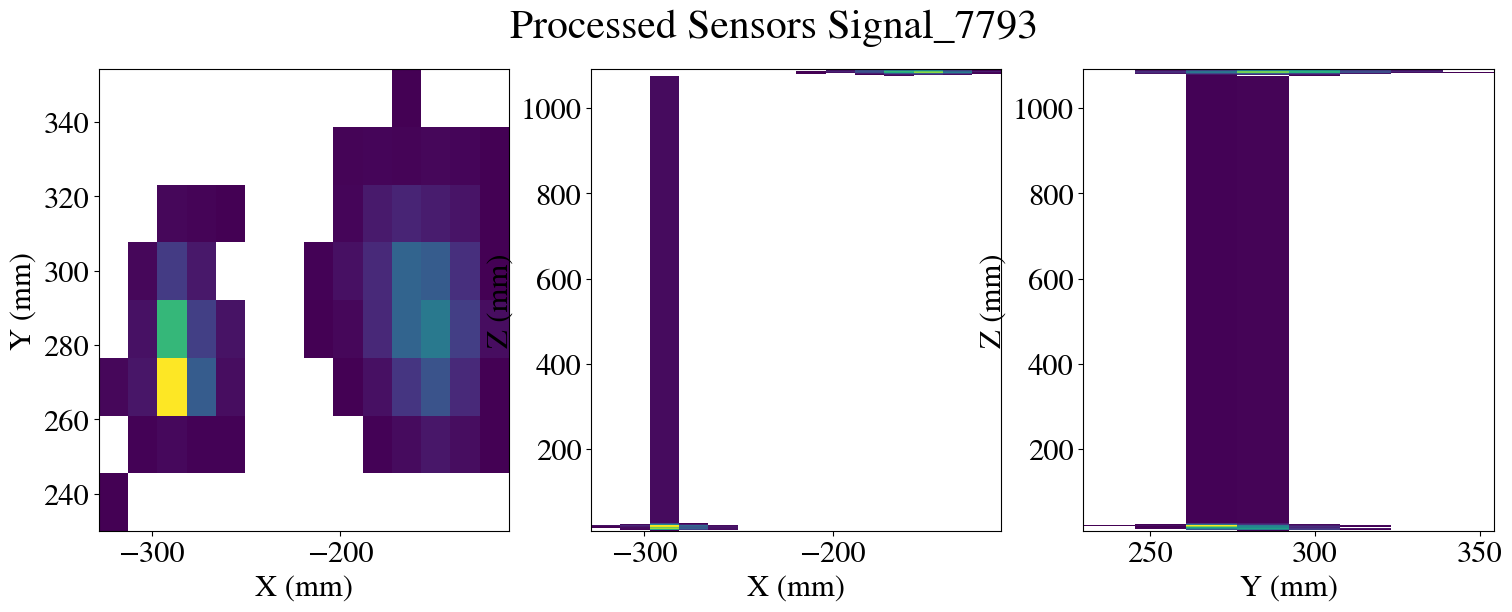

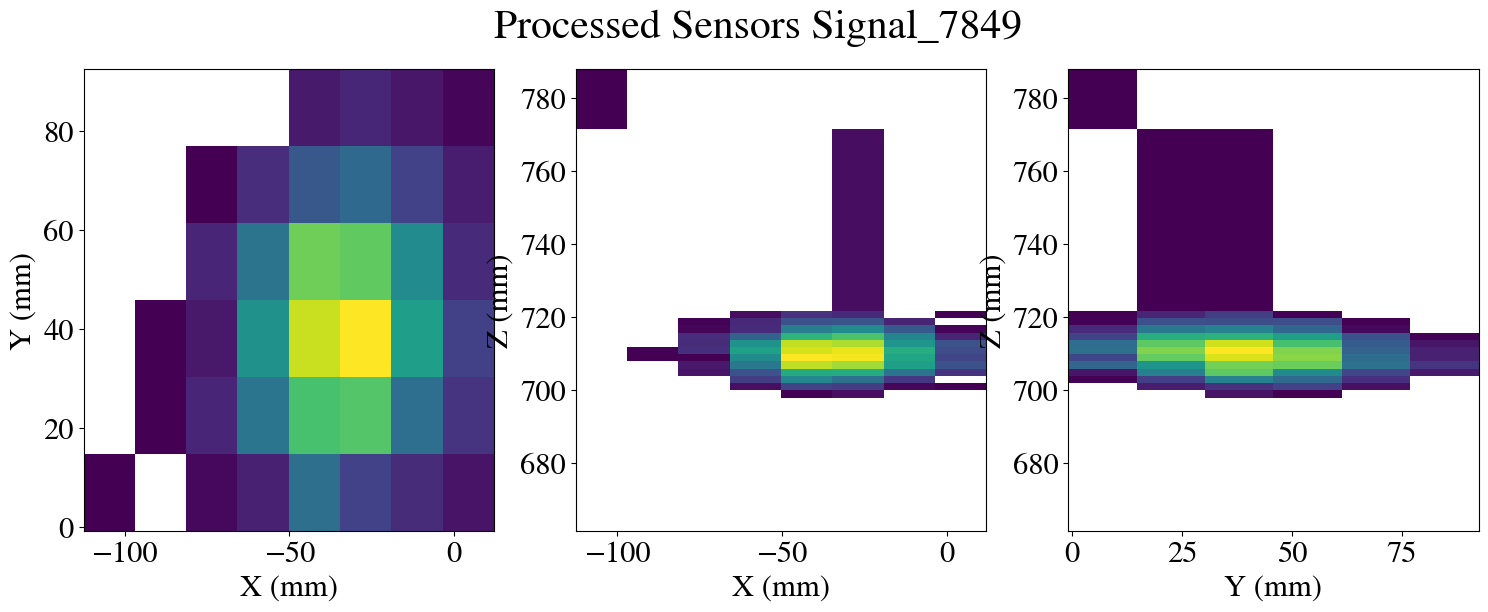

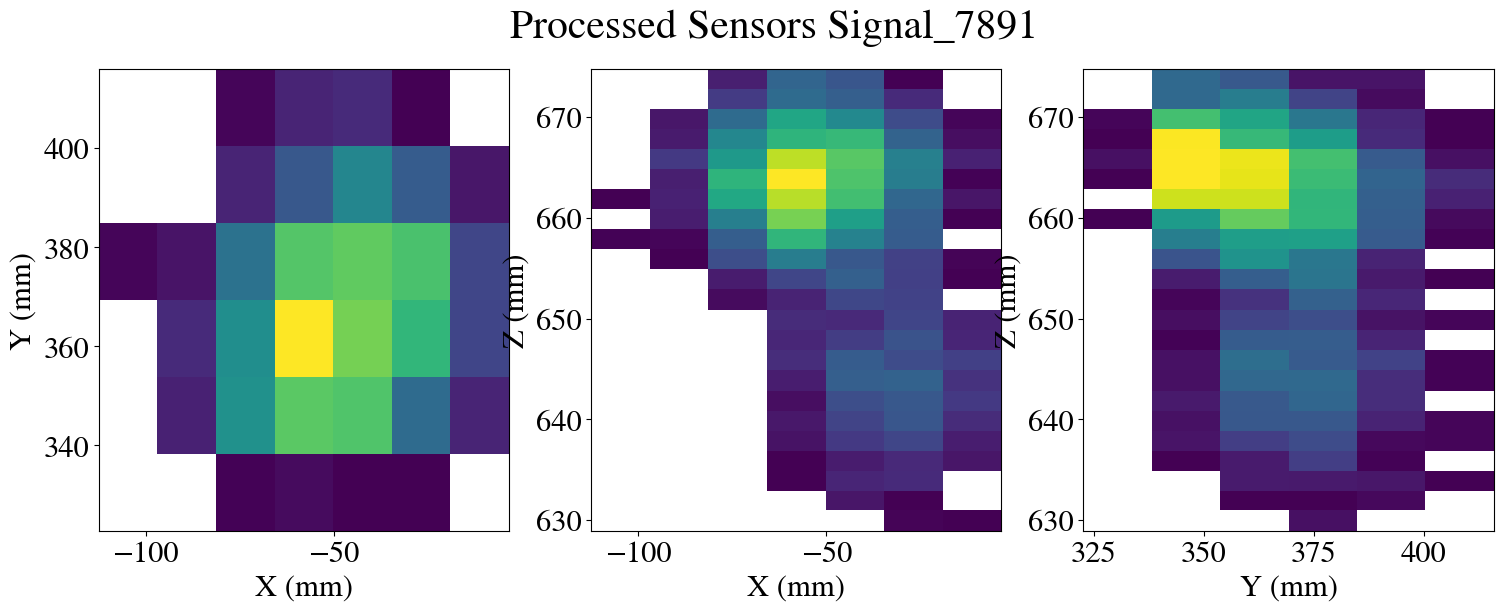

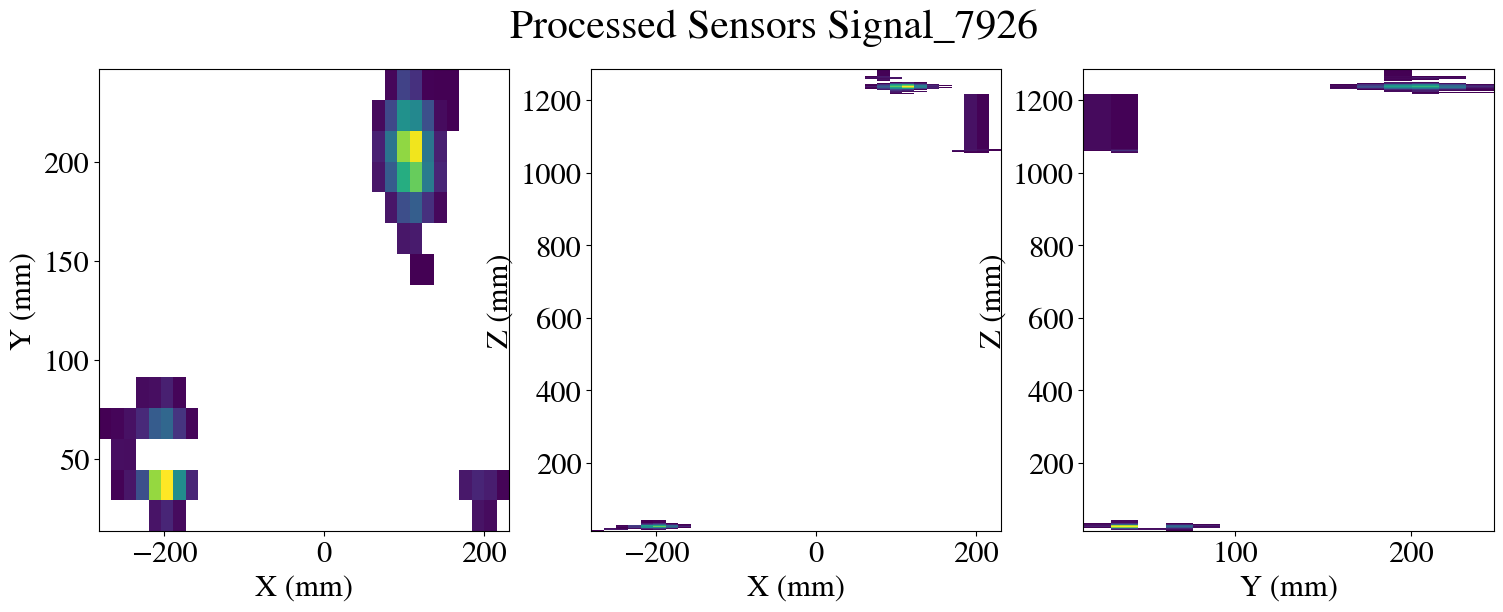

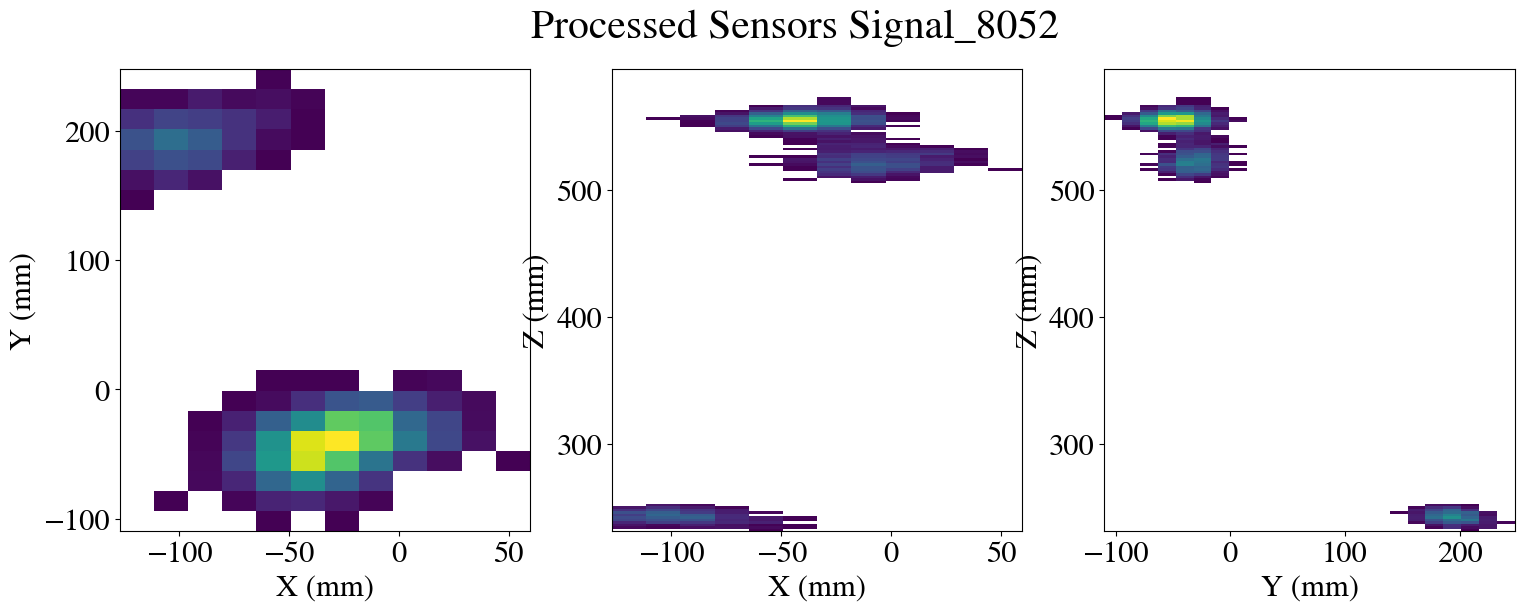

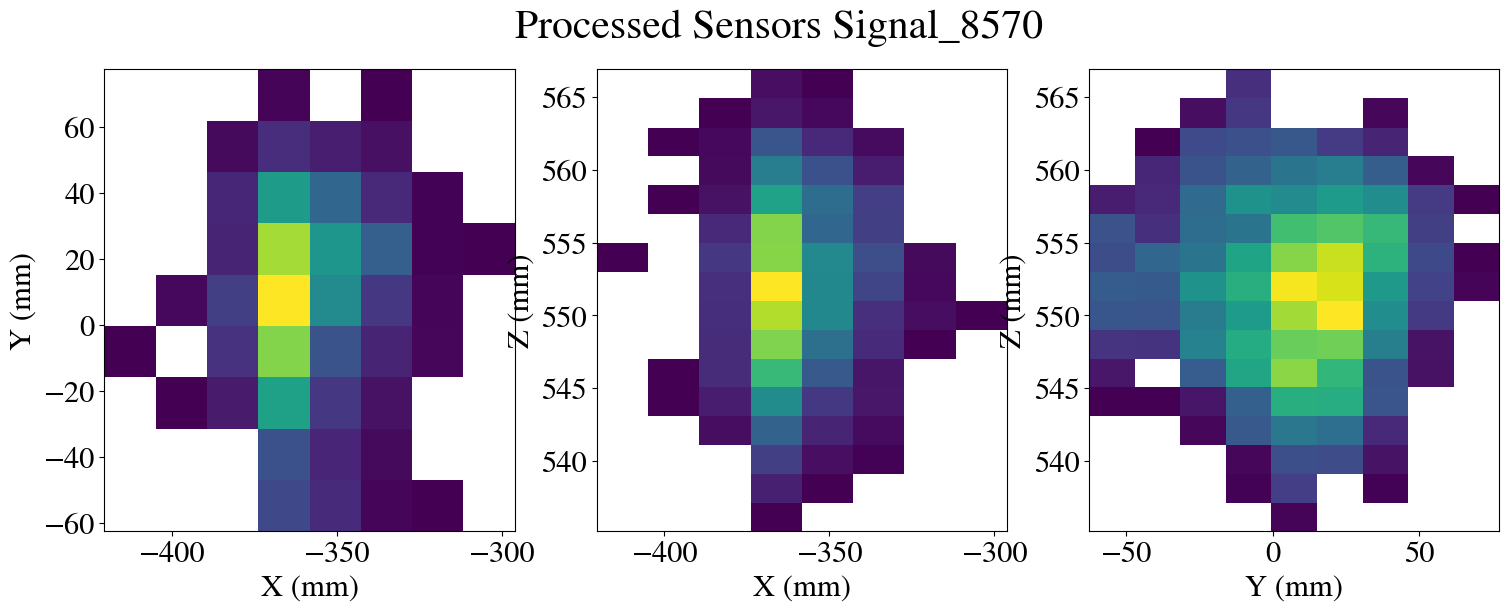

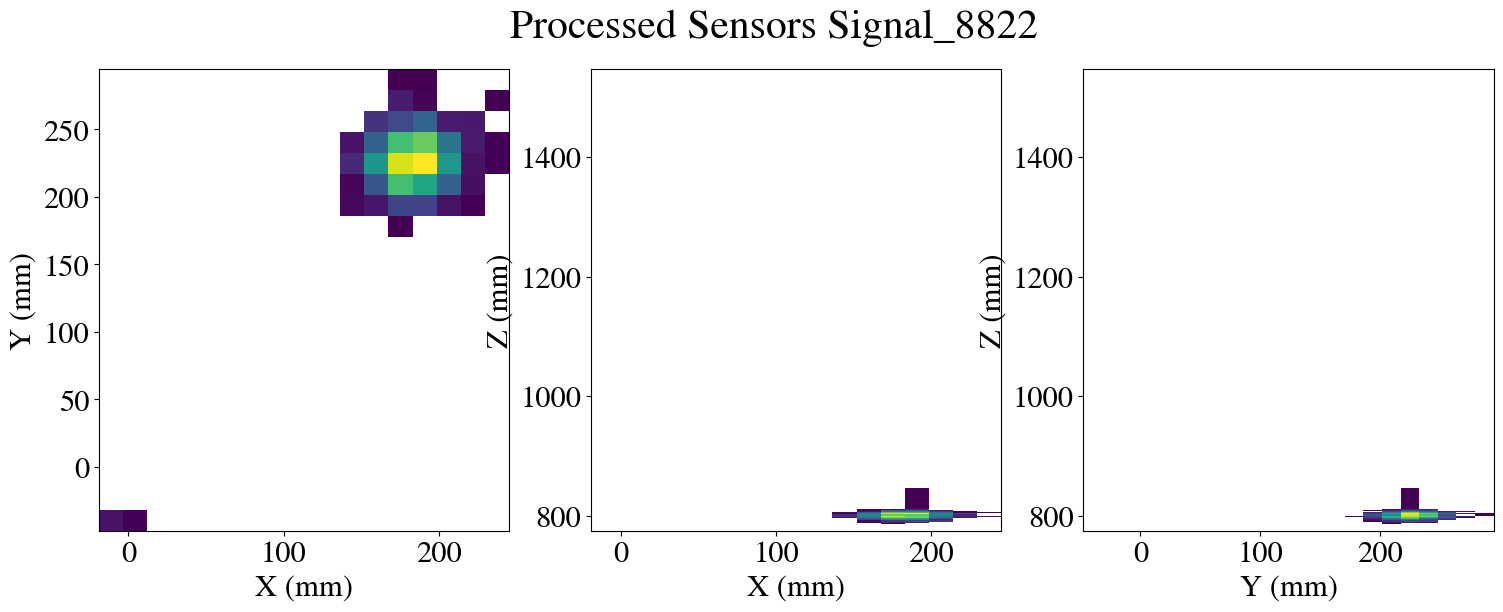

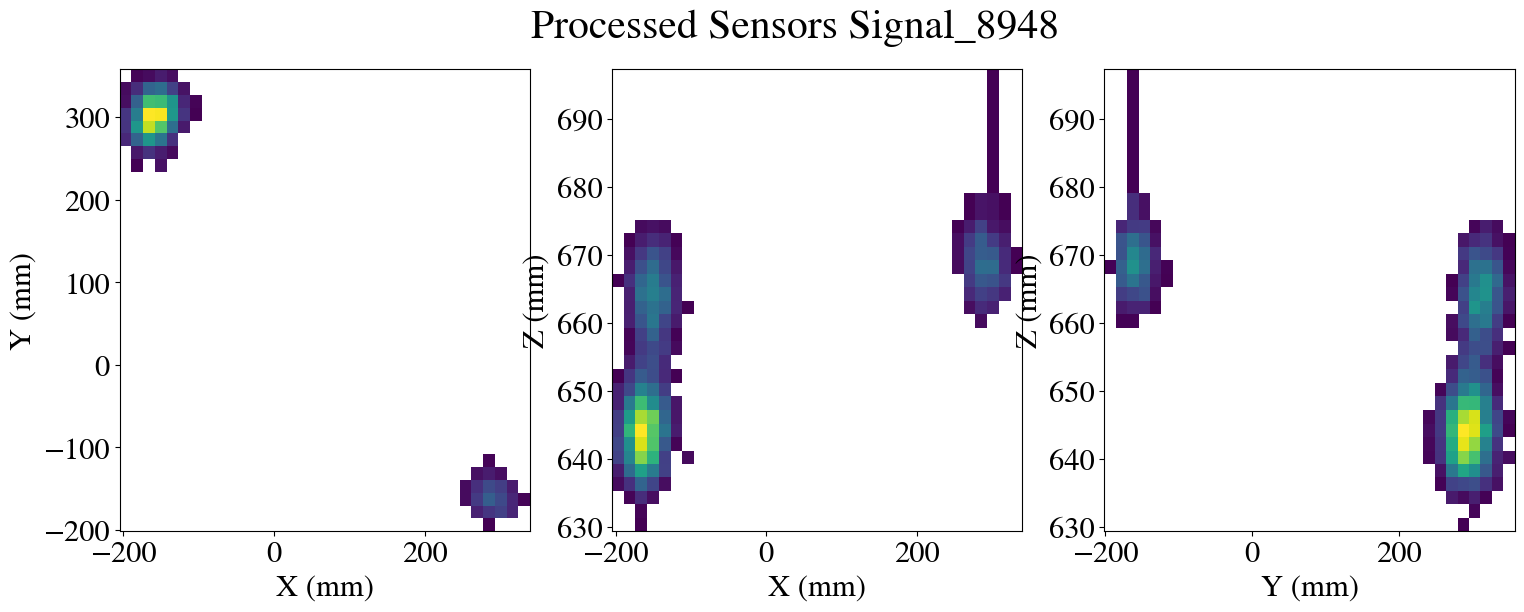

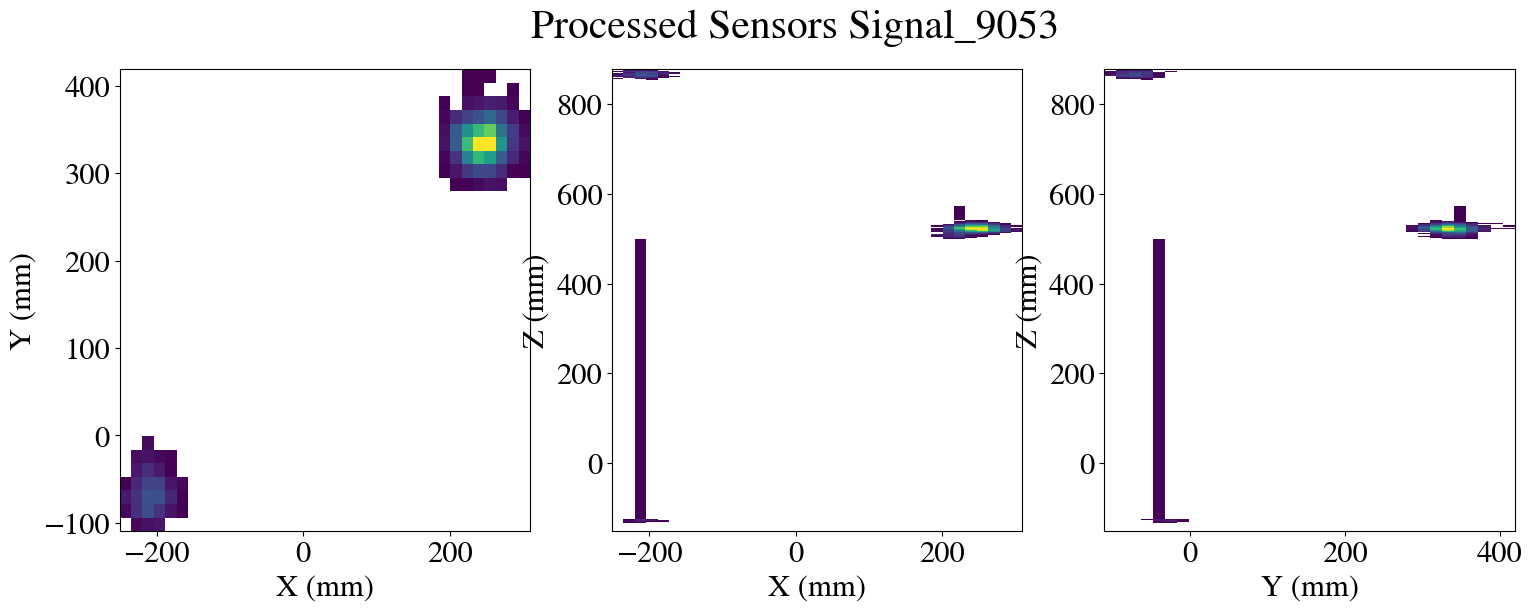

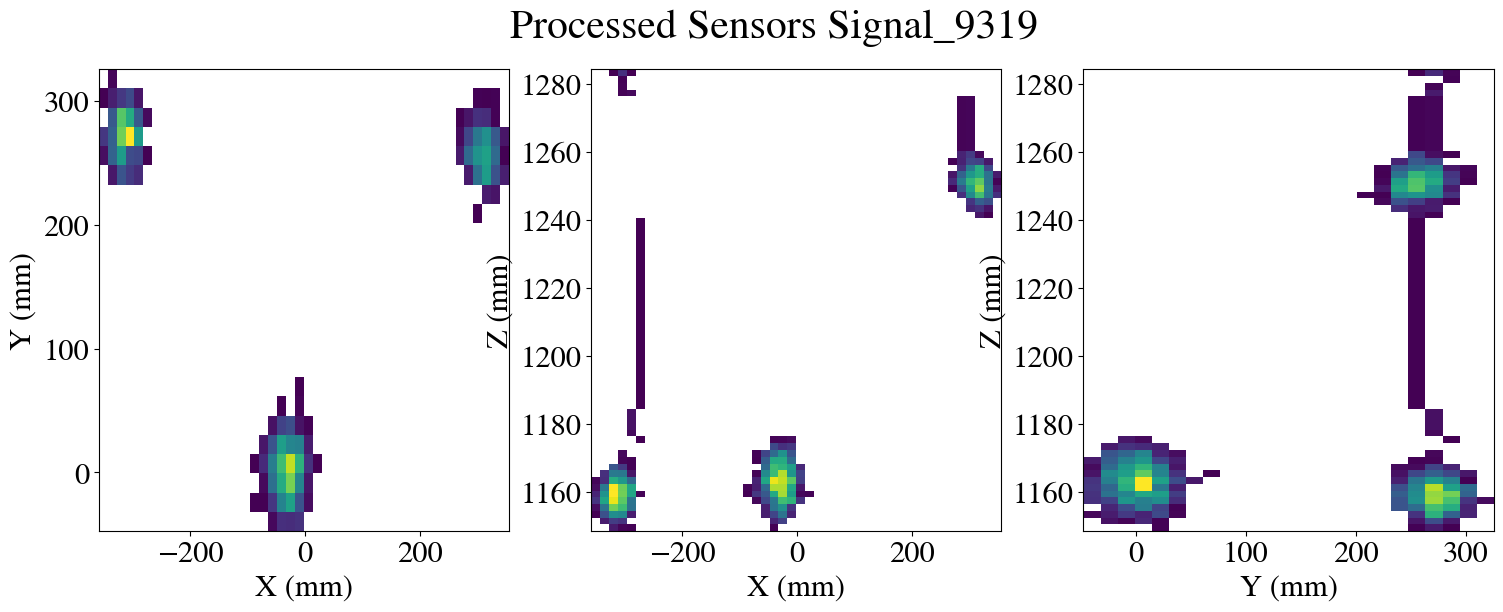

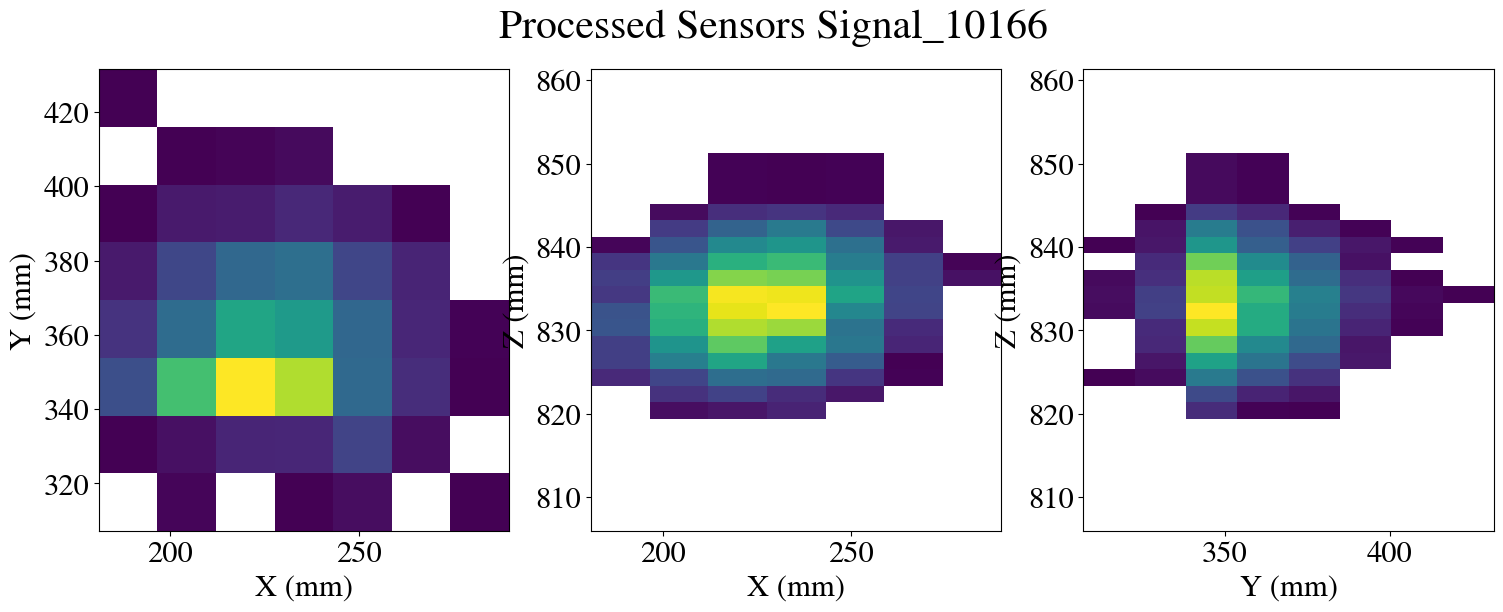

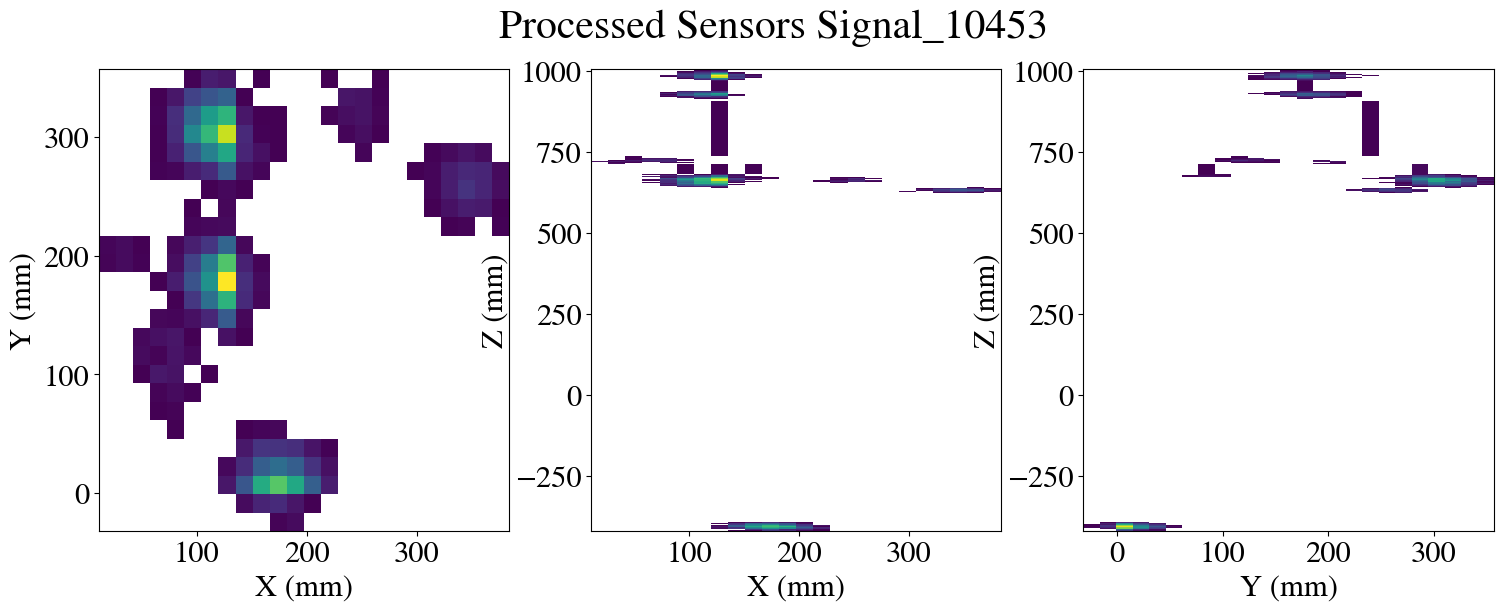

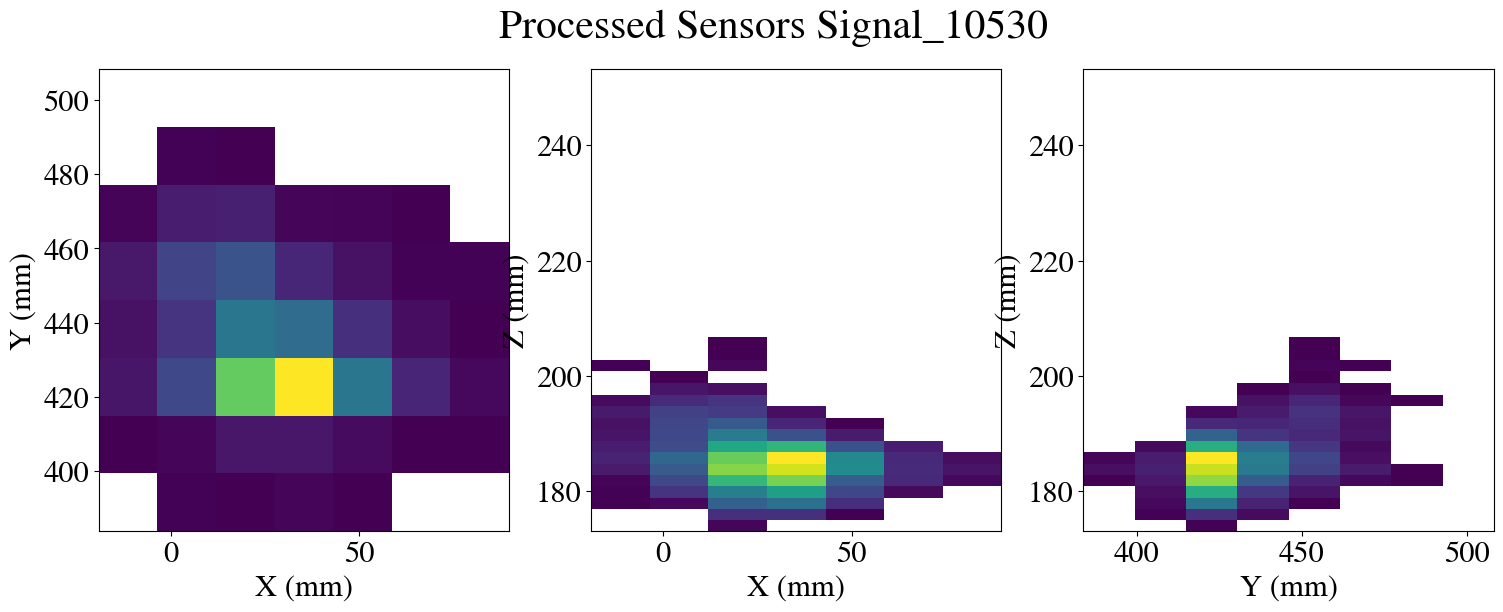

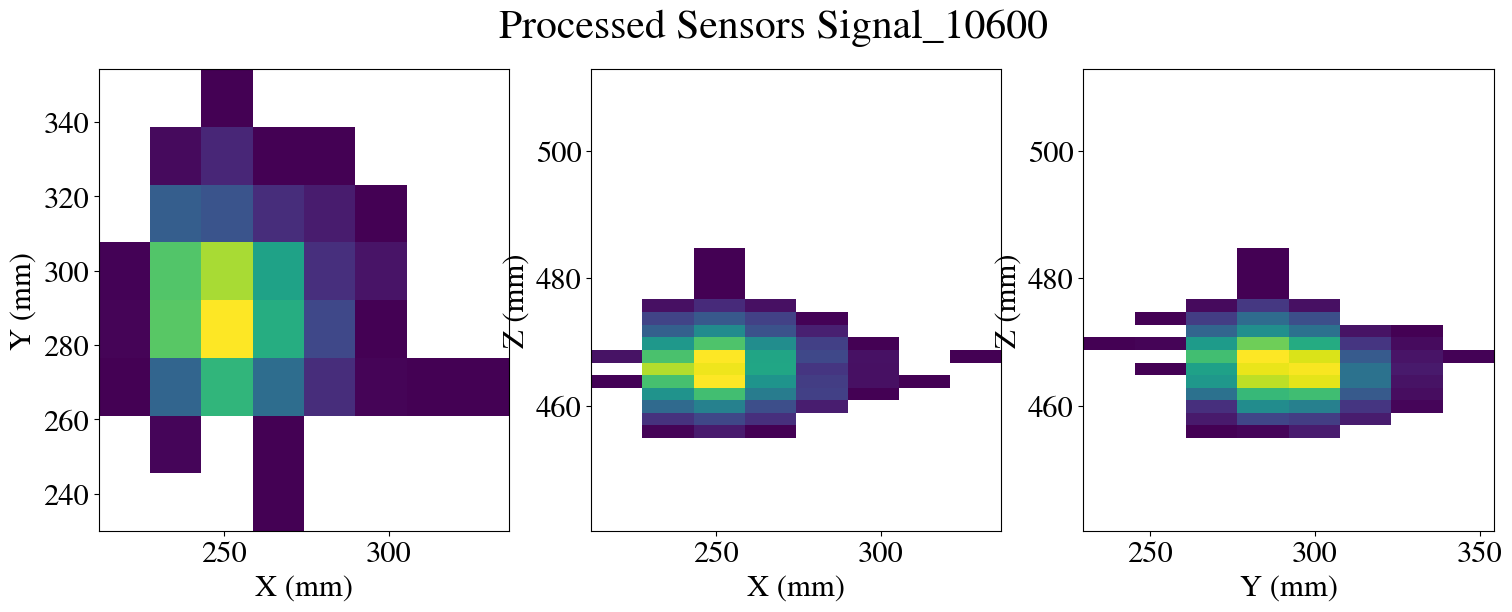

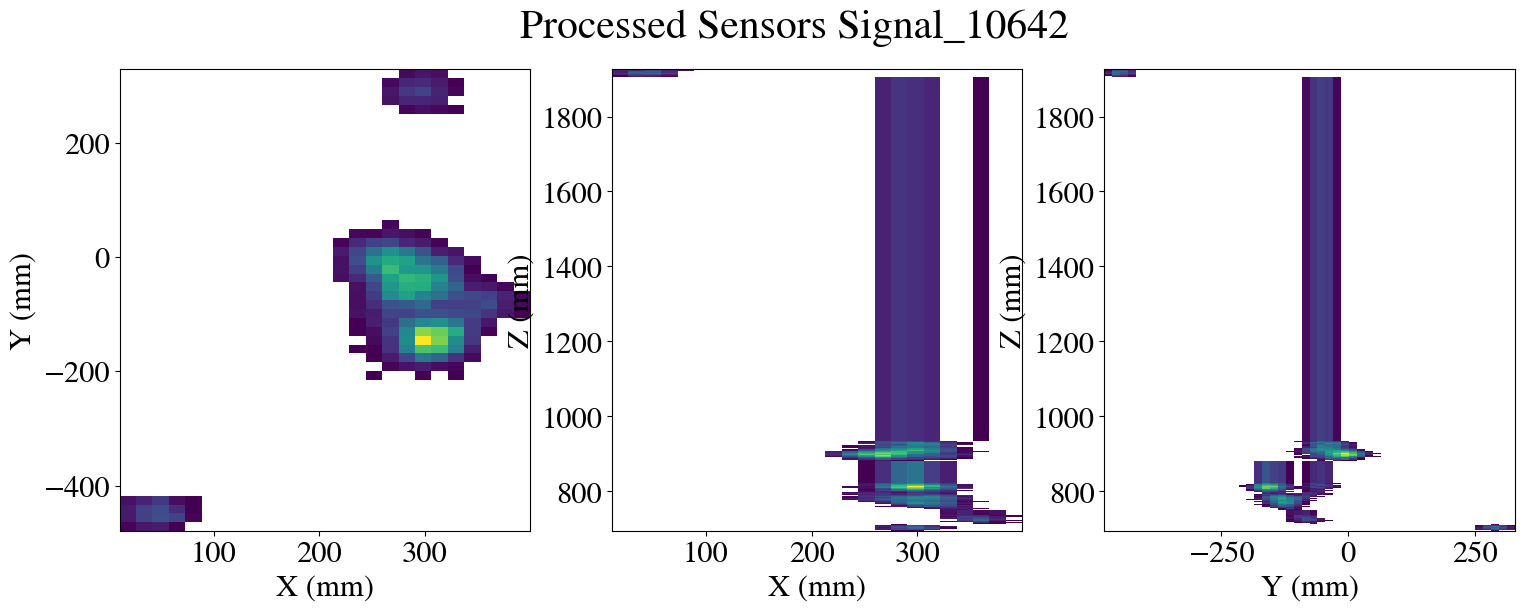

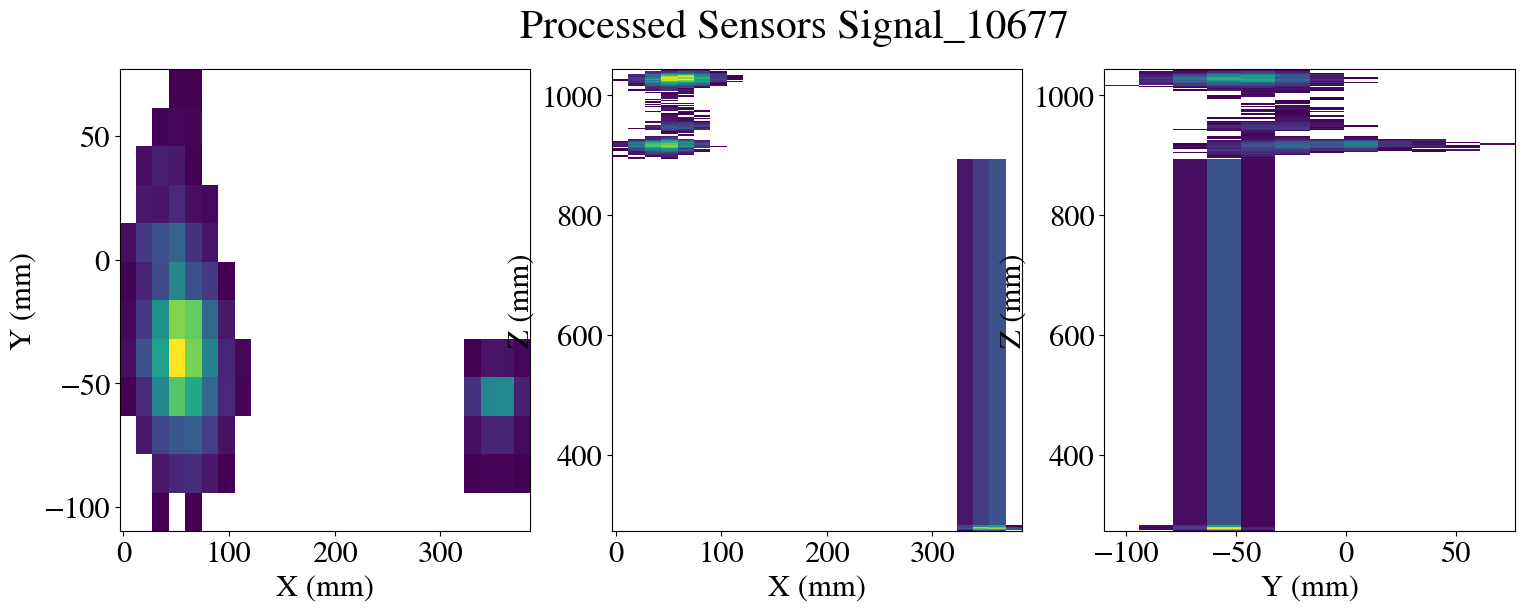

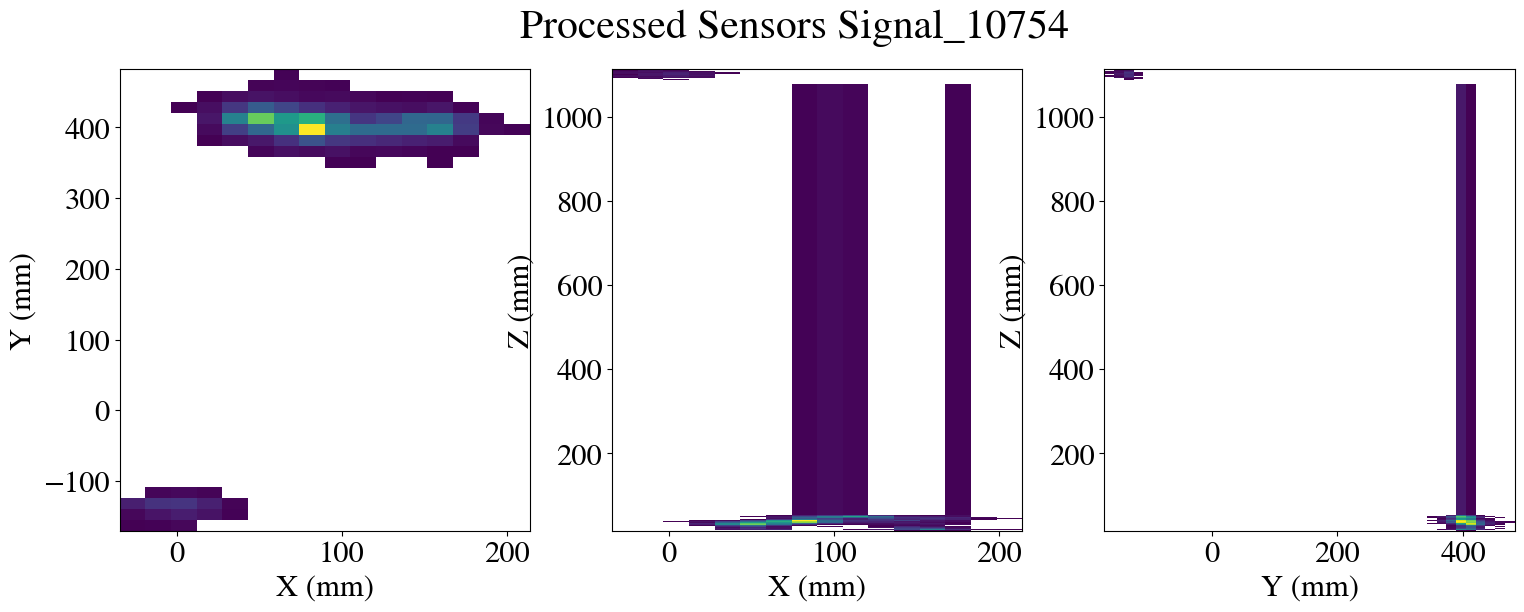

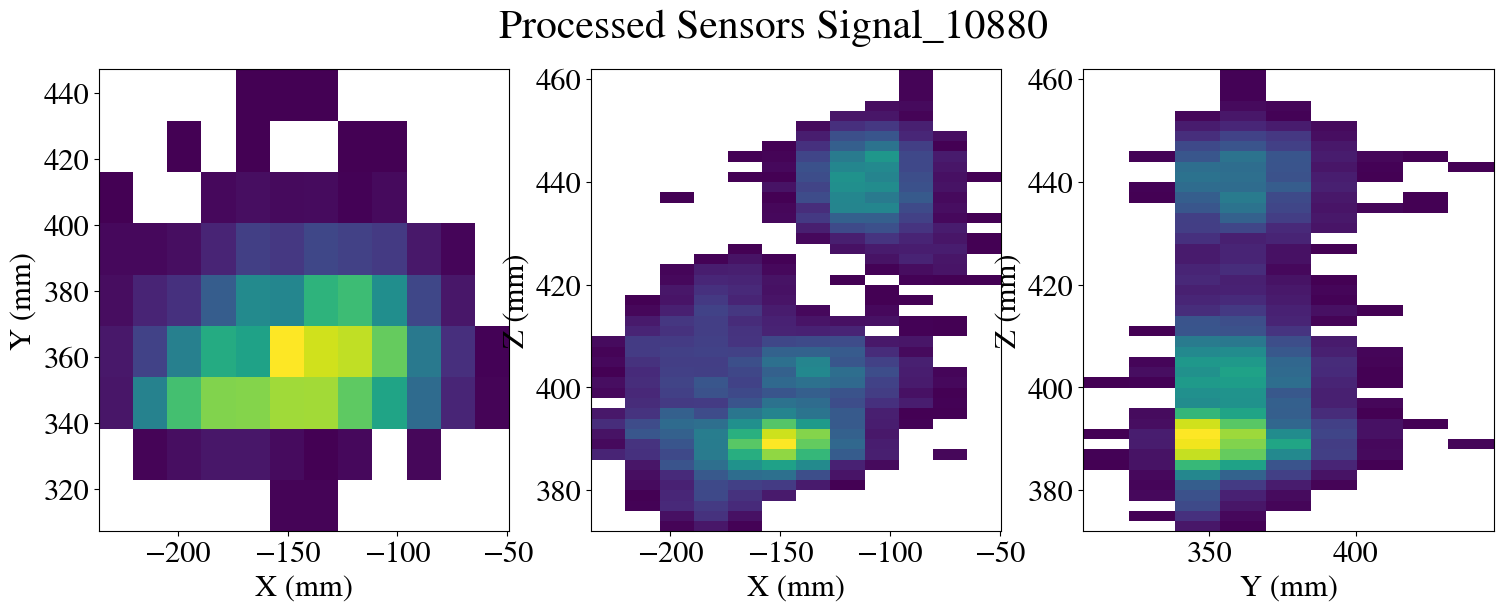

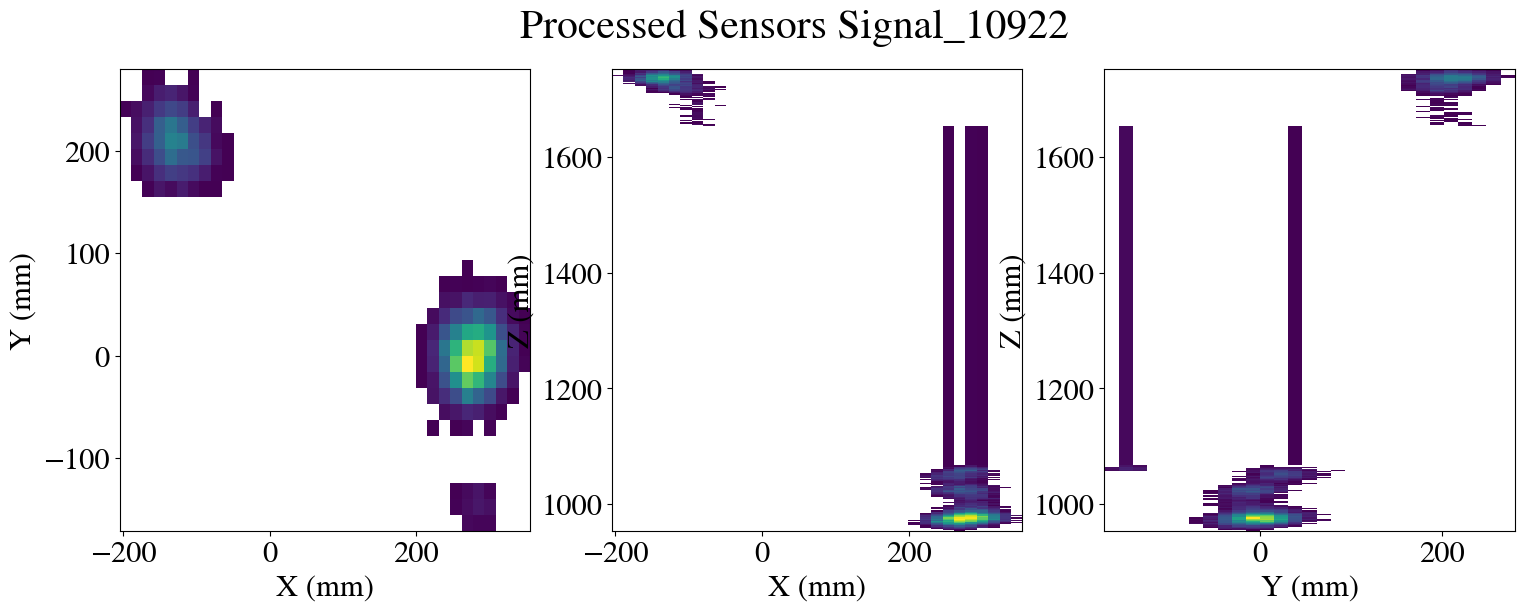

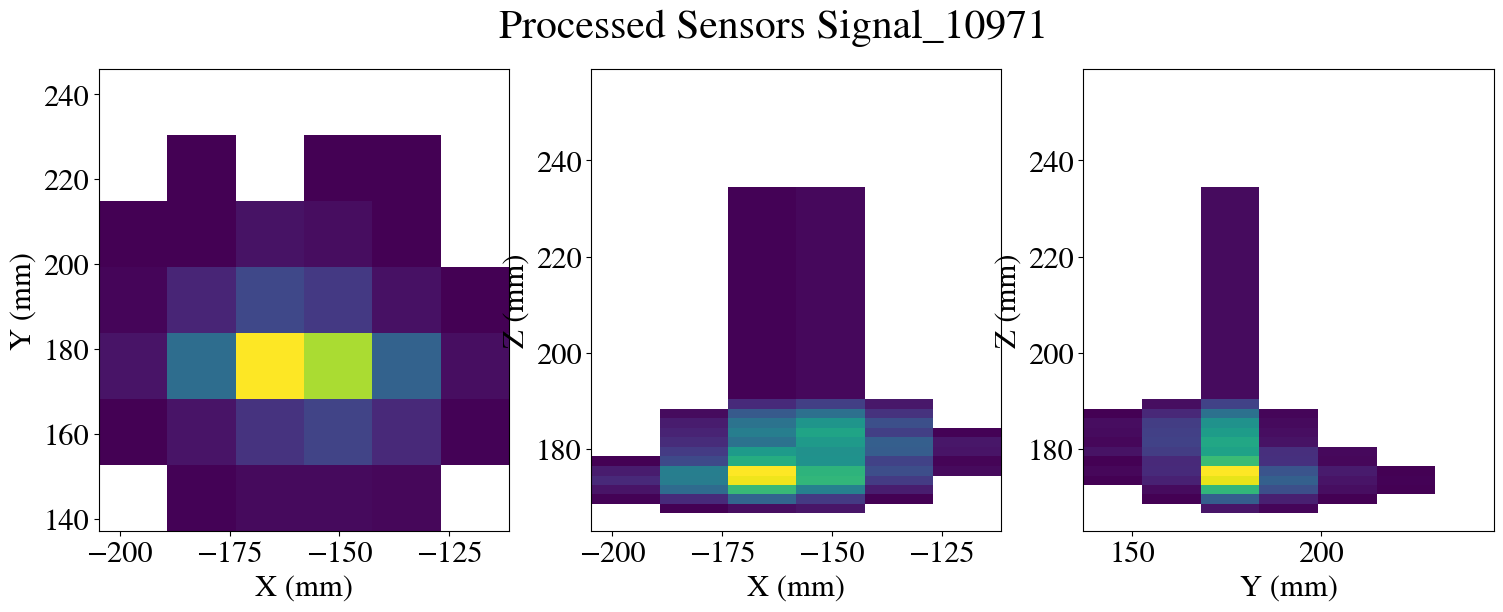

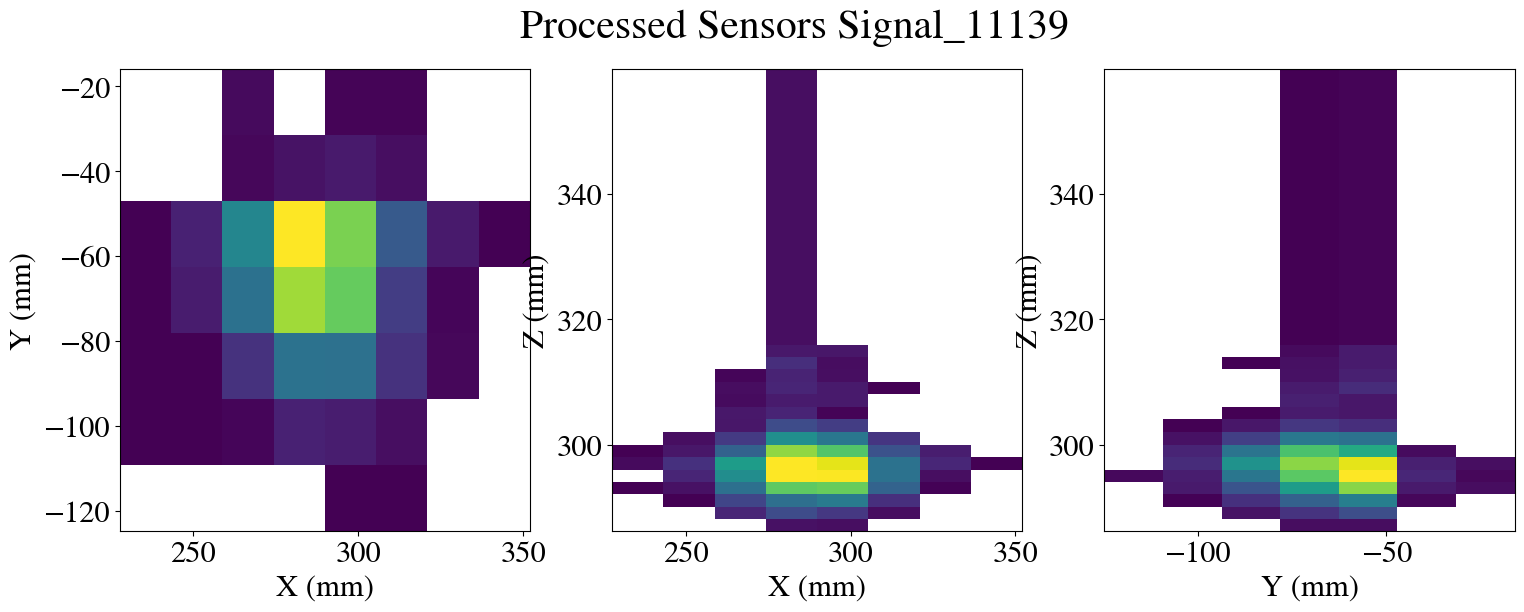

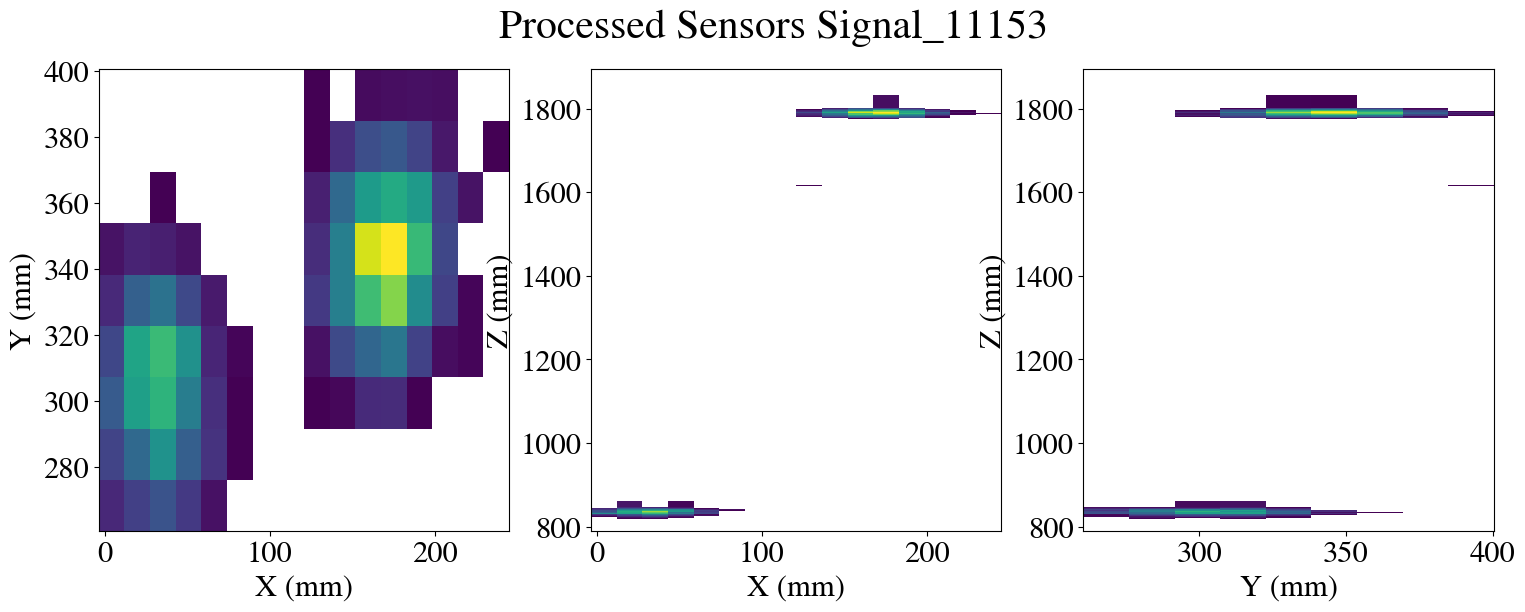

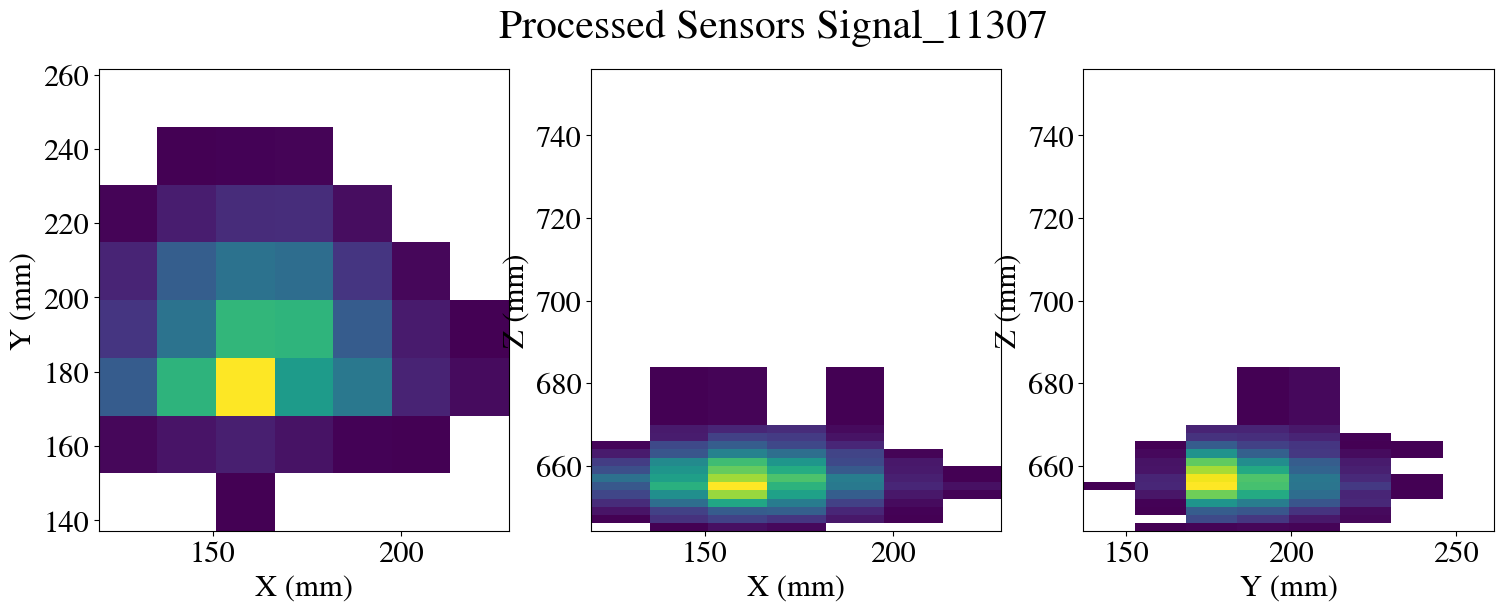

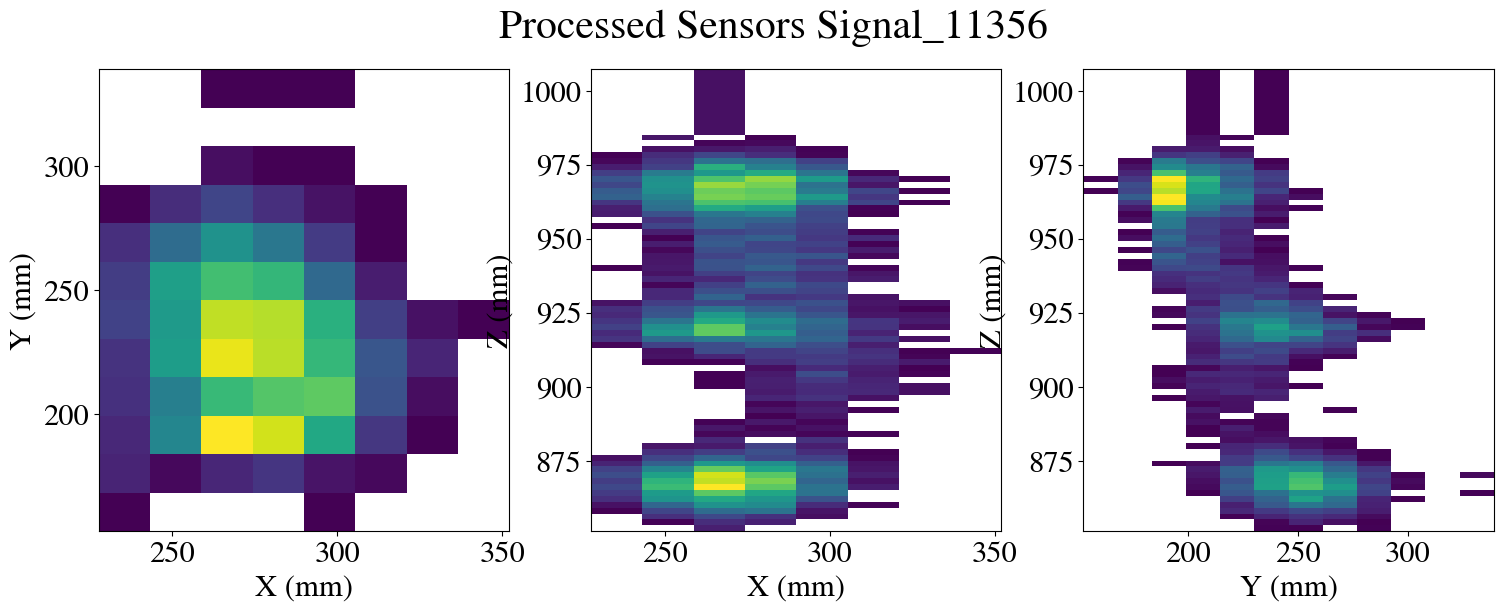

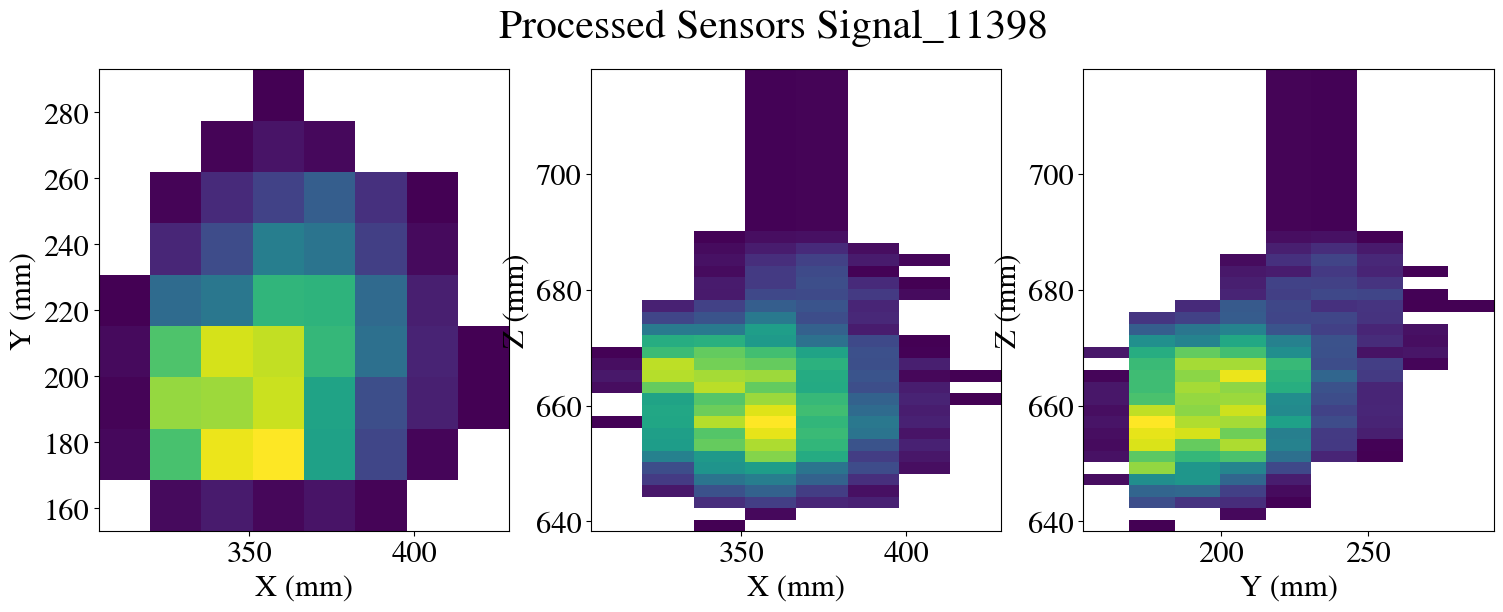

In [22]:
for i, df in tqdm(full_dst.groupby('event')):
    hits_cut = coref.timefunc(cut_sensors)(df.copy())
    hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())
    pitch = 15.55
    # then applying transformations to convert to 'SiPM outputs'
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    xx = np.arange(hits_drop.X.min(), hits_drop.X.max() + pitch, pitch)
    yy = np.arange(hits_drop.Y.min(), hits_drop.Y.max() + pitch, pitch)
    zz = hits_cut.Z.unique()

    axes[0].hist2d(hits_drop.X, hits_drop.Y, bins=[xx, yy], weights=hits_drop.Q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(hits_drop.X, hits_drop.Z, bins=[xx, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(hits_drop.Y, hits_drop.Z, bins=[yy, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');

    fig.suptitle('Processed Sensors Signal_' + str(i), fontsize=30)
    fig.savefig(f'plots/15107/evt_{i}.png')
    